In [4]:
import pandas as pd
from IPython.display import display

from xcai.basics import *
from xcai.plot import *
from typing import List, Optional, Dict

import matplotlib.pyplot as plt

import re
from IPython.display import display,HTML

comet_ml is installed but `COMET_API_KEY` is not set.


In [6]:
%load_ext autoreload
%autoreload 2

## Helper function

In [18]:
set_plot_defaults()

In [8]:
def metrics(a,b,c,x,y):
    return {'P@1':a, 'P@5':b,'N@5':c, 'PSP@1':x, 'PSP@5':y}

def display_results(metric, index, remove_prefix=False, scale=None):
    if remove_prefix or scale:
        for m in metric:
            keys = list(m.keys())
            for k in keys:
                nk = k.split('_')[1] if remove_prefix else k
                m[nk] = m[k] if scale is None else m[k] * scale
                if nk != k: del m[k]
                
    with pd.option_context('display.precision', 4, 'display.max_columns', None):
        display(pd.DataFrame(metric, index=index))

In [9]:
def _display_metric(df):
    from IPython.display import display
    with pd.option_context('display.precision',2,'display.max_colwidth',None,'display.max_columns',None):
        display(df)

In [63]:
#ORDER = ['P@1', 'P@3', 'P@5', 'N@1', 'N@3', 'N@5', 'PSP@1', 'PSP@3', 'PSP@5', 'R@10', 'R@100', 'R@200']
ORDER = ['P@1', 'P@5', 'N@5', 'PSP@1', 'PSP@5', 'R@200']

def convert_df_and_remove_prefix(o):
    m = {}
    for key,val in o.items():
        m[key] = {re.sub(r'^(test|eval)_(.*)', r'\2', k):v for k,v in val.items()}
        
    df = pd.DataFrame(m).T
    return df[ORDER]
    

## Teacher

### `Distilbert`

In [5]:
# wikiseealsotitles
m = {'test_loss': 0.016681302338838577, 'test_P@1': 0.47479367940737405, 'test_P@10': 0.14173393797699302, 'test_P@3': 0.30295280211078307, 'test_P@5': 0.22635495591925775, 'test_N@1': 0.4747936725616455, 'test_N@10': 0.5081887245178223, 'test_N@3': 0.46679285168647766, 'test_N@5': 0.48181095719337463, 'test_PSP@1': 0.3659764403986233, 'test_PSP@10': 0.47102664459277543, 'test_PSP@3': 0.38466570585689525, 'test_PSP@5': 0.4126957923700924, 'test_PSN@1': 0.3659764528274536, 'test_PSN@10': 0.4537607729434967, 'test_PSN@3': 0.3976207375526428, 'test_PSN@5': 0.42237570881843567, 'test_R@200': 0.7736651615675022, 'test_R@10': 0.5737313838358737, 'test_R@100': 0.7436145963127184, 'test_runtime': 239.3287, 'test_samples_per_second': 741.721, 'test_steps_per_second': 0.464}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,47.4794,30.2953,22.6355,14.1734,47.4794,46.6793,48.1811,50.8189,36.5976,38.4666,41.2696,47.1027,36.5976,39.7621,42.2376,45.3761,57.3731,74.3615,77.3665,0.0167,239.3287,741.721,0.464


In [6]:
# wikititles
m = {'test_loss': 0.017709823325276375, 'test_P@1': 0.6604039844693987, 'test_P@10': 0.1922625146260841, 'test_P@3': 0.4427169790774948, 'test_P@5': 0.3219657464253877, 'test_N@1': 0.6604039669036865, 'test_N@10': 0.5267409682273865, 'test_N@3': 0.5628888010978699, 'test_N@5': 0.534044623374939, 'test_PSP@1': 0.38866437063552794, 'test_PSP@10': 0.45216630925636925, 'test_PSP@3': 0.41840363402702435, 'test_PSP@5': 0.4250382267401933, 'test_PSN@1': 0.3886643648147583, 'test_PSN@10': 0.47987130284309387, 'test_PSN@3': 0.42873772978782654, 'test_PSN@5': 0.4506883919239044, 'test_R@200': 0.702557668379058, 'test_R@10': 0.510692117939397, 'test_R@100': 0.663280306014536, 'test_runtime': 580.8063, 'test_samples_per_second': 1349.405, 'test_steps_per_second': 0.844}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,66.0404,44.2717,32.1966,19.2263,66.0404,56.2889,53.4045,52.6741,38.8664,41.8404,42.5038,45.2166,38.8664,42.8738,45.0688,47.9871,51.0692,66.328,70.2558,0.0177,580.8063,1349.405,0.844


In [7]:
# wikiseealso
m = {'test_loss': 0.015018783509731293, 'test_P@1': 0.5037095456721967, 'test_P@10': 0.15165478973596774, 'test_P@3': 0.3256964200210398, 'test_P@5': 0.2433811227220156, 'test_N@1': 0.5037095546722412, 'test_N@10': 0.541210949420929, 'test_N@3': 0.4979328513145447, 'test_N@5': 0.5138446688652039, 'test_PSP@1': 0.3672674882608596, 'test_PSP@10': 0.49842471202063104, 'test_PSP@3': 0.4018981757157289, 'test_PSP@5': 0.43512711505254204, 'test_PSN@1': 0.3672674894332886, 'test_PSN@10': 0.474685400724411, 'test_PSN@3': 0.41203731298446655, 'test_PSN@5': 0.4404144287109375, 'test_R@200': 0.8056290164783148, 'test_R@10': 0.6113826946844456, 'test_R@100': 0.7781915615151795, 'test_runtime': 316.9593, 'test_samples_per_second': 560.056, 'test_steps_per_second': 0.35}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,50.371,32.5696,24.3381,15.1655,50.371,49.7933,51.3845,54.1211,36.7267,40.1898,43.5127,49.8425,36.7267,41.2037,44.0414,47.4685,61.1383,77.8192,80.5629,0.015,316.9593,560.056,0.35


In [8]:
# wikipedia
m = {'test_loss': 0.010197877883911133, 'test_P@1': 0.8240430855522792, 'test_P@10': 0.3066724678888317, 'test_P@3': 0.6387183043424678, 'test_P@5': 0.4950069091535431, 'test_N@1': 0.8240430951118469, 'test_N@10': 0.7470307946205139, 'test_N@3': 0.7715214490890503, 'test_N@5': 0.750892162322998, 'test_PSP@1': 0.4637808932625801, 'test_PSP@10': 0.6563743396782328, 'test_PSP@3': 0.5579214660003528, 'test_PSP@5': 0.5994651830178395, 'test_PSN@1': 0.46378087997436523, 'test_PSN@10': 0.6357831954956055, 'test_PSN@3': 0.5512413382530212, 'test_PSN@5': 0.5932626128196716, 'test_R@200': 0.8997065010083698, 'test_R@10': 0.7399693088722892, 'test_R@100': 0.8772790846554102, 'test_runtime': 658.7976, 'test_samples_per_second': 1189.657, 'test_steps_per_second': 0.372}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,82.4043,63.8718,49.5007,30.6672,82.4043,77.1521,75.0892,74.7031,46.3781,55.7921,59.9465,65.6374,46.3781,55.1241,59.3263,63.5783,73.9969,87.7279,89.9707,0.0102,658.7976,1189.657,0.372


In [9]:
# distilbert teacher metrics
o = {
    'LF-WikiSeeAlsoTitles-320K': {'test_loss': 0.016681302338838577, 'test_P@1': 0.47479367940737405, 'test_P@10': 0.14173393797699302, 'test_P@3': 0.30295280211078307, 'test_P@5': 0.22635495591925775, 'test_N@1': 0.4747936725616455, 'test_N@10': 0.5081887245178223, 'test_N@3': 0.46679285168647766, 'test_N@5': 0.48181095719337463, 'test_PSP@1': 0.3659764403986233, 'test_PSP@10': 0.47102664459277543, 'test_PSP@3': 0.38466570585689525, 'test_PSP@5': 0.4126957923700924, 'test_PSN@1': 0.3659764528274536, 'test_PSN@10': 0.4537607729434967, 'test_PSN@3': 0.3976207375526428, 'test_PSN@5': 0.42237570881843567, 'test_R@200': 0.7736651615675022, 'test_R@10': 0.5737313838358737, 'test_R@100': 0.7436145963127184, 'test_runtime': 239.3287, 'test_samples_per_second': 741.721, 'test_steps_per_second': 0.464},
    'LF-WikiTitles-500K': {'test_loss': 0.017709823325276375, 'test_P@1': 0.6604039844693987, 'test_P@10': 0.1922625146260841, 'test_P@3': 0.4427169790774948, 'test_P@5': 0.3219657464253877, 'test_N@1': 0.6604039669036865, 'test_N@10': 0.5267409682273865, 'test_N@3': 0.5628888010978699, 'test_N@5': 0.534044623374939, 'test_PSP@1': 0.38866437063552794, 'test_PSP@10': 0.45216630925636925, 'test_PSP@3': 0.41840363402702435, 'test_PSP@5': 0.4250382267401933, 'test_PSN@1': 0.3886643648147583, 'test_PSN@10': 0.47987130284309387, 'test_PSN@3': 0.42873772978782654, 'test_PSN@5': 0.4506883919239044, 'test_R@200': 0.702557668379058, 'test_R@10': 0.510692117939397, 'test_R@100': 0.663280306014536, 'test_runtime': 580.8063, 'test_samples_per_second': 1349.405, 'test_steps_per_second': 0.844},
    'LF-WikiSeeAlso-320K': {'test_loss': 0.015018783509731293, 'test_P@1': 0.5037095456721967, 'test_P@10': 0.15165478973596774, 'test_P@3': 0.3256964200210398, 'test_P@5': 0.2433811227220156, 'test_N@1': 0.5037095546722412, 'test_N@10': 0.541210949420929, 'test_N@3': 0.4979328513145447, 'test_N@5': 0.5138446688652039, 'test_PSP@1': 0.3672674882608596, 'test_PSP@10': 0.49842471202063104, 'test_PSP@3': 0.4018981757157289, 'test_PSP@5': 0.43512711505254204, 'test_PSN@1': 0.3672674894332886, 'test_PSN@10': 0.474685400724411, 'test_PSN@3': 0.41203731298446655, 'test_PSN@5': 0.4404144287109375, 'test_R@200': 0.8056290164783148, 'test_R@10': 0.6113826946844456, 'test_R@100': 0.7781915615151795, 'test_runtime': 316.9593, 'test_samples_per_second': 560.056, 'test_steps_per_second': 0.35},
    'LF-Wikipedia-500K': {'test_loss': 0.010197877883911133, 'test_P@1': 0.8240430855522792, 'test_P@10': 0.3066724678888317, 'test_P@3': 0.6387183043424678, 'test_P@5': 0.4950069091535431, 'test_N@1': 0.8240430951118469, 'test_N@10': 0.7470307946205139, 'test_N@3': 0.7715214490890503, 'test_N@5': 0.750892162322998, 'test_PSP@1': 0.4637808932625801, 'test_PSP@10': 0.6563743396782328, 'test_PSP@3': 0.5579214660003528, 'test_PSP@5': 0.5994651830178395, 'test_PSN@1': 0.46378087997436523, 'test_PSN@10': 0.6357831954956055, 'test_PSN@3': 0.5512413382530212, 'test_PSN@5': 0.5932626128196716, 'test_R@200': 0.8997065010083698, 'test_R@10': 0.7399693088722892, 'test_R@100': 0.8772790846554102, 'test_runtime': 658.7976, 'test_samples_per_second': 1189.657, 'test_steps_per_second': 0.372}
}
_display_metric(convert_df_and_remove_prefix(o)*100)

,P@1,P@5,N@5,PSP@1,PSP@5,R@200
LF-WikiSeeAlsoTitles-320K,47.48,22.64,48.18,36.60,41.27,77.37
LF-WikiTitles-500K,66.04,32.20,53.40,38.87,42.50,70.26
LF-WikiSeeAlso-320K,50.37,24.34,51.38,36.73,43.51,80.56
LF-Wikipedia-500K,82.40,49.50,75.09,46.38,59.95,89.97


__teacher ablations__

In [131]:
# distilbert ngame teacher trained with 32 context length and different augmentations

# datapoint-side
m = {'P@1': 39.1865, 'P@3': 25.1235, 'P@5': 18.8704, 'P@10': 11.9547, 'N@1': 39.1865, 'N@3': 38.8025, 'N@5': 40.2257, 'N@10': 42.7053, 'PSP@1': 27.7853, 'PSP@3': 30.1155, 'PSP@5': 32.8014, 'PSP@10': 38.2836, 'PSN@1': 27.7853, 'PSN@3': 31.082, 'PSN@5': 33.367, 'PSN@10': 36.287, 'R@10': 49.0138, 'R@100': 66.6471, 'R@200': 70.3433, 'loss': 0.0198, 'runtime': 912.5414, 'samples_per_second': 194.528, 'steps_per_second': 0.122}
display_metric(m, remove_prefix=False)

# label-side
m = {'P@1': 28.1666, 'P@3': 18.8983, 'P@5': 14.3139, 'P@10': 9.0871, 'N@1': 28.1666, 'N@3': 28.3347, 'N@5': 29.3723, 'N@10': 31.1422, 'PSP@1': 21.8415, 'PSP@3': 24.0902, 'PSP@5': 26.1604, 'PSP@10': 30.2291, 'PSN@1': 21.8415, 'PSN@3': 24.4683, 'PSN@5': 26.1107, 'PSN@10': 28.1689, 'R@10': 35.6933, 'R@100': 49.7553, 'R@200': 53.1611, 'loss': 0.0273, 'runtime': 900.597, 'samples_per_second': 197.108, 'steps_per_second': 0.123}
display_metric(m, remove_prefix=False)

# datapoint and label side
m = {'P@1': 45.2886, 'P@3': 28.7191, 'P@5': 21.4981, 'P@10': 13.534, 'N@1': 45.2886, 'N@3': 44.3534, 'N@5': 45.8209, 'N@10': 48.4543, 'PSP@1': 34.8022, 'PSP@3': 36.401, 'PSP@5': 39.1341, 'PSP@10': 44.9186, 'PSN@1': 34.8022, 'PSN@3': 37.6727, 'PSN@5': 40.0598, 'PSN@10': 43.1587, 'R@10': 54.9485, 'R@100': 72.2343, 'R@200': 75.3718, 'loss': 0.0177, 'runtime': 696.4166, 'samples_per_second': 254.898, 'steps_per_second': 0.159}
display_metric(m, remove_prefix=False)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,3918.65,2512.35,1887.04,1195.47,3918.65,3880.25,4022.57,4270.53,2778.53,3011.55,3280.14,3828.36,2778.53,3108.2,3336.7,3628.7,4901.38,6664.71,7034.33,0.0198,912.5414,194.528,0.122


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,2816.66,1889.83,1431.39,908.71,2816.66,2833.47,2937.23,3114.22,2184.15,2409.02,2616.04,3022.91,2184.15,2446.83,2611.07,2816.89,3569.33,4975.53,5316.11,0.0273,900.597,197.108,0.123


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,4528.86,2871.91,2149.81,1353.4,4528.86,4435.34,4582.09,4845.43,3480.22,3640.1,3913.41,4491.86,3480.22,3767.27,4005.98,4315.87,5494.85,7223.43,7537.18,0.0177,696.4166,254.898,0.159


In [133]:
# distilbert teacher metrics
o = {
    'query': {'P@1': 39.1865, 'P@3': 25.1235, 'P@5': 18.8704, 'P@10': 11.9547, 'N@1': 39.1865, 'N@3': 38.8025, 'N@5': 40.2257, 'N@10': 42.7053, 'PSP@1': 27.7853, 'PSP@3': 30.1155, 'PSP@5': 32.8014, 'PSP@10': 38.2836, 'PSN@1': 27.7853, 'PSN@3': 31.082, 'PSN@5': 33.367, 'PSN@10': 36.287, 'R@10': 49.0138, 'R@100': 66.6471, 'R@200': 70.3433, 'loss': 0.0198, 'runtime': 912.5414, 'samples_per_second': 194.528, 'steps_per_second': 0.122},
    'label': {'P@1': 28.1666, 'P@3': 18.8983, 'P@5': 14.3139, 'P@10': 9.0871, 'N@1': 28.1666, 'N@3': 28.3347, 'N@5': 29.3723, 'N@10': 31.1422, 'PSP@1': 21.8415, 'PSP@3': 24.0902, 'PSP@5': 26.1604, 'PSP@10': 30.2291, 'PSN@1': 21.8415, 'PSN@3': 24.4683, 'PSN@5': 26.1107, 'PSN@10': 28.1689, 'R@10': 35.6933, 'R@100': 49.7553, 'R@200': 53.1611, 'loss': 0.0273, 'runtime': 900.597, 'samples_per_second': 197.108, 'steps_per_second': 0.123},
    'both': {'P@1': 45.2886, 'P@3': 28.7191, 'P@5': 21.4981, 'P@10': 13.534, 'N@1': 45.2886, 'N@3': 44.3534, 'N@5': 45.8209, 'N@10': 48.4543, 'PSP@1': 34.8022, 'PSP@3': 36.401, 'PSP@5': 39.1341, 'PSP@10': 44.9186, 'PSN@1': 34.8022, 'PSN@3': 37.6727, 'PSN@5': 40.0598, 'PSN@10': 43.1587, 'R@10': 54.9485, 'R@100': 72.2343, 'R@200': 75.3718, 'loss': 0.0177, 'runtime': 696.4166, 'samples_per_second': 254.898, 'steps_per_second': 0.159},
}
_display_metric(convert_df_and_remove_prefix(o))

,P@1,P@3,P@5,N@1,N@3,N@5,PSP@1,PSP@3,PSP@5,R@10,R@100,R@200
query,39.19,25.12,18.87,39.19,38.80,40.23,27.79,30.12,32.80,49.01,66.65,70.34
label,28.17,18.90,14.31,28.17,28.33,29.37,21.84,24.09,26.16,35.69,49.76,53.16
both,45.29,28.72,21.50,45.29,44.35,45.82,34.80,36.40,39.13,54.95,72.23,75.37


In [24]:
# distilbert teacher with OAK linker
m = {'test_loss': 0.029476698487997055, 'test_P@1': 0.25097597386136383, 'test_P@10': 0.08303974312037392, 'test_P@3': 0.1679275929733006, 'test_P@5': 0.1288060163930905, 'test_N@1': 0.25097596645355225, 'test_N@10': 0.2777203321456909, 'test_N@3': 0.25024938583374023, 'test_N@5': 0.2604938745498657, 'test_PSP@1': 0.19306715777855, 'test_PSP@10': 0.27460142730772047, 'test_PSP@3': 0.211901295051826, 'test_PSP@5': 0.233345962627283, 'test_PSN@1': 0.19306716322898865, 'test_PSN@10': 0.24858886003494263, 'test_PSN@3': 0.21337372064590454, 'test_PSN@5': 0.22879888117313385, 'test_R@200': 0.47805842205636434, 'test_R@10': 0.321561675527734, 'test_R@100': 0.4509040850308075, 'test_runtime': 242.876, 'test_samples_per_second': 730.887, 'test_steps_per_second': 0.457}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,25.0976,16.7928,12.8806,8.304,25.0976,25.0249,26.0494,27.772,19.3067,21.1901,23.3346,27.4601,19.3067,21.3374,22.8799,24.8589,32.1562,45.0904,47.8058,0.0295,242.876,730.887,0.457


### `bert`

In [60]:
# wikiseealso
m = {'eval_N@1': 0.47881025075912476, 'eval_N@10': 0.5046393275260925, 'eval_N@3': 0.4682168960571289, 'eval_N@5': 0.48102834820747375, 'eval_P@1': 0.4788102413880517, 'eval_P@10': 0.13993521674217932, 'eval_P@3': 0.3045939779738538, 'eval_P@5': 0.22609694955360402, 'eval_PSN@1': 0.365193635225296, 'eval_PSN@10': 0.44792622327804565, 'eval_PSN@3': 0.3960934579372406, 'eval_PSN@5': 0.41907328367233276, 'eval_PSP@1': 0.3651936226228474, 'eval_PSP@10': 0.463348045942446, 'eval_PSP@3': 0.38443473488549684, 'eval_PSP@5': 0.41032350970995535, 'eval_R@10': 0.5628561278034139, 'eval_R@100': 0.7139177890599123, 'eval_R@200': 0.7422211677478875, 'eval_loss': 0.017483308911323547, 'eval_runtime': 318.2532, 'eval_samples_per_second': 557.779, 'eval_steps_per_second': 0.349}
display_metric(m)

,N@1,N@3,N@5,N@10,P@1,P@3,P@5,P@10,PSN@1,PSN@3,PSN@5,PSN@10,PSP@1,PSP@3,PSP@5,PSP@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,47.881,46.8217,48.1028,50.4639,47.881,30.4594,22.6097,13.9935,36.5194,39.6093,41.9073,44.7926,36.5194,38.4435,41.0324,46.3348,56.2856,71.3918,74.2221,0.0175,318.2532,557.779,0.349


In [77]:
# different teacher model performace on LF-WikiSeeAlsoTitles-320K
o = {
    'DistilBERT': {'test_loss': 0.016681302338838577, 'test_P@1': 0.47479367940737405, 'test_P@10': 0.14173393797699302, 'test_P@3': 0.30295280211078307, 'test_P@5': 0.22635495591925775, 'test_N@1': 0.4747936725616455, 'test_N@10': 0.5081887245178223, 'test_N@3': 0.46679285168647766, 'test_N@5': 0.48181095719337463, 'test_PSP@1': 0.3659764403986233, 'test_PSP@10': 0.47102664459277543, 'test_PSP@3': 0.38466570585689525, 'test_PSP@5': 0.4126957923700924, 'test_PSN@1': 0.3659764528274536, 'test_PSN@10': 0.4537607729434967, 'test_PSN@3': 0.3976207375526428, 'test_PSN@5': 0.42237570881843567, 'test_R@200': 0.7736651615675022, 'test_R@10': 0.5737313838358737, 'test_R@100': 0.7436145963127184, 'test_runtime': 239.3287, 'test_samples_per_second': 741.721, 'test_steps_per_second': 0.464},
    'BERT': {'eval_N@1': 0.47881025075912476, 'eval_N@10': 0.5046393275260925, 'eval_N@3': 0.4682168960571289, 'eval_N@5': 0.48102834820747375, 'eval_P@1': 0.4788102413880517, 'eval_P@10': 0.13993521674217932, 'eval_P@3': 0.3045939779738538, 'eval_P@5': 0.22609694955360402, 'eval_PSN@1': 0.365193635225296, 'eval_PSN@10': 0.44792622327804565, 'eval_PSN@3': 0.3960934579372406, 'eval_PSN@5': 0.41907328367233276, 'eval_PSP@1': 0.3651936226228474, 'eval_PSP@10': 0.463348045942446, 'eval_PSP@3': 0.38443473488549684, 'eval_PSP@5': 0.41032350970995535, 'eval_R@10': 0.5628561278034139, 'eval_R@100': 0.7139177890599123, 'eval_R@200': 0.7422211677478875, 'eval_loss': 0.017483308911323547, 'eval_runtime': 318.2532, 'eval_samples_per_second': 557.779, 'eval_steps_per_second': 0.349},
}
_display_metric(convert_df_and_remove_prefix(o)*100)

,P@1,P@3,P@5,N@1,N@3,N@5,PSP@1,PSP@3,PSP@5,R@10,R@100,R@200
DistilBERT,47.48,30.30,22.64,47.48,46.68,48.18,36.60,38.47,41.27,57.37,74.36,77.37
BERT,47.88,30.46,22.61,47.88,46.82,48.10,36.52,38.44,41.03,56.29,71.39,74.22


## MOMOS

### `momos M1`

#### `LF-WikiSeeAlsoTitles-320K`

In [9]:
# wikiseealsotitles
m = {'test_loss': 0.20433445274829865, 'test_P@1': 0.3429512998901501, 'test_P@10': 0.11108300706984563, 'test_P@3': 0.23351829422867218, 'test_P@5': 0.17679632707113338, 'test_N@1': 0.34295129776000977, 'test_N@10': 0.37233859300613403, 'test_N@3': 0.3428209722042084, 'test_N@5': 0.35341933369636536, 'test_PSP@1': 0.27993850226241385, 'test_PSP@10': 0.376466313139454, 'test_PSP@3': 0.30754761672224956, 'test_PSP@5': 0.3316568403739362, 'test_PSN@1': 0.2799384891986847, 'test_PSN@10': 0.34672781825065613, 'test_PSN@3': 0.30699291825294495, 'test_PSN@5': 0.3245813846588135, 'test_R@200': 0.5835736040171667, 'test_R@10': 0.4208163969078128, 'test_R@100': 0.5554816765045649, 'test_runtime': 280.87, 'test_samples_per_second': 632.018, 'test_steps_per_second': 0.395}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.2951,23.3518,17.6796,11.1083,34.2951,34.2821,35.3419,37.2339,27.9939,30.7548,33.1657,37.6466,27.9938,30.6993,32.4581,34.6728,42.0816,55.5482,58.3574,0.2043,280.87,632.018,0.395


In [94]:
#wikiseealsotitles

# test_enc + 0.2 * test_teacher_lbl
m = {'P@1': 0.34457933132411345, 'P@10': 0.11202489930430193, 'P@3': 0.23517261452085578, 'P@5': 0.17794777906110715, 'N@1': 0.34457934, 'N@10': 0.37385765, 'N@3': 0.3442961, 'N@5': 0.35469761, 'PSP@1': 0.27901799771375035, 'PSP@10': 0.3792134699643732, 'PSP@3': 0.30876249855090515, 'PSP@5': 0.33322251235980027, 'PSN@1': 0.27901798, 'PSN@10': 0.34732234, 'PSN@3': 0.30716676, 'PSN@5': 0.32484227, 'R@200': 0.5852598297168966, 'R@10': 0.42251354813475966, 'R@100': 0.561321716537376}
display_metric(m, remove_prefix=False)

# test_enc + 0.3 * test_centroid_repr
m = {'P@1': 0.3472889614962116, 'P@10': 0.11220178576460135, 'P@3': 0.23585424705895192, 'P@5': 0.178364645241428, 'N@1': 0.34728897, 'N@10': 0.37524232, 'N@3': 0.3459366, 'N@5': 0.3562202, 'PSP@1': 0.2836158698437905, 'PSP@10': 0.38013037113037834, 'PSP@3': 0.3111235493277344, 'PSP@5': 0.3349052664347519, 'PSN@1': 0.28361586, 'PSN@10': 0.3493827, 'PSN@3': 0.310036, 'PSN@5': 0.32726714, 'R@200': 0.5847146349994797, 'R@10': 0.4227361736324652, 'R@100': 0.5574637129920544}
display_metric(m, remove_prefix=False)

# test_clf + 0.5 * test_centroid_fused_repr
m = {'P@1': 0.3486972931864913, 'P@10': 0.1130129848181999, 'P@3': 0.23705602343465887, 'P@5': 0.17949018392829996, 'N@1': 0.3486973, 'N@10': 0.3771655, 'N@3': 0.34739548, 'N@5': 0.35785893, 'PSP@1': 0.28390518763666195, 'PSP@10': 0.38173471548426585, 'PSP@3': 0.31175215012557717, 'PSP@5': 0.3360194378754333, 'PSN@1': 0.28390518, 'PSN@10': 0.350171, 'PSN@3': 0.3104189, 'PSN@5': 0.32781738, 'R@200': 0.588366797901596, 'R@10': 0.425270609770189, 'R@100': 0.5596008034348555}
display_metric(m, remove_prefix=False)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,34.4579,23.5173,17.7948,11.2025,34.4579,34.4296,35.4698,37.3858,27.9018,30.8762,33.3223,37.9213,27.9018,30.7167,32.4842,34.7322,42.2514,56.1322,58.526


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,34.7289,23.5854,17.8365,11.2202,34.7289,34.5937,35.622,37.5242,28.3616,31.1124,33.4905,38.013,28.3616,31.0036,32.7267,34.9383,42.2736,55.7464,58.4715


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,34.8697,23.7056,17.949,11.3013,34.8697,34.7395,35.7859,37.7165,28.3905,31.1752,33.6019,38.1735,28.3905,31.0419,32.7817,35.0171,42.5271,55.9601,58.8367


MOMOS with label free parameters

In [16]:
# wikiseealsotitles
m = {'test_loss': 0.13880760967731476, 'test_P@1': 0.3455933301411148, 'test_P@10': 0.11256738867139694, 'test_P@3': 0.23580918044486146, 'test_P@5': 0.17889192462627143, 'test_N@1': 0.34559333324432373, 'test_N@10': 0.37588298320770264, 'test_N@3': 0.3457682728767395, 'test_N@5': 0.35671377182006836, 'test_PSP@1': 0.2731480377395681, 'test_PSP@10': 0.37831287748250486, 'test_PSP@3': 0.3045179371385043, 'test_PSP@5': 0.33101839515730547, 'test_PSN@1': 0.2731480300426483, 'test_PSN@10': 0.34549975395202637, 'test_PSN@3': 0.303592711687088, 'test_PSN@5': 0.3224858045578003, 'test_R@200': 0.5883004675973333, 'test_R@10': 0.4253953353806101, 'test_R@100': 0.5606670989486862, 'test_runtime': 249.1872, 'test_samples_per_second': 712.376, 'test_steps_per_second': 0.445}
display_metric(m, remove_prefix=False)

,test_P@1,test_P@3,test_P@5,test_P@10,test_N@1,test_N@3,test_N@5,test_N@10,test_PSP@1,test_PSP@3,test_PSP@5,test_PSP@10,test_PSN@1,test_PSN@3,test_PSN@5,test_PSN@10,test_R@10,test_R@100,test_R@200,test_loss,test_runtime,test_samples_per_second,test_steps_per_second
0,34.5593,23.5809,17.8892,11.2567,34.5593,34.5768,35.6714,37.5883,27.3148,30.4518,33.1018,37.8313,27.3148,30.3593,32.2486,34.55,42.5395,56.0667,58.83,0.1388,249.1872,712.376,0.445


In [18]:
#wikiseealsotitles

# test_enc + 0.1 * test_teacher_lbl
m = {'P@1': 0.3457397966369039, 'P@10': 0.11315663465060795, 'P@3': 0.23619036888903086, 'P@5': 0.17950257724717616, 'N@1': 0.34573978, 'N@10': 0.37647694, 'N@3': 0.34588954, 'N@5': 0.35706684, 'PSP@1': 0.26581968379052134, 'PSP@10': 0.38009988096195363, 'PSP@3': 0.3019297011451552, 'PSP@5': 0.33078153248645675, 'PSN@1': 0.2658197, 'PSN@10': 0.3436848, 'PSN@3': 0.30003157, 'PSN@5': 0.32011843, 'R@200': 0.5897441414448573, 'R@10': 0.4263476677361344, 'R@100': 0.5657581126532409}
display_metric(m, remove_prefix=False)

# test_enc + 0.3 * test_centroid_repr
m = {'P@1': 0.3466073289581162, 'P@10': 0.11273638847423013, 'P@3': 0.23595940249182376, 'P@5': 0.17889981128373317, 'N@1': 0.34660733, 'N@10': 0.37544808, 'N@3': 0.34557015, 'N@5': 0.35622126, 'PSP@1': 0.2697526286852987, 'PSP@10': 0.3787651868677572, 'PSP@3': 0.3031620565680782, 'PSP@5': 0.3303616532581051, 'PSN@1': 0.26975262, 'PSN@10': 0.34342948, 'PSN@3': 0.30130962, 'PSN@5': 0.32033402, 'R@200': 0.5889598576234476, 'R@10': 0.4241019992351705, 'R@100': 0.5610814652370958}
display_metric(m, remove_prefix=False)

# test_clf + 0.3 * test_centroid_fused_repr
m = {'P@1': 0.3477001943497733, 'P@10': 0.1132653578570984, 'P@3': 0.23676309044307903, 'P@5': 0.17960397712887305, 'N@1': 0.3477002, 'N@10': 0.37674916, 'N@3': 0.34662637, 'N@5': 0.3573256, 'PSP@1': 0.26924047260349043, 'PSP@10': 0.3797114708921244, 'PSP@3': 0.30317940109615243, 'PSP@5': 0.3307606466564331, 'PSN@1': 0.2692405, 'PSN@10': 0.34374052, 'PSN@3': 0.3012267, 'PSN@5': 0.32040554, 'R@200': 0.5893389828583787, 'R@10': 0.4257242655332759, 'R@100': 0.5620440676676194}
display_metric(m, remove_prefix=False)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,34.574,23.619,17.9503,11.3157,34.574,34.589,35.7067,37.6477,26.582,30.193,33.0782,38.01,26.582,30.0032,32.0118,34.3685,42.6348,56.5758,58.9744


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,34.6607,23.5959,17.89,11.2736,34.6607,34.557,35.6221,37.5448,26.9753,30.3162,33.0362,37.8765,26.9753,30.131,32.0334,34.3429,42.4102,56.1081,58.896


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,34.77,23.6763,17.9604,11.3265,34.77,34.6626,35.7326,37.6749,26.924,30.3179,33.0761,37.9711,26.9241,30.1227,32.0406,34.3741,42.5724,56.2044,58.9339


MOMOS with label free parameters

In [140]:
# wikiseealsotitles::run 3
m = {'test_loss': 0.11379417032003403, 'test_P@1': 0.3462073627580768, 'test_P@10': 0.11296622820608376, 'test_P@3': 0.23618849111344287, 'test_P@5': 0.1792941441570158, 'test_N@1': 0.3462073504924774, 'test_N@10': 0.3763714134693146, 'test_N@3': 0.3458785116672516, 'test_N@5': 0.35701221227645874, 'test_PSP@1': 0.27440639956917595, 'test_PSP@10': 0.37936601351730836, 'test_PSP@3': 0.30543091750034596, 'test_PSP@5': 0.331776997616667, 'test_PSN@1': 0.274406373500824, 'test_PSN@10': 0.3460261821746826, 'test_PSN@3': 0.3041219413280487, 'test_PSN@5': 0.3229556679725647, 'test_R@200': 0.5847743644418105, 'test_R@10': 0.42624894929831075, 'test_R@100': 0.5581249491322027, 'test_runtime': 281.9818, 'test_samples_per_second': 629.526, 'test_steps_per_second': 0.309}
display_metric(m)

# teacher label centroid 
m = {'test_loss': 0.11382617056369781, 'test_P@1': 0.3020308142973833, 'test_P@10': 0.10169844801852963, 'test_P@3': 0.20526340497043774, 'test_P@5': 0.1575596428472414, 'test_N@1': 0.3020308017730713, 'test_N@10': 0.33022168278694153, 'test_N@3': 0.2986557185649872, 'test_N@5': 0.3097759485244751, 'test_PSP@1': 0.23413070510384779, 'test_PSP@10': 0.34154834633260095, 'test_PSP@3': 0.2636097973416897, 'test_PSP@5': 0.29048920261463357, 'test_PSN@1': 0.23413069546222687, 'test_PSN@10': 0.30097436904907227, 'test_PSN@3': 0.25916343927383423, 'test_PSN@5': 0.27710485458374023, 'test_R@200': 0.5570383161363696, 'test_R@10': 0.3806903315196992, 'test_R@100': 0.5267556802665379, 'test_runtime': 113.4314, 'test_samples_per_second': 1564.954, 'test_steps_per_second': 0.767}
display_metric(m)

# label centroid
m = {'test_loss': 0.11380994319915771, 'test_P@1': 0.3199729600315466, 'test_P@10': 0.10595893304795116, 'test_P@3': 0.21609817010767227, 'test_P@5': 0.16584288651679668, 'test_N@1': 0.319972962141037, 'test_N@10': 0.34941503405570984, 'test_N@3': 0.3176610767841339, 'test_N@5': 0.3294112980365753, 'test_PSP@1': 0.27206553330158256, 'test_PSP@10': 0.36040075708655156, 'test_PSP@3': 0.29094099824872127, 'test_PSP@5': 0.3149261662636387, 'test_PSN@1': 0.27206552028656006, 'test_PSN@10': 0.32795581221580505, 'test_PSN@3': 0.28994879126548767, 'test_PSN@5': 0.30627816915512085, 'test_R@200': 0.5772529533330748, 'test_R@10': 0.39881652464819034, 'test_R@100': 0.5467785101327177, 'test_runtime': 250.7576, 'test_samples_per_second': 707.915, 'test_steps_per_second': 0.347} 
display_metric(m)

# label centroid using enriched query representation
m = {'test_loss': 0.11380994319915771, 'test_P@1': 0.3314762132777512, 'test_P@10': 0.10938117905531848, 'test_P@3': 0.22452374916673926, 'test_P@5': 0.1717105596711845, 'test_N@1': 0.33147621154785156, 'test_N@10': 0.36004021763801575, 'test_N@3': 0.3286527097225189, 'test_N@5': 0.3400486707687378, 'test_PSP@1': 0.2732974252002913, 'test_PSP@10': 0.36717341895407396, 'test_PSP@3': 0.2959234441204582, 'test_PSP@5': 0.32052535195134796, 'test_PSN@1': 0.27329742908477783, 'test_PSN@10': 0.3327503800392151, 'test_PSN@3': 0.29388880729675293, 'test_PSN@5': 0.3106617033481598, 'test_R@200': 0.58984562682277, 'test_R@10': 0.40957737134808575, 'test_R@100': 0.5594906733571456, 'test_runtime': 247.9117, 'test_samples_per_second': 716.041, 'test_steps_per_second': 0.351}
display_metric(m)


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.6207,23.6188,17.9294,11.2966,34.6207,34.5879,35.7012,37.6371,27.4406,30.5431,33.1777,37.9366,27.4406,30.4122,32.2956,34.6026,42.6249,55.8125,58.4774,0.1138,281.9818,629.526,0.309


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,30.2031,20.5263,15.756,10.1698,30.2031,29.8656,30.9776,33.0222,23.4131,26.361,29.0489,34.1548,23.4131,25.9163,27.7105,30.0974,38.069,52.6756,55.7038,0.1138,113.4314,1564.954,0.767


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,31.9973,21.6098,16.5843,10.5959,31.9973,31.7661,32.9411,34.9415,27.2066,29.0941,31.4926,36.0401,27.2066,28.9949,30.6278,32.7956,39.8817,54.6779,57.7253,0.1138,250.7576,707.915,0.347


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,33.1476,22.4524,17.1711,10.9381,33.1476,32.8653,34.0049,36.004,27.3297,29.5923,32.0525,36.7173,27.3297,29.3889,31.0662,33.275,40.9577,55.9491,58.9846,0.1138,247.9117,716.041,0.351


In [141]:
#wikiseealsotitles

# test_enc + 0.1 * test_teacher_lbl
m = {'P@1': 0.34682139537503875, 'P@10': 0.11354082753571618, 'P@3': 0.2371855899501628, 'P@5': 0.18024054305288478, 'N@1': 0.3468214, 'N@10': 0.37739995, 'N@3': 0.34678677, 'N@5': 0.35806438, 'PSP@1': 0.2742665744625454, 'PSP@10': 0.38110977768864424, 'PSP@3': 0.3065503190505107, 'PSP@5': 0.33336702697252896, 'PSN@1': 0.27426654, 'PSN@10': 0.34675235, 'PSN@3': 0.30465034, 'PSN@5': 0.32367712, 'R@200': 0.5863550390477299, 'R@10': 0.4274213462895576, 'R@100': 0.5641257885296043}
display_metric(m, remove_prefix=False)

# test_enc + 0.3 * test_centroid_repr
m = {'P@1': 0.34851139340337434, 'P@10': 0.11358589414980542, 'P@3': 0.23730201203655843, 'P@5': 0.18033743627317417, 'N@1': 0.3485114, 'N@10': 0.3778055, 'N@3': 0.34730822, 'N@5': 0.35851553, 'PSP@1': 0.2792762149201025, 'PSP@10': 0.38186452797328263, 'PSP@3': 0.3086197110927837, 'PSP@5': 0.33482970353985353, 'PSN@1': 0.2792762, 'PSN@10': 0.34837323, 'PSN@3': 0.30710825, 'PSN@5': 0.32565165, 'R@200': 0.58564021088861, 'R@10': 0.4270615209103778, 'R@100': 0.5623089201915501}
display_metric(m, remove_prefix=False)

# test_clf + 0.4 * test_centroid_fused_repr
m = {'P@1': 0.3492324592287976, 'P@10': 0.1141542968200008, 'P@3': 0.2382221220742093, 'P@5': 0.18104498211437042, 'N@1': 0.34923247, 'N@10': 0.37883863, 'N@3': 0.34826395, 'N@5': 0.35936603, 'PSP@1': 0.27869802934825105, 'PSP@10': 0.3826506481303533, 'PSP@3': 0.30877787476125873, 'PSP@5': 0.335149073588184, 'PSN@1': 0.27869803, 'PSN@10': 0.34828383, 'PSN@3': 0.30692828, 'PSN@5': 0.32542914, 'R@200': 0.5864720857044651, 'R@10': 0.4283734497442165, 'R@100': 0.5628379565889583} 
display_metric(m, remove_prefix=False)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,34.6821,23.7186,18.0241,11.3541,34.6821,34.6787,35.8064,37.74,27.4267,30.655,33.3367,38.111,27.4267,30.465,32.3677,34.6752,42.7421,56.4126,58.6355


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,34.8511,23.7302,18.0337,11.3586,34.8511,34.7308,35.8516,37.7806,27.9276,30.862,33.483,38.1865,27.9276,30.7108,32.5652,34.8373,42.7062,56.2309,58.564


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,34.9232,23.8222,18.1045,11.4154,34.9232,34.8264,35.9366,37.8839,27.8698,30.8778,33.5149,38.2651,27.8698,30.6928,32.5429,34.8284,42.8373,56.2838,58.6472


#### `LF-WikiTitles-500K`

In [92]:
# wikititles run::1
m = {'test_loss': 0.06967095285654068, 'test_P@1': 0.4629782977328027, 'test_P@10': 0.09752674027060981, 'test_P@3': 0.2477470293199689, 'test_P@5': 0.16989217128495665, 'test_N@1': 0.4629783034324646, 'test_N@10': 0.3309706151485443, 'test_N@3': 0.34786248207092285, 'test_N@5': 0.33060941100120544, 'test_PSP@1': 0.2689172497073804, 'test_PSP@10': 0.24868763014515857, 'test_PSP@3': 0.25220004154671294, 'test_PSP@5': 0.24359712211063567, 'test_PSN@1': 0.2689172625541687, 'test_PSN@10': 0.3140500485897064, 'test_PSN@3': 0.27733322978019714, 'test_PSN@5': 0.29243215918540955, 'test_R@200': 0.45237561830988215, 'test_R@10': 0.32226054502319607, 'test_R@100': 0.42211712448585054, 'test_runtime': 1703.2392, 'test_samples_per_second': 460.149, 'test_steps_per_second': 0.575}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,46.2978,24.7747,16.9892,9.7527,46.2978,34.7862,33.0609,33.0971,26.8917,25.22,24.3597,24.8688,26.8917,27.7333,29.2432,31.405,32.2261,42.2117,45.2376,0.0697,1703.2392,460.149,0.575


In [97]:
#wikititles run::1

# test_enc + 0.3 * test_teacher_lbl
m = {'P@1': 0.4647033530124033, 'P@10': 0.09813382703248204, 'P@3': 0.24976724938361214, 'P@5': 0.17115023674777796, 'N@1': 0.46470335, 'N@10': 0.33239007, 'N@3': 0.34985363, 'N@5': 0.3322393, 'PSP@1': 0.266296795978827, 'PSP@10': 0.24874687392961845, 'PSP@3': 0.25235819042771834, 'PSP@5': 0.24374869640865912, 'PSN@1': 0.2662968, 'PSN@10': 0.3132064, 'PSN@3': 0.27656326, 'PSN@5': 0.29164457, 'R@200': 0.4406619692485824, 'R@10': 0.3234623150481888, 'R@100': 0.41583325165414353}
display_metric(m, remove_prefix=False)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,46.4703,24.9767,17.115,9.8134,46.4703,34.9854,33.2239,33.239,26.6297,25.2358,24.3749,24.8747,26.6297,27.6563,29.1645,31.3206,32.3462,41.5833,44.0662


In [2]:
#wikititles run::2
m = {'test_loss': 0.15897710621356964, 'test_P@1': 0.4521418373114656, 'test_P@10': 0.10137111272439758, 'test_P@3': 0.2532186358712356, 'test_P@5': 0.17581554157358925, 'test_N@1': 0.4521418511867523, 'test_N@10': 0.33564868569374084, 'test_N@3': 0.3503096401691437, 'test_N@5': 0.33489614725112915, 'test_PSP@1': 0.27243318453806153, 'test_PSP@10': 0.25750678435848817, 'test_PSP@3': 0.2598127372462183, 'test_PSP@5': 0.2517692836683971, 'test_PSN@1': 0.27243316173553467, 'test_PSN@10': 0.32097771763801575, 'test_PSN@3': 0.2835127115249634, 'test_PSN@5': 0.2990552484989166, 'test_R@200': 0.4644918426156922, 'test_R@10': 0.3294682638796498, 'test_R@100': 0.43338930546563936, 'test_runtime': 1084.7502, 'test_samples_per_second': 722.51, 'test_steps_per_second': 0.452}
display_metric(m, remove_prefix=False)

,test_P@1,test_P@3,test_P@5,test_P@10,test_N@1,test_N@3,test_N@5,test_N@10,test_PSP@1,test_PSP@3,test_PSP@5,test_PSP@10,test_PSN@1,test_PSN@3,test_PSN@5,test_PSN@10,test_R@10,test_R@100,test_R@200,test_loss,test_runtime,test_samples_per_second,test_steps_per_second
0,45.2142,25.3219,17.5816,10.1371,45.2142,35.031,33.4896,33.5649,27.2433,25.9813,25.1769,25.7507,27.2433,28.3513,29.9055,32.0978,32.9468,43.3389,46.4492,0.159,1084.7502,722.51,0.452


In [3]:
#wikititles run::2

# test_enc + 0.5 * test_teacher_lbl
m = {'P@1': 0.455918585556745, 'P@10': 0.10187867706628886, 'P@3': 0.25498664740903815, 'P@5': 0.17681229688753686, 'N@1': 0.45591858, 'N@10': 0.3370673, 'N@3': 0.35254088, 'N@5': 0.33654544, 'PSP@1': 0.26996953566485316, 'PSP@10': 0.2576577335062825, 'PSP@3': 0.25981097086067195, 'PSP@5': 0.25189220249859046, 'PSN@1': 0.26996952, 'PSN@10': 0.3201614, 'PSN@3': 0.28271496, 'PSN@5': 0.298247, 'R@200': 0.4645502790448215, 'R@10': 0.33048306379903075, 'R@100': 0.4334884957048704}
display_metric(m, remove_prefix=False)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,45.5919,25.4987,17.6812,10.1879,45.5919,35.2541,33.6545,33.7067,26.997,25.9811,25.1892,25.7658,26.997,28.2715,29.8247,32.0161,33.0483,43.3488,46.455


In [30]:
#wikititles run::3
m = {'test_loss': 0.10692138224840164, 'test_P@1': 0.470712976064858, 'test_P@10': 0.1065970605160347, 'test_P@3': 0.26533527784876276, 'test_P@5': 0.184077943917375, 'test_N@1': 0.4707129895687103, 'test_N@10': 0.34824082255363464, 'test_N@3': 0.3649512231349945, 'test_N@5': 0.34768998622894287, 'test_PSP@1': 0.27314709146215027, 'test_PSP@10': 0.26729524717580794, 'test_PSP@3': 0.26627626408361993, 'test_PSP@5': 0.2599026609855729, 'test_PSN@1': 0.2731471061706543, 'test_PSN@10': 0.3273457884788513, 'test_PSN@3': 0.2883126735687256, 'test_PSN@5': 0.3046515882015228, 'test_R@200': 0.4853676857576691, 'test_R@10': 0.3418584824300633, 'test_R@100': 0.44989709129490446, 'test_runtime': 1317.3494, 'test_samples_per_second': 594.939, 'test_steps_per_second': 0.372} 
display_metric(m)

# teacher label representation
m = {'test_loss': 0.10688422620296478, 'test_P@1': 0.4584946851199947, 'test_P@10': 0.10146770050891722, 'test_P@3': 0.2561834683057132, 'test_P@5': 0.17651577111312672, 'test_N@1': 0.4584946930408478, 'test_N@10': 0.3348296880722046, 'test_N@3': 0.3529469072818756, 'test_N@5': 0.3351091146469116, 'test_PSP@1': 0.25792082523667653, 'test_PSP@10': 0.25311026754569416, 'test_PSP@3': 0.2537773019698998, 'test_PSP@5': 0.24689339540864555, 'test_PSN@1': 0.2579208314418793, 'test_PSN@10': 0.31131067872047424, 'test_PSN@3': 0.27419281005859375, 'test_PSN@5': 0.2897270917892456, 'test_R@200': 0.45640576630732876, 'test_R@10': 0.3273934629838108, 'test_R@100': 0.42784376499031446, 'test_runtime': 644.9926, 'test_samples_per_second': 1215.119, 'test_steps_per_second': 0.76}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,47.0713,26.5335,18.4078,10.6597,47.0713,36.4951,34.769,34.8241,27.3147,26.6276,25.9903,26.7295,27.3147,28.8313,30.4652,32.7346,34.1858,44.9897,48.5368,0.1069,1317.3494,594.939,0.372


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,45.8495,25.6183,17.6516,10.1468,45.8495,35.2947,33.5109,33.483,25.7921,25.3777,24.6893,25.311,25.7921,27.4193,28.9727,31.1311,32.7393,42.7844,45.6406,0.1069,644.9926,1215.119,0.76


In [8]:
#wikititles run::3

# test_enc + 0.3 * test_teacher_lbl
m = {'P@1': 0.47277360052976547, 'P@10': 0.10727279222911865, 'P@3': 0.2676425818161882, 'P@5': 0.18551055639368977, 'N@1': 0.4727736, 'N@10': 0.3499629, 'N@3': 0.36737454, 'N@5': 0.34969056, 'PSP@1': 0.2729062190142361, 'PSP@10': 0.2682040643523992, 'PSP@3': 0.26802424806088077, 'PSP@5': 0.2611583908967773, 'PSN@1': 0.2729062, 'PSN@10': 0.32809052, 'PSN@3': 0.2894393, 'PSN@5': 0.30553117, 'R@200': 0.48537698461566586, 'R@10': 0.3430998092905595, 'R@100': 0.45119133606521344}
display_metric(m, remove_prefix=False)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,47.2774,26.7643,18.5511,10.7273,47.2774,36.7375,34.9691,34.9963,27.2906,26.8024,26.1158,26.8204,27.2906,28.9439,30.5531,32.8091,34.31,45.1191,48.5377


#### `LF-WikiSeeAlso-320K`

In [4]:
#wikiseealso
m = {'test_loss': 0.1637713611125946, 'test_P@1': 0.48389713545334195, 'test_P@10': 0.14728445483470948, 'test_P@3': 0.31811771775172687, 'test_P@5': 0.23777934259078015, 'test_N@1': 0.4838971495628357, 'test_N@10': 0.5204978585243225, 'test_N@3': 0.48093181848526, 'test_N@5': 0.4956223964691162, 'test_PSP@1': 0.3471672765048718, 'test_PSP@10': 0.47972551736149643, 'test_PSP@3': 0.38718797803337185, 'test_PSP@5': 0.4206066509767296, 'test_PSN@1': 0.3471672534942627, 'test_PSN@10': 0.4514100253582001, 'test_PSN@3': 0.39258873462677, 'test_PSN@5': 0.4197971522808075, 'test_R@200': 0.7652431698696025, 'test_R@10': 0.5857672396317298, 'test_R@100': 0.7389251695375327, 'test_runtime': 354.4095, 'test_samples_per_second': 500.875, 'test_steps_per_second': 0.313}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,48.3897,31.8118,23.7779,14.7284,48.3897,48.0932,49.5622,52.0498,34.7167,38.7188,42.0607,47.9726,34.7167,39.2589,41.9797,45.141,58.5767,73.8925,76.5243,0.1638,354.4095,500.875,0.313


In [9]:
#wikiseealso

# test_enc + 0.9 * test_teacher_lbl
m = {'P@1': 0.4926175252795538, 'P@10': 0.15095175055618268, 'P@3': 0.32434629937394543, 'P@5': 0.24306340309268976, 'N@1': 0.49261752, 'N@10': 0.5301417, 'N@3': 0.48901075, 'N@5': 0.5043292, 'PSP@1': 0.34847975871404174, 'PSP@10': 0.4925119161157266, 'PSP@3': 0.39387665692628143, 'PSP@5': 0.4300987601327263, 'PSN@1': 0.34847975, 'PSN@10': 0.45926732, 'PSN@3': 0.39760143, 'PSN@5': 0.42626452, 'R@200': 0.7865898066958945, 'R@10': 0.5977345456137035, 'R@100': 0.7590797989587106}
display_metric(m, remove_prefix=False)

# test_enc + 0.6 * test_centroid_repr
m = {'P@1': 0.4930625580936822, 'P@10': 0.14932766245095766, 'P@3': 0.32266005689677707, 'P@5': 0.24090020561642803, 'N@1': 0.49306256, 'N@10': 0.52717984, 'N@3': 0.48790085, 'N@5': 0.50213796, 'PSP@1': 0.36139826033163214, 'PSP@10': 0.48929007965248594, 'PSP@3': 0.39825073226521923, 'PSP@5': 0.4301212071581012, 'PSN@1': 0.36139825, 'PSN@10': 0.4610039, 'PSN@3': 0.4035537, 'PSN@5': 0.42961562, 'R@200': 0.7682362092089037, 'R@10': 0.5909517316098264, 'R@100': 0.7460220673711099}
display_metric(m, remove_prefix=False)

# test_clf + 0.9 * test_centroid_fused_repr
m = {'P@1': 0.4962341210601921, 'P@10': 0.15043742782289565, 'P@3': 0.3246880545307812, 'P@5': 0.24256879700306508, 'N@1': 0.49623412, 'N@10': 0.53012913, 'N@3': 0.4905924, 'N@5': 0.5049278, 'PSP@1': 0.3615449989425466, 'PSP@10': 0.49166717282959804, 'PSP@3': 0.39935205078505587, 'PSP@5': 0.4317239936704363, 'PSN@1': 0.36154497, 'PSN@10': 0.46223307, 'PSN@3': 0.40426677, 'PSN@5': 0.4305397, 'R@200': 0.7869761880866443, 'R@10': 0.5941071112220179, 'R@100': 0.7501463400002143}
display_metric(m, remove_prefix=False)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,49.2618,32.4346,24.3063,15.0952,49.2618,48.9011,50.4329,53.0142,34.848,39.3877,43.0099,49.2512,34.848,39.7601,42.6265,45.9267,59.7735,75.908,78.659


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,49.3063,32.266,24.09,14.9328,49.3063,48.7901,50.2138,52.718,36.1398,39.8251,43.0121,48.929,36.1398,40.3554,42.9616,46.1004,59.0952,74.6022,76.8236


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,49.6234,32.4688,24.2569,15.0437,49.6234,49.0592,50.4928,53.0129,36.1545,39.9352,43.1724,49.1667,36.1545,40.4267,43.054,46.2233,59.4107,75.0146,78.6976


#### `LF-Wikipedia-500K`

In [367]:
#wikipedia::run_1
m = {'eval_N@1': 0.8348017334938049, 'eval_N@10': 0.7309479117393494, 'eval_N@3': 0.7710520625114441, 'eval_N@5': 0.7417154312133789, 'eval_P@1': 0.8348017143374805, 'eval_P@10': 0.2910770494927596, 'eval_P@3': 0.6354804232172611, 'eval_P@5': 0.4822672738395188, 'eval_PSN@1': 0.4265108108520508, 'eval_PSN@10': 0.6091625690460205, 'eval_PSN@3': 0.5281659960746765, 'eval_PSN@5': 0.5693404078483582, 'eval_PSP@1': 0.42651080157731397, 'eval_PSP@10': 0.6231037998398888, 'eval_PSP@3': 0.5392089003001791, 'eval_PSP@5': 0.5770371088768556, 'eval_R@10': 0.7152613585472374, 'eval_R@100': 0.8514590210953169, 'eval_R@200': 0.8766600166282437, 'eval_loss': 0.08824697136878967,}
display_metric(m)

,N@1,N@3,N@5,N@10,P@1,P@3,P@5,P@10,PSN@1,PSN@3,PSN@5,PSN@10,PSP@1,PSP@3,PSP@5,PSP@10,R@10,R@100,R@200,loss
0,83.4802,77.1052,74.1715,73.0948,83.4802,63.548,48.2267,29.1077,42.6511,52.8166,56.934,60.9163,42.6511,53.9209,57.7037,62.3104,71.5261,85.1459,87.666,0.0882


In [368]:
#wikipedia::run_2
m = {'test_loss': 0.06370264291763306, 'test_P@1': 0.843036556626343, 'test_P@10': 0.3087657561223125, 'test_P@3': 0.6479985573506837, 'test_P@5': 0.4983666839776295, 'test_N@1': 0.8430365324020386, 'test_N@10': 0.7575014233589172, 'test_N@3': 0.7848967909812927, 'test_N@5': 0.760852038860321, 'test_PSP@1': 0.44207218286024913, 'test_PSP@10': 0.6580094563565969, 'test_PSP@3': 0.5547918310508776, 'test_PSP@5': 0.599169913412099, 'test_PSN@1': 0.44207218289375305, 'test_PSN@10': 0.6342942118644714, 'test_PSN@3': 0.5445120334625244, 'test_PSN@5': 0.5895035862922668, 'test_R@200': 0.914869340540937, 'test_R@10': 0.7495649888762718, 'test_R@100': 0.8924166935709013, 'test_runtime': 2455.4021, 'test_samples_per_second': 319.191, 'test_steps_per_second': 0.484}
display_metric(m)

#wikipedia teacher label
m = {'test_loss': 0.06368951499462128, 'test_P@1': 0.8304903520669403, 'test_P@10': 0.30665090469781314, 'test_P@3': 0.6418324204068672, 'test_P@5': 0.49509137561767413, 'test_N@1': 0.8304903507232666, 'test_N@10': 0.7480389475822449, 'test_N@3': 0.7749932408332825, 'test_N@5': 0.7518664598464966, 'test_PSP@1': 0.42690092196302754, 'test_PSP@10': 0.6516510296123587, 'test_PSP@3': 0.5421901125182718, 'test_PSP@5': 0.5908914470510713, 'test_PSN@1': 0.4269009232521057, 'test_PSN@10': 0.6222834587097168, 'test_PSN@3': 0.5298907160758972, 'test_PSN@5': 0.5768495798110962, 'test_R@200': 0.9059387894015696, 'test_R@10': 0.7421076337514965, 'test_R@100': 0.883650863424399, 'test_runtime': 1110.8436, 'test_samples_per_second': 705.539, 'test_steps_per_second': 1.069}
display_metric(m)

#wikipedia student-repr_centroid
m = {'test_loss': 0.06370034068822861, 'test_P@1': 0.6399164011672194, 'test_P@10': 0.22268753915596123, 'test_P@3': 0.44677528220313145, 'test_P@5': 0.3435794641877244, 'test_N@1': 0.6399164199829102, 'test_N@10': 0.5814891457557678, 'test_N@3': 0.5699201822280884, 'test_N@5': 0.5629737377166748, 'test_PSP@1': 0.4687751112756592, 'test_PSP@10': 0.527880819187175, 'test_PSP@3': 0.46437214879868677, 'test_PSP@5': 0.4790673353758637, 'test_PSN@1': 0.46877509355545044, 'test_PSN@10': 0.5523092746734619, 'test_PSN@3': 0.4860318601131439, 'test_PSN@5': 0.5120241641998291, 'test_R@200': 0.864769020673781, 'test_R@10': 0.6061333126719397, 'test_R@100': 0.8214097233283743, 'test_runtime': 1989.52, 'test_samples_per_second': 393.936, 'test_steps_per_second': 0.597}
display_metric(m)

#wikipedia student-fused_repr_centroid
m = {'test_loss': 0.06370034068822861, 'test_P@1': 0.7511173943499336, 'test_P@10': 0.2541874058213861, 'test_P@3': 0.5295719812912428, 'test_P@5': 0.4019330316203983, 'test_N@1': 0.7511174082756042, 'test_N@10': 0.6541310548782349, 'test_N@3': 0.6649754047393799, 'test_N@5': 0.6454892754554749, 'test_PSP@1': 0.4690046197273772, 'test_PSP@10': 0.5578880721918773, 'test_PSP@3': 0.4901320586889143, 'test_PSP@5': 0.5084863132667907, 'test_PSN@1': 0.46900463104248047, 'test_PSN@10': 0.5715487003326416, 'test_PSN@3': 0.5041425824165344, 'test_PSN@5': 0.531764566898346, 'test_R@200': 0.9007258447060377, 'test_R@10': 0.6584646961556319, 'test_R@100': 0.8636903392399283, 'test_runtime': 1988.5944, 'test_samples_per_second': 394.119, 'test_steps_per_second': 0.597}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,84.3037,64.7999,49.8367,30.8766,84.3037,78.4897,76.0852,75.7501,44.2072,55.4792,59.917,65.8009,44.2072,54.4512,58.9504,63.4294,74.9565,89.2417,91.4869,0.0637,2455.4021,319.191,0.484


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,83.049,64.1832,49.5091,30.6651,83.049,77.4993,75.1866,74.8039,42.6901,54.219,59.0891,65.1651,42.6901,52.9891,57.685,62.2283,74.2108,88.3651,90.5939,0.0637,1110.8436,705.539,1.069


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,63.9916,44.6775,34.3579,22.2688,63.9916,56.992,56.2974,58.1489,46.8775,46.4372,47.9067,52.7881,46.8775,48.6032,51.2024,55.2309,60.6133,82.141,86.4769,0.0637,1989.52,393.936,0.597


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,75.1117,52.9572,40.1933,25.4187,75.1117,66.4975,64.5489,65.4131,46.9005,49.0132,50.8486,55.7888,46.9005,50.4143,53.1765,57.1549,65.8465,86.369,90.0726,0.0637,1988.5944,394.119,0.597


In [371]:
#wikipedia::run_2

# test_enc + 0. * test_teacher_lbl
m = {'P@1': 0.8442984498745124, 'P@10': 0.3118357675929093, 'P@3': 0.6533196043435149, 'P@5': 0.5041308183941502, 'N@1': 0.8442984, 'N@10': 0.7616853, 'N@3': 0.78923124, 'N@5': 0.76600355, 'PSP@1': 0.4391173573028913, 'PSP@10': 0.6642998299418127, 'PSP@3': 0.558006009662214, 'PSP@5': 0.6052662658612692, 'PSN@1': 0.43911737, 'PSN@10': 0.636695, 'PSN@3': 0.54561234, 'PSN@5': 0.59198517, 'R@200': 0.9148698417985468, 'R@10': 0.753529834656172, 'R@100': 0.8935480695746113}
display_metric(m, remove_prefix=False)

# test_clf + 0.01 * test_centroid_fused_repr
m = {'P@1': 0.8432100828970721, 'P@10': 0.3092145001621318, 'P@3': 0.6486998926948756, 'P@5': 0.4990470090331675, 'N@1': 0.8432101, 'N@10': 0.75817573, 'N@3': 0.7855125, 'N@5': 0.7615268, 'PSP@1': 0.44274297010442315, 'PSP@10': 0.6587133280361287, 'PSP@3': 0.5554702322930314, 'PSP@5': 0.5998689506055567, 'PSN@1': 0.44274297, 'PSN@10': 0.63484454, 'PSN@3': 0.5451337, 'PSN@5': 0.5900817, 'R@200': 0.914869340540937, 'R@10': 0.7502660433560653, 'R@100': 0.8933274987685944}
display_metric(m, remove_prefix=False)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,84.4298,65.332,50.4131,31.1836,84.4298,78.9231,76.6004,76.1685,43.9117,55.8006,60.5266,66.43,43.9117,54.5612,59.1985,63.6695,75.353,89.3548,91.487


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,84.321,64.87,49.9047,30.9215,84.321,78.5512,76.1527,75.8176,44.2743,55.547,59.9869,65.8713,44.2743,54.5134,59.0082,63.4845,75.0266,89.3327,91.4869


#### Results

In [12]:
ORDER = ['P@1', 'P@5', 'N@5', 'PSP@1', 'PSP@5']

In [13]:
o = {
    'LF-WikiSeeAlsoTitles-320K': {'P@1': 0.3492324592287976, 'P@10': 0.1141542968200008, 'P@3': 0.2382221220742093, 'P@5': 0.18104498211437042, 'N@1': 0.34923247, 'N@10': 0.37883863, 'N@3': 0.34826395, 'N@5': 0.35936603, 'PSP@1': 0.27869802934825105, 'PSP@10': 0.3826506481303533, 'PSP@3': 0.30877787476125873, 'PSP@5': 0.335149073588184, 'PSN@1': 0.27869803, 'PSN@10': 0.34828383, 'PSN@3': 0.30692828, 'PSN@5': 0.32542914, 'R@200': 0.5864720857044651, 'R@10': 0.4283734497442165, 'R@100': 0.5628379565889583},
    'LF-WikiTitles-500K': {'P@1': 0.47277360052976547, 'P@10': 0.10727279222911865, 'P@3': 0.2676425818161882, 'P@5': 0.18551055639368977, 'N@1': 0.4727736, 'N@10': 0.3499629, 'N@3': 0.36737454, 'N@5': 0.34969056, 'PSP@1': 0.2729062190142361, 'PSP@10': 0.2682040643523992, 'PSP@3': 0.26802424806088077, 'PSP@5': 0.2611583908967773, 'PSN@1': 0.2729062, 'PSN@10': 0.32809052, 'PSN@3': 0.2894393, 'PSN@5': 0.30553117, 'R@200': 0.48537698461566586, 'R@10': 0.3430998092905595, 'R@100': 0.45119133606521344},
    'LF-WikiSeeAlso-320K': {'P@1': 0.4962341210601921, 'P@10': 0.15043742782289565, 'P@3': 0.3246880545307812, 'P@5': 0.24256879700306508, 'N@1': 0.49623412, 'N@10': 0.53012913, 'N@3': 0.4905924, 'N@5': 0.5049278, 'PSP@1': 0.3615449989425466, 'PSP@10': 0.49166717282959804, 'PSP@3': 0.39935205078505587, 'PSP@5': 0.4317239936704363, 'PSN@1': 0.36154497, 'PSN@10': 0.46223307, 'PSN@3': 0.40426677, 'PSN@5': 0.4305397, 'R@200': 0.7869761880866443, 'R@10': 0.5941071112220179, 'R@100': 0.7501463400002143},
    'LF-Wikipedia-500K': {'eval_N@1': 0.8348017334938049, 'eval_N@10': 0.7309479117393494, 'eval_N@3': 0.7710520625114441, 'eval_N@5': 0.7417154312133789, 'eval_P@1': 0.8348017143374805, 'eval_P@10': 0.2910770494927596, 'eval_P@3': 0.6354804232172611, 'eval_P@5': 0.4822672738395188, 'eval_PSN@1': 0.4265108108520508, 'eval_PSN@10': 0.6091625690460205, 'eval_PSN@3': 0.5281659960746765, 'eval_PSN@5': 0.5693404078483582, 'eval_PSP@1': 0.42651080157731397, 'eval_PSP@10': 0.6231037998398888, 'eval_PSP@3': 0.5392089003001791, 'eval_PSP@5': 0.5770371088768556, 'eval_R@10': 0.7152613585472374, 'eval_R@100': 0.8514590210953169, 'eval_R@200': 0.8766600166282437, 'eval_loss': 0.08824697136878967,},
}
_display_metric(convert_df_and_remove_prefix(o)*100)

,P@1,P@5,N@5,PSP@1,PSP@5
LF-WikiSeeAlsoTitles-320K,34.92,18.10,35.94,27.87,33.51
LF-WikiTitles-500K,47.28,18.55,34.97,27.29,26.12
LF-WikiSeeAlso-320K,49.62,24.26,50.49,36.15,43.17
LF-Wikipedia-500K,83.48,48.23,74.17,42.65,57.70


### `momos M2`

In [9]:
#wikiseealsotitles
m = {'test_loss': 0.08250453323125839, 'test_P@1': 0.3504098245218714, 'test_P@10': 0.11164014308651794, 'test_P@3': 0.2374109230206094, 'test_P@5': 0.178951637889937, 'test_N@1': 0.3504098355770111, 'test_N@10': 0.3743511736392975, 'test_N@3': 0.3474583923816681, 'test_N@5': 0.3568243980407715, 'test_PSP@1': 0.2752314455371148, 'test_PSP@10': 0.371782579869313, 'test_PSP@3': 0.3047629916581384, 'test_PSP@5': 0.328367531139476, 'test_PSN@1': 0.2752314507961273, 'test_PSN@10': 0.34207022190093994, 'test_PSN@3': 0.3036549389362335, 'test_PSN@5': 0.320774644613266, 'test_R@200': 0.5670612413135152, 'test_R@10': 0.41908470502431966, 'test_R@100': 0.5416234576180196, 'test_runtime': 55.8045, 'test_samples_per_second': 3181.014, 'test_steps_per_second': 1.989}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,35.041,23.7411,17.8952,11.164,35.041,34.7458,35.6824,37.4351,27.5231,30.4763,32.8368,37.1783,27.5231,30.3655,32.0775,34.207,41.9085,54.1623,56.7061,0.0825,55.8045,3181.014,1.989


In [18]:
#wikiseealsotitles

# test_clf + 0.2 * test_enc
m = {'P@1': 0.35120412359518915, 'P@10': 0.11225980903024012, 'P@3': 0.23841365518408894, 'P@5': 0.17970988367198423, 'N@1': 0.35120413, 'N@10': 0.37621465, 'N@3': 0.34886736, 'N@5': 0.35838717, 'PSP@1': 0.2775433379150663, 'PSP@10': 0.3749818434087103, 'PSP@3': 0.3073157950437174, 'PSP@5': 0.33099236118375347, 'PSN@1': 0.27754334, 'PSN@10': 0.344846, 'PSN@3': 0.30608308, 'PSN@5': 0.32330644, 'R@200': 0.568667339855646, 'R@10': 0.4216408496040447, 'R@100': 0.5477761420753614} 
display_metric(m, remove_prefix=False)

# test_clf + 0.2 * test_centroid_repr
m = {'P@1': 0.3512829901698448, 'P@10': 0.11263329859450111, 'P@3': 0.23842116628643664, 'P@5': 0.18003098329736691, 'N@1': 0.35128298, 'N@10': 0.3764666, 'N@3': 0.34867075, 'N@5': 0.35832953, 'PSP@1': 0.27860606061826354, 'PSP@10': 0.3763109585337449, 'PSP@3': 0.3079967554608065, 'PSP@5': 0.3319881798798843, 'PSN@1': 0.27860606, 'PSN@10': 0.3453594, 'PSN@3': 0.30648392, 'PSN@5': 0.3236756, 'R@200': 0.5683758520722021, 'R@10': 0.4221968231113175, 'R@100': 0.5490152025392615}
display_metric(m, remove_prefix=False)

# test_clf + 0.2 * test_centroid_fused_repr
m = {'P@1': 0.3517336563107343, 'P@10': 0.11297862152495697, 'P@3': 0.23898449896254897, 'P@5': 0.18057628932784378, 'N@1': 0.35173365, 'N@10': 0.37736115, 'N@3': 0.3494572, 'N@5': 0.35922197, 'PSP@1': 0.2781064653233376, 'PSP@10': 0.37673358347444735, 'PSP@3': 0.30804218106809594, 'PSP@5': 0.3322534324269027, 'PSN@1': 0.27810645, 'PSN@10': 0.3454442, 'PSN@3': 0.30646953, 'PSN@5': 0.32375866, 'R@200': 0.5687609045426391, 'R@10': 0.423278324106155, 'R@100': 0.5505767445182107}
display_metric(m, remove_prefix=False)

# test_clf + 0.2 * test_teacher_lbl
m = {'P@1': 0.35111962369377236, 'P@10': 0.11297749485960493, 'P@3': 0.23933564299732582, 'P@5': 0.18057966932390176, 'N@1': 0.35111964, 'N@10': 0.37655032, 'N@3': 0.3491049, 'N@5': 0.35857683, 'PSP@1': 0.27534147796991787, 'PSP@10': 0.3768198420841615, 'PSP@3': 0.3075191100491229, 'PSP@5': 0.3317501507879783, 'PSN@1': 0.27534145, 'PSN@10': 0.34427264, 'PSN@3': 0.30513218, 'PSN@5': 0.3224494, 'R@200': 0.5691823668902801, 'R@10': 0.42222068634594395, 'R@100': 0.5499031959716303}
display_metric(m, remove_prefix=False)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,35.1204,23.8414,17.971,11.226,35.1204,34.8867,35.8387,37.6215,27.7543,30.7316,33.0992,37.4982,27.7543,30.6083,32.3306,34.4846,42.1641,54.7776,56.8667


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,35.1283,23.8421,18.0031,11.2633,35.1283,34.8671,35.833,37.6467,27.8606,30.7997,33.1988,37.6311,27.8606,30.6484,32.3676,34.5359,42.2197,54.9015,56.8376


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,35.1734,23.8984,18.0576,11.2979,35.1734,34.9457,35.9222,37.7361,27.8106,30.8042,33.2253,37.6734,27.8106,30.647,32.3759,34.5444,42.3278,55.0577,56.8761


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,35.112,23.9336,18.058,11.2977,35.112,34.9105,35.8577,37.655,27.5341,30.7519,33.175,37.682,27.5341,30.5132,32.2449,34.4273,42.2221,54.9903,56.9182


In [10]:
#wikititles

In [88]:
#wikiseealso
m = {'test_loss': 0.07303251326084137, 'test_P@1': 0.4962341210601921, 'test_P@10': 0.14843816015538108, 'test_P@3': 0.3241265996302599, 'test_P@5': 0.24121116525364142, 'test_N@1': 0.49623411893844604, 'test_N@10': 0.5264792442321777, 'test_N@3': 0.4897010028362274, 'test_N@5': 0.5030137300491333, 'test_PSP@1': 0.35037947101621003, 'test_PSP@10': 0.47986042047680927, 'test_PSP@3': 0.39040447606380496, 'test_PSP@5': 0.4229050246933454, 'test_PSN@1': 0.35037946701049805, 'test_PSN@10': 0.4533686637878418, 'test_PSN@3': 0.3960227370262146, 'test_PSN@5': 0.42271676659584045, 'test_R@200': 0.7599179831449293, 'test_R@10': 0.5878175209915208, 'test_R@100': 0.7346757515330188, 'test_runtime': 54.4109, 'test_samples_per_second': 3262.492, 'test_steps_per_second': 2.04}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,49.6234,32.4127,24.1211,14.8438,49.6234,48.9701,50.3014,52.6479,35.0379,39.0404,42.2905,47.986,35.0379,39.6023,42.2717,45.3369,58.7818,73.4676,75.9918,0.073,54.4109,3262.492,2.04


In [89]:
#wikiseealso

# test_clf + 0.01 * test_enc
m = {'P@1': 0.49622285440666986, 'P@10': 0.1484668901218626, 'P@3': 0.324182932897871, 'P@5': 0.24123144522998158, 'N@1': 0.49622285, 'N@10': 0.5265218, 'N@3': 0.48976392, 'N@5': 0.50304073, 'PSP@1': 0.3504044787480384, 'PSP@10': 0.47999861343997924, 'PSP@3': 0.39054336453686045, 'PSP@5': 0.4229904347886971, 'PSN@1': 0.35040447, 'PSN@10': 0.45343733, 'PSN@3': 0.39612716, 'PSN@5': 0.42277542, 'R@200': 0.7611193054986555, 'R@10': 0.5878917561818745, 'R@100': 0.7348906556887708}
display_metric(m, remove_prefix=False)

# test_clf + 0.4 * test_centroid_repr
m = {'P@1': 0.49800861898994453, 'P@10': 0.1499957750048236, 'P@3': 0.32588607535531405, 'P@5': 0.2428876432977423, 'N@1': 0.4980086, 'N@10': 0.53013414, 'N@3': 0.49223953, 'N@5': 0.50588125, 'PSP@1': 0.3592605305165714, 'PSP@10': 0.48824481867201525, 'PSP@3': 0.3980289192474755, 'PSP@5': 0.43009552436457266, 'PSN@1': 0.3592605, 'PSN@10': 0.46049184, 'PSN@3': 0.4033273, 'PSN@5': 0.42950034, 'R@200': 0.7617607183969056, 'R@10': 0.5922950438608355, 'R@100': 0.7421327264074206}
display_metric(m, remove_prefix=False)

# test_clf + 0.5 * test_centroid_fused_repr
m = {'P@1': 0.4996253837703856, 'P@10': 0.150869503985472, 'P@3': 0.3272061515930053, 'P@5': 0.24401430864996002, 'N@1': 0.49962538, 'N@10': 0.53217065, 'N@3': 0.493847, 'N@5': 0.5076394, 'PSP@1': 0.3586697051007238, 'PSP@10': 0.4904074897823853, 'PSP@3': 0.3985794714022731, 'PSP@5': 0.43125056202381223, 'PSN@1': 0.3586697, 'PSN@10': 0.46134338, 'PSN@3': 0.40348014, 'PSN@5': 0.42999536, 'R@200': 0.7641193904341601, 'R@10': 0.594970435240746, 'R@100': 0.7433394776094998}
display_metric(m, remove_prefix=False)

# test_clf + 0.3 * test_teacher_lbl
m = {'P@1': 0.49858321831957864, 'P@10': 0.15091964059364482, 'P@3': 0.3272286849000526, 'P@5': 0.2442723150156196, 'N@1': 0.49858323, 'N@10': 0.5319181, 'N@3': 0.4932509, 'N@5': 0.5072888, 'PSP@1': 0.3510656951548298, 'PSP@10': 0.4892410225302072, 'PSP@3': 0.3946054190724195, 'PSP@5': 0.4292972734866941, 'PSN@1': 0.3510657, 'PSN@10': 0.45876184, 'PSN@3': 0.39908114, 'PSN@5': 0.42678356, 'R@200': 0.762169280692369, 'R@10': 0.5961890524301934, 'R@100': 0.745169439552785}
display_metric(m, remove_prefix=False)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,49.6223,32.4183,24.1231,14.8467,49.6223,48.9764,50.3041,52.6522,35.0404,39.0543,42.299,47.9999,35.0404,39.6127,42.2775,45.3437,58.7892,73.4891,76.1119


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,49.8009,32.5886,24.2888,14.9996,49.8009,49.224,50.5881,53.0134,35.9261,39.8029,43.0096,48.8245,35.926,40.3327,42.95,46.0492,59.2295,74.2133,76.1761


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,49.9625,32.7206,24.4014,15.087,49.9625,49.3847,50.7639,53.2171,35.867,39.8579,43.1251,49.0407,35.867,40.348,42.9995,46.1343,59.497,74.3339,76.4119


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,49.8583,32.7229,24.4272,15.092,49.8583,49.3251,50.7289,53.1918,35.1066,39.4605,42.9297,48.9241,35.1066,39.9081,42.6784,45.8762,59.6189,74.5169,76.2169


In [7]:
#wikipedia
m = {'test_loss': 0.009258081205189228, 'test_P@1': 0.8530679061886358, 'test_P@10': 0.31541449174102404, 'test_P@3': 0.664295566276607, 'test_P@5': 0.5131391285162026, 'test_N@1': 0.853067934513092, 'test_N@10': 0.769341230392456, 'test_N@3': 0.8003578186035156, 'test_N@5': 0.7765623927116394, 'test_PSP@1': 0.43659761509519635, 'test_PSP@10': 0.671093667365261, 'test_PSP@3': 0.5640093786370337, 'test_PSP@5': 0.6143567797264687, 'test_PSN@1': 0.436597615480423, 'test_PSN@10': 0.640308141708374, 'test_PSN@3': 0.5489618182182312, 'test_PSN@5': 0.5968124866485596, 'test_R@200': 0.9093556760838084, 'test_R@10': 0.7574342437704913, 'test_R@100': 0.888326235630584, 'test_runtime': 96.196, 'test_samples_per_second': 8147.352, 'test_steps_per_second': 5.094}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,85.3068,66.4296,51.3139,31.5414,85.3068,80.0358,77.6562,76.9341,43.6598,56.4009,61.4357,67.1094,43.6598,54.8962,59.6812,64.0308,75.7434,88.8326,90.9356,0.0093,96.196,8147.352,5.094


In [11]:
#wikipedia

# test_clf + 0.1 * test_enc
m = {'P@1': 0.853121495184008, 'P@10': 0.3157002997163405, 'P@3': 0.6643521324383936, 'P@5': 0.5131827652695762, 'N@1': 0.8531215, 'N@10': 0.7698, 'N@3': 0.8004864, 'N@5': 0.7767348, 'PSP@1': 0.4373423329870003, 'PSP@10': 0.6718554430345742, 'PSP@3': 0.5644900602750825, 'PSP@5': 0.6146028451830606, 'PSN@1': 0.43734232, 'PSN@10': 0.64102536, 'PSN@3': 0.54955125, 'PSN@5': 0.5973155, 'R@200': 0.9093556760838084, 'R@10': 0.7581583189895211, 'R@100': 0.8900388617498469}
display_metric(m, remove_prefix=False)

# test_clf + 0.2 * test_teacher_lbl
m = {'P@1': 0.8533792327331792, 'P@10': 0.3172878099078179, 'P@3': 0.6658441181190738, 'P@5': 0.5150425585946723, 'N@1': 0.85337925, 'N@10': 0.77191377, 'N@3': 0.80175084, 'N@5': 0.7785185, 'PSP@1': 0.43595197137990677, 'PSP@10': 0.6756495674877229, 'PSP@3': 0.5656953826540518, 'PSP@5': 0.6173792107570402, 'PSN@1': 0.43595198, 'PSN@10': 0.6426517, 'PSN@3': 0.5499524, 'PSN@5': 0.5985703, 'R@200': 0.9093556760838084, 'R@10': 0.7608576736198124, 'R@100': 0.8926070019146612}
display_metric(m, remove_prefix=False)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,85.3121,66.4352,51.3183,31.57,85.3122,80.0486,77.6735,76.98,43.7342,56.449,61.4603,67.1855,43.7342,54.9551,59.7315,64.1025,75.8158,89.0039,90.9356


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200
0,85.3379,66.5844,51.5043,31.7288,85.3379,80.1751,77.8518,77.1914,43.5952,56.5695,61.7379,67.565,43.5952,54.9952,59.857,64.2652,76.0858,89.2607,90.9356


### `momos oracle M1`

momos trained with ground truth categories.

In [74]:
# wikiseealso
m = {'test_loss': 0.2057356834411621, 'test_P@1': 0.335735008309157, 'test_P@10': 0.11074050080277051, 'test_P@3': 0.23009510933349214, 'test_P@5': 0.17522462890478116, 'test_N@1': 0.335735023021698, 'test_N@10': 0.3687324821949005, 'test_N@3': 0.33729374408721924, 'test_N@5': 0.34893161058425903, 'test_PSP@1': 0.26585926910254837, 'test_PSP@10': 0.37290697863291716, 'test_PSP@3': 0.2984864886953208, 'test_PSP@5': 0.32521100461832175, 'test_PSN@1': 0.2658592760562897, 'test_PSN@10': 0.3385559320449829, 'test_PSN@3': 0.29634883999824524, 'test_PSN@5': 0.3152778744697571, 'test_R@200': 0.585841842472852, 'test_R@10': 0.42049191781195305, 'test_R@100': 0.5585277892872079, 'test_runtime': 248.9278, 'test_samples_per_second': 713.118, 'test_steps_per_second': 0.446}
display_metric(m)

metrics = [{'N@1': 0.4250852167606354, 'N@10': 0.45932623744010925, 'N@3': 0.4246317744255066, 'N@5': 0.43779298663139343, 'P@1': 0.4250852040672619, 'P@10': 0.13018899811279538, 'P@3': 0.27998385113005086, 'P@5': 0.20988874179657227, 'PSN@1': 0.32125014066696167, 'PSN@10': 0.4048474133014679, 'PSN@3': 0.35667988657951355, 'PSN@5': 0.37882766127586365, 'PSP@1': 0.3212501436007495, 'PSP@10': 0.4290657480890762, 'PSP@3': 0.3516265864155488, 'PSP@5': 0.37920318389758756, 'R@10': 0.5154495558094366, 'R@100': 0.6618621904056633, 'R@200': 0.690253706619285},
           {'P@1': 0.335735008309157, 'P@10': 0.11074050080277051, 'P@3': 0.23009510933349214, 'P@5': 0.17522462890478116, 'N@1': 0.335735023021698, 'N@10': 0.3687324821949005, 'N@3': 0.33729374408721924, 'N@5': 0.34893161058425903, 'PSP@1': 0.26585926910254837, 'PSP@10': 0.37290697863291716, 'PSP@3': 0.2984864886953208, 'PSP@5': 0.32521100461832175, 'PSN@1': 0.2658592760562897, 'PSN@10': 0.3385559320449829, 'PSN@3': 0.29634883999824524, 'PSN@5': 0.3152778744697571, 'R@200': 0.585841842472852, 'R@10': 0.42049191781195305, 'R@100': 0.5585277892872079}]

display_results(metrics, index=['Ground truth', 'Linker'], scale=100)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,33.5735,23.0095,17.5225,11.0741,33.5735,33.7294,34.8932,36.8732,26.5859,29.8486,32.5211,37.2907,26.5859,29.6349,31.5278,33.8556,42.0492,55.8528,58.5842,0.2057,248.9278,713.118,0.446


,N@1,N@10,N@3,N@5,P@1,P@10,P@3,P@5,PSN@1,PSN@10,PSN@3,PSN@5,PSP@1,PSP@10,PSP@3,PSP@5,R@10,R@100,R@200
Ground truth,42.5085,45.9326,42.4632,43.7793,42.5085,13.0189,27.9984,20.9889,32.1250,40.4847,35.6680,37.8828,32.1250,42.9066,35.1627,37.9203,51.5450,66.1862,69.0254
Linker,33.5735,36.8732,33.7294,34.8932,33.5735,11.0741,23.0095,17.5225,26.5859,33.8556,29.6349,31.5278,26.5859,37.2907,29.8486,32.5211,42.0492,55.8528,58.5842


In [86]:
o = {
    'Ground truth': {'N@1': 0.4250852167606354, 'N@10': 0.45932623744010925, 'N@3': 0.4246317744255066, 'N@5': 0.43779298663139343, 'P@1': 0.4250852040672619, 'P@10': 0.13018899811279538, 'P@3': 0.27998385113005086, 'P@5': 0.20988874179657227, 'PSN@1': 0.32125014066696167, 'PSN@10': 0.4048474133014679, 'PSN@3': 0.35667988657951355, 'PSN@5': 0.37882766127586365, 'PSP@1': 0.3212501436007495, 'PSP@10': 0.4290657480890762, 'PSP@3': 0.3516265864155488, 'PSP@5': 0.37920318389758756, 'R@10': 0.5154495558094366, 'R@100': 0.6618621904056633, 'R@200': 0.690253706619285},
    'Memory lookup module': {'P@1': 0.335735008309157, 'P@10': 0.11074050080277051, 'P@3': 0.23009510933349214, 'P@5': 0.17522462890478116, 'N@1': 0.335735023021698, 'N@10': 0.3687324821949005, 'N@3': 0.33729374408721924, 'N@5': 0.34893161058425903, 'PSP@1': 0.26585926910254837, 'PSP@10': 0.37290697863291716, 'PSP@3': 0.2984864886953208, 'PSP@5': 0.32521100461832175, 'PSN@1': 0.2658592760562897, 'PSN@10': 0.3385559320449829, 'PSN@3': 0.29634883999824524, 'PSN@5': 0.3152778744697571, 'R@200': 0.585841842472852, 'R@10': 0.42049191781195305, 'R@100': 0.5585277892872079},
}
_display_metric(convert_df_and_remove_prefix(o)*100)

,P@1,P@3,P@5,N@1,N@3,N@5,PSP@1,PSP@3,PSP@5,R@10,R@100,R@200
Ground truth,42.51,28.00,20.99,42.51,42.46,43.78,32.13,35.16,37.92,51.54,66.19,69.03
Memory lookup module,33.57,23.01,17.52,33.57,33.73,34.89,26.59,29.85,32.52,42.05,55.85,58.58


#### `Inference with ground truth`

Metrics with ground truth metadata.

In [57]:
# wikiseealsotitles
m = {'test_loss': 0.19825103878974915, 'test_P@1': 0.37074050080274906, 'test_P@10': 0.1188265780356551, 'test_P@3': 0.25063421870457464, 'test_P@5': 0.18944990564195896, 'test_N@1': 0.37074050307273865, 'test_N@10': 0.4057261645793915, 'test_N@3': 0.3724217712879181, 'test_N@5': 0.3848222494125366, 'test_PSP@1': 0.2962928678575879, 'test_PSP@10': 0.3982671959567921, 'test_PSP@3': 0.32501365704165813, 'test_PSP@5': 0.35058293049541067, 'test_PSN@1': 0.29629287123680115, 'test_PSN@10': 0.37048059701919556, 'test_PSN@3': 0.3266501724720001, 'test_PSN@5': 0.3462205231189728, 'test_R@200': 0.6369637154078921, 'test_R@10': 0.4608445217062401, 'test_R@100': 0.6069939450201214, 'test_runtime': 245.6463, 'test_samples_per_second': 722.645, 'test_steps_per_second': 0.452}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,37.0741,25.0634,18.945,11.8827,37.0741,37.2422,38.4822,40.5726,29.6293,32.5014,35.0583,39.8267,29.6293,32.665,34.6221,37.0481,46.0845,60.6994,63.6964,0.1983,245.6463,722.645,0.452


In [62]:
# wikiseealsotitles
# number of categories: 5
m = {'test_loss': 0.19786709547042847, 'test_P@1': 0.3702391347210095, 'test_P@10': 0.11890882460636706, 'test_P@3': 0.25066050756279223, 'test_P@5': 0.18955468551971572, 'test_N@1': 0.37023913860321045, 'test_N@10': 0.405764102935791, 'test_N@3': 0.3722630441188812, 'test_N@5': 0.38483309745788574, 'test_PSP@1': 0.2960730216869164, 'test_PSP@10': 0.398552853430692, 'test_PSP@3': 0.3251863600330204, 'test_PSP@5': 0.3508256123083663, 'test_PSN@1': 0.2960730195045471, 'test_PSN@10': 0.37052610516548157, 'test_PSN@3': 0.32662031054496765, 'test_PSN@5': 0.3462768495082855, 'test_R@200': 0.6386829313483762, 'test_R@10': 0.46123652095134443, 'test_R@100': 0.6081462389523458, 'test_runtime': 295.7903, 'test_samples_per_second': 600.138, 'test_steps_per_second': 0.375}
o = display_metric(m)

# number of categories: 10
m = {'test_loss': 0.19777467846870422, 'test_P@1': 0.3701490014928316, 'test_P@10': 0.11889079796073136, 'test_P@3': 0.2505403299252217, 'test_P@5': 0.1895377855394318, 'test_N@1': 0.37014901638031006, 'test_N@10': 0.4056752026081085, 'test_N@3': 0.37211939692497253, 'test_N@5': 0.38474544882774353, 'test_PSP@1': 0.2961520500099008, 'test_PSP@10': 0.39854476945783035, 'test_PSP@3': 0.3251778360242046, 'test_PSP@5': 0.35086973315236486, 'test_PSN@1': 0.2961520552635193, 'test_PSN@10': 0.3705241084098816, 'test_PSN@3': 0.3266165852546692, 'test_PSN@5': 0.346291184425354, 'test_R@200': 0.639163230813345, 'test_R@10': 0.46118741409794906, 'test_R@100': 0.6085032436962176, 'test_runtime': 390.59, 'test_samples_per_second': 454.479, 'test_steps_per_second': 0.284}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,37.0239,25.0661,18.9555,11.8909,37.0239,37.2263,38.4833,40.5764,29.6073,32.5186,35.0826,39.8553,29.6073,32.662,34.6277,37.0526,46.1237,60.8146,63.8683,0.1979,295.7903,600.138,0.375


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,37.0149,25.054,18.9538,11.8891,37.0149,37.2119,38.4745,40.5675,29.6152,32.5178,35.087,39.8545,29.6152,32.6617,34.6291,37.0524,46.1187,60.8503,63.9163,0.1978,390.59,454.479,0.284


In [68]:
# wikititles
m = {'test_loss': 0.06927984207868576, 'test_P@1': 0.45808128429855194, 'test_P@10': 0.09496620703453507, 'test_P@3': 0.24056737986854726, 'test_P@5': 0.16484255680662488, 'test_N@1': 0.45808127522468567, 'test_N@10': 0.32611966133117676, 'test_N@3': 0.34089207649230957, 'test_N@5': 0.32468974590301514, 'test_PSP@1': 0.2692115310141104, 'test_PSP@10': 0.24277318787610716, 'test_PSP@3': 0.24363384608297156, 'test_PSP@5': 0.23566574430676646, 'test_PSN@1': 0.2692115306854248, 'test_PSN@10': 0.31049057841300964, 'test_PSN@3': 0.27161550521850586, 'test_PSN@5': 0.28750190138816833, 'test_R@200': 0.4766446025879506, 'test_R@10': 0.3208551847210097, 'test_R@100': 0.4399206996658419, 'test_runtime': 1554.1354, 'test_samples_per_second': 504.295, 'test_steps_per_second': 0.631}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,45.8081,24.0567,16.4843,9.4966,45.8081,34.0892,32.469,32.612,26.9212,24.3634,23.5666,24.2773,26.9212,27.1616,28.7502,31.0491,32.0855,43.9921,47.6645,0.0693,1554.1354,504.295,0.631


In [77]:
# wikititles
# number of categories: 5
m = {'test_loss': 0.07321329414844513, 'test_P@1': 0.4580889398693194, 'test_P@10': 0.0949674829629965, 'test_P@3': 0.24056057491675414, 'test_P@5': 0.16484026013539468, 'test_N@1': 0.4580889344215393, 'test_N@10': 0.3261234760284424, 'test_N@3': 0.3408890962600708, 'test_N@5': 0.3246893286705017, 'test_PSP@1': 0.2692090893675554, 'test_PSP@10': 0.2427803836190167, 'test_PSP@3': 0.2436241110461253, 'test_PSP@5': 0.2356614507681842, 'test_PSN@1': 0.269209086894989, 'test_PSN@10': 0.3104959726333618, 'test_PSN@3': 0.2716104984283447, 'test_PSN@5': 0.28750085830688477, 'test_R@200': 0.476652661222211, 'test_R@10': 0.3208593249395337, 'test_R@100': 0.439929277887563, 'test_runtime': 1074.2185, 'test_samples_per_second': 729.594, 'test_steps_per_second': 0.456}
o = display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,45.8089,24.0561,16.484,9.4967,45.8089,34.0889,32.4689,32.6123,26.9209,24.3624,23.5661,24.278,26.9209,27.161,28.7501,31.0496,32.0859,43.9929,47.6653,0.0732,1074.2185,729.594,0.456


## Results

#### Teacher

In [12]:
models = ['NGAME (teacher)', 'RAMEN (baseline)']
datasets = ['LF-WikiSeeAlsoTitles-320K', 'LF-WikiTitles-500K', 'LF-WikiSeeAlso-320K', 'LF-Wikipedia-500K']

index = pd.MultiIndex.from_tuples([(d, m) for d in datasets for m in models], names=["Dataset", "Model"])

metric = [metrics(47.4794, 22.6355, 48.1811, 36.5976, 41.2696), metrics(35.2, 18.4, 36.5, 29.0,  34.5),
          metrics(66.0404, 32.1966, 53.4045, 38.8664, 42.5038), metrics(46.1, 17.4, 33.8, 30.5, 25.7),
          metrics(50.573, 24.322, 51.423, 36.779, 43.385), metrics(47.29, 23.37, 49.15, 33.81, 41.95),
          metrics(82.54, 48.759, 74.495, 46.612, 59.492), metrics(81.07, 50.1, 75.27, 50.94, 61.84)
         ]

display_results(metric, index)

P@1    P@5    N@5  PSP@1  PSP@5
Dataset                   Model                                              
LF-WikiSeeAlsoTitles-320K NGAME (teacher)   47.48  22.64  48.18  36.60  41.27
                          RAMEN (baseline)  35.20  18.40  36.50  29.00  34.50
LF-WikiTitles-500K        NGAME (teacher)   66.04  32.20  53.40  38.87  42.50
                          RAMEN (baseline)  46.10  17.40  33.80  30.50  25.70
LF-WikiSeeAlso-320K       NGAME (teacher)   50.57  24.32  51.42  36.78  43.38
                          RAMEN (baseline)  47.29  23.37  49.15  33.81  41.95
LF-Wikipedia-500K         NGAME (teacher)   82.54  48.76  74.50  46.61  59.49
                          RAMEN (baseline)  81.07  50.10  75.27  50.94  61.84

#### LF-WikiSeeAlsoTitles-320K

In [10]:
dataset_name = 'LF-WikiSeeAlsoTitles-320K'
models = ['teacher', 'momos-oracle', 'oak-oracle', 'momos', 'oak']

index = pd.MultiIndex.from_tuples([(dataset_name, o) for o in models], names=["Dataset", "Model"])

metric = [metrics(47.4794, 22.6355, 48.1811, 36.5976, 41.2696),
          metrics(40.92, 19.97, 40.889, 30.1417, 35.3729),
          metrics(38.92, 19.35, 40.35, 29.69, 34.85),
          metrics(34.87, 17.95, 35.86, 28.39, 33.6),
          metrics(32.75, 16.64, 33.65, 25.67, 30.51)]

display_results(metric, index)

P@1    P@5    N@5  PSP@1  PSP@5
Dataset                   Model                                          
LF-WikiSeeAlsoTitles-320K teacher       47.48  22.64  48.18  36.60  41.27
                          momos-oracle  40.92  19.97  40.89  30.14  35.37
                          oak-oracle    38.92  19.35  40.35  29.69  34.85
                          momos         34.87  17.95  35.86  28.39  33.60
                          oak           32.75  16.64  33.65  25.67  30.51

#### Summary

In [21]:
dataset_name = ['LF-WikiSeeAlsoTitles-320K', 'LF-WikiTitles-500K', 'LF-WikiSeeAlso-320K']
models = ['teacher', 'momos', 'oak']

ll = [(d, o) for d in dataset_name for o in models]
ll[-1] = (ll[-1][0], '*'+ll[-1][1])

index = pd.MultiIndex.from_tuples(ll, names=["Dataset", "Model"])

metric = [
    metrics(47.48, 22.64, 48.18, 36.60, 41.27),
    metrics(34.87, 17.95, 35.86, 28.39, 33.60),
    metrics(32.75, 16.64, 33.65, 25.67, 30.51),
    
    metrics(66.0404, 32.1966, 53.4045, 38.8664, 42.5038),
    metrics(46.25, 16.91, 32.98, '-', '-'),
    metrics(43.80, 17.23, 32.94, 26.00, 24.42),

    metrics(50.37, 24.34, 51.38, 36.73, 43.51),
    metrics(49.62, 24.25, 50.49, 36.15, 43.17),
    metrics(48.57, 23.28, 49.16,33.92, 40.44),
]

display_results(metric, index)

P@1    P@5    N@5  PSP@1  PSP@5
Dataset                   Model                                     
LF-WikiSeeAlsoTitles-320K teacher  47.48  22.64  48.18   36.6  41.27
                          momos    34.87  17.95  35.86  28.39   33.6
                          oak      32.75  16.64  33.65  25.67  30.51
LF-WikiTitles-500K        teacher  66.04  32.20  53.40  38.87   42.5
                          momos    46.25  16.91  32.98      -      -
                          oak      43.80  17.23  32.94   26.0  24.42
LF-WikiSeeAlso-320K       teacher  50.37  24.34  51.38  36.73  43.51
                          momos    49.62  24.25  50.49  36.15  43.17
                          *oak     48.57  23.28  49.16  33.92  40.44

## Ablation

#### `NGAME`

In [98]:
# NGAME
m = {'eval_N@1': 0.3071514964103699, 'eval_N@10': 0.3343173861503601, 'eval_N@3': 0.3052336871623993, 'eval_N@5': 0.3155677020549774, 'eval_P@1': 0.3071515083232403, 'eval_P@10': 0.09802044897621602, 'eval_P@3': 0.203725506764641, 'eval_P@5': 0.15422246007395787, 'eval_PSN@1': 0.2518428862094879, 'eval_PSN@10': 0.31121861934661865, 'eval_PSN@3': 0.2735707759857178, 'eval_PSN@5': 0.28989893198013306, 'eval_PSP@1': 0.2518429030013041, 'eval_PSP@10': 0.3310819152362235, 'eval_PSP@3': 0.26838245062504373, 'eval_PSP@5': 0.2887947045192116, 'eval_R@10': 0.38132653457836346, 'eval_R@100': 0.525962901940107, 'eval_R@200': 0.5587215671662659, 'eval_loss': 0.026567889377474785, 'eval_runtime': 88.5348, 'eval_samples_per_second': 2005.03, 'eval_steps_per_second': 1.254}
display_metric(m)

# distillation with NGAME
# 73-distillation-for-wikiseealso-5-2
m = {'eval_N@1': 0.3236740529537201, 'eval_N@10': 0.34989896416664124, 'eval_N@3': 0.3214386999607086, 'eval_N@5': 0.3315682113170624, 'eval_P@1': 0.3236740557136017, 'eval_P@10': 0.10334619609615377, 'eval_P@3': 0.21677980264576877, 'eval_P@5': 0.16384530884731122, 'eval_PSN@1': 0.2687029540538788, 'eval_PSN@10': 0.32939642667770386, 'eval_PSN@3': 0.2916613817214966, 'eval_PSN@5': 0.3081437051296234, 'eval_PSP@1': 0.26870297711915153, 'eval_PSP@10': 0.3532736953978649, 'eval_PSP@3': 0.28942156972754435, 'eval_PSP@5': 0.31079097825982943, 'eval_R@10': 0.3960668401729561, 'eval_R@100': 0.5353109599280833, 'eval_R@200': 0.5654239040260066}
display_metric(m)

# 77-distillation-for-wikiseealso-with-ramen-5-0
m = {'eval_N@1': 0.32583725452423096, 'eval_N@10': 0.3548957109451294, 'eval_N@3': 0.3252778947353363, 'eval_N@5': 0.3358832597732544, 'eval_P@1': 0.3258372531898713, 'eval_P@10': 0.10544348364931012, 'eval_P@3': 0.21975795472681922, 'eval_P@5': 0.16663155226336349, 'eval_PSN@1': 0.27128857374191284, 'eval_PSN@10': 0.3345213234424591, 'eval_PSN@3': 0.29554474353790283, 'eval_PSN@5': 0.31261155009269714, 'eval_PSP@1': 0.27128859464911215, 'eval_PSP@10': 0.3605031311667134, 'eval_PSP@3': 0.2935433751268001, 'eval_PSP@5': 0.3162166726629544, 'eval_R@10': 0.40274608442405324, 'eval_R@100': 0.5460825599071291, 'eval_R@200': 0.5780207587913054, 'eval_loss': 0.11397316306829453, 'eval_runtime': 182.7026, 'eval_samples_per_second': 971.606, 'eval_steps_per_second': 0.608}
display_metric(m)

,N@1,N@3,N@5,N@10,P@1,P@3,P@5,P@10,PSN@1,PSN@3,PSN@5,PSN@10,PSP@1,PSP@3,PSP@5,PSP@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,30.7151,30.5234,31.5568,33.4317,30.7152,20.3726,15.4222,9.802,25.1843,27.3571,28.9899,31.1219,25.1843,26.8382,28.8795,33.1082,38.1327,52.5963,55.8722,0.0266,88.5348,2005.03,1.254


,N@1,N@3,N@5,N@10,P@1,P@3,P@5,P@10,PSN@1,PSN@3,PSN@5,PSN@10,PSP@1,PSP@3,PSP@5,PSP@10,R@10,R@100,R@200
0,32.3674,32.1439,33.1568,34.9899,32.3674,21.678,16.3845,10.3346,26.8703,29.1661,30.8144,32.9396,26.8703,28.9422,31.0791,35.3274,39.6067,53.5311,56.5424


,N@1,N@3,N@5,N@10,P@1,P@3,P@5,P@10,PSN@1,PSN@3,PSN@5,PSN@10,PSP@1,PSP@3,PSP@5,PSP@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,32.5837,32.5278,33.5883,35.4896,32.5837,21.9758,16.6632,10.5443,27.1289,29.5545,31.2612,33.4521,27.1289,29.3543,31.6217,36.0503,40.2746,54.6083,57.8021,0.114,182.7026,971.606,0.608


In [99]:
o = {
    'NGAME': {'eval_N@1': 0.3071514964103699, 'eval_N@10': 0.3343173861503601, 'eval_N@3': 0.3052336871623993, 'eval_N@5': 0.3155677020549774, 'eval_P@1': 0.3071515083232403, 'eval_P@10': 0.09802044897621602, 'eval_P@3': 0.203725506764641, 'eval_P@5': 0.15422246007395787, 'eval_PSN@1': 0.2518428862094879, 'eval_PSN@10': 0.31121861934661865, 'eval_PSN@3': 0.2735707759857178, 'eval_PSN@5': 0.28989893198013306, 'eval_PSP@1': 0.2518429030013041, 'eval_PSP@10': 0.3310819152362235, 'eval_PSP@3': 0.26838245062504373, 'eval_PSP@5': 0.2887947045192116, 'eval_R@10': 0.38132653457836346, 'eval_R@100': 0.525962901940107, 'eval_R@200': 0.5587215671662659, 'eval_loss': 0.026567889377474785, 'eval_runtime': 88.5348, 'eval_samples_per_second': 2005.03, 'eval_steps_per_second': 1.254},
    'NGAME-MoMos': {'eval_N@1': 0.3236740529537201, 'eval_N@10': 0.34989896416664124, 'eval_N@3': 0.3214386999607086, 'eval_N@5': 0.3315682113170624, 'eval_P@1': 0.3236740557136017, 'eval_P@10': 0.10334619609615377, 'eval_P@3': 0.21677980264576877, 'eval_P@5': 0.16384530884731122, 'eval_PSN@1': 0.2687029540538788, 'eval_PSN@10': 0.32939642667770386, 'eval_PSN@3': 0.2916613817214966, 'eval_PSN@5': 0.3081437051296234, 'eval_PSP@1': 0.26870297711915153, 'eval_PSP@10': 0.3532736953978649, 'eval_PSP@3': 0.28942156972754435, 'eval_PSP@5': 0.31079097825982943, 'eval_R@10': 0.3960668401729561, 'eval_R@100': 0.5353109599280833, 'eval_R@200': 0.5654239040260066}
}
_display_metric(convert_df_and_remove_prefix(o)*100)

,P@1,P@3,P@5,N@1,N@3,N@5,PSP@1,PSP@3,PSP@5,R@10,R@100,R@200
NGAME,30.72,20.37,15.42,30.72,30.52,31.56,25.18,26.84,28.88,38.13,52.60,55.87
NGAME-MoMos,32.37,21.68,16.38,32.37,32.14,33.16,26.87,28.94,31.08,39.61,53.53,56.54


#### `Linker`

In [15]:
# MOMOS with the new linker
m = {'eval_N@1': 0.3428161144256592, 'eval_N@10': 0.3726022243499756, 'eval_N@3': 0.34249943494796753, 'eval_N@5': 0.35309654474258423, 'eval_P@1': 0.34281610004788327, 'eval_P@10': 0.11154268653355172, 'eval_P@3': 0.23369292735826286, 'eval_P@5': 0.17681773371282458, 'eval_PSN@1': 0.27551478147506714, 'eval_PSN@10': 0.34465792775154114, 'eval_PSN@3': 0.30383044481277466, 'eval_PSN@5': 0.3216642439365387, 'eval_PSP@1': 0.27551480179072646, 'eval_PSP@10': 0.3771481141172554, 'eval_PSP@3': 0.3055325028787715, 'eval_PSP@5': 0.32996276678899294, 'eval_R@10': 0.42188439026324975, 'eval_R@100': 0.5586695699229649, 'eval_R@200': 0.5863339563836947, 'eval_loss': 0.14264144003391266}
display_metric(m)

,N@1,N@3,N@5,N@10,P@1,P@3,P@5,P@10,PSN@1,PSN@3,PSN@5,PSN@10,PSP@1,PSP@3,PSP@5,PSP@10,R@10,R@100,R@200,loss
0,34.2816,34.2499,35.3097,37.2602,34.2816,23.3693,17.6818,11.1543,27.5515,30.383,32.1664,34.4658,27.5515,30.5533,32.9963,37.7148,42.1884,55.867,58.6334,0.1426


In [83]:
# New linker trained with distillation
# 23_ngame-linker-for-wikiseealsotitles-005
m = {'test_P@1': 0.465070557417683, 'test_P@10': 0.12219868743486595, 'test_P@3': 0.27601423353900517, 'test_P@5': 0.200201673098182, 'test_N@1': 0.46507054567337036, 'test_N@10': 0.3666885495185852, 'test_N@3': 0.36969348788261414, 'test_N@5': 0.3578966557979584, 'test_PSP@1': 0.3376232234413037, 'test_PSP@10': 0.3061427324367076, 'test_PSP@3': 0.29390382410647337, 'test_PSP@5': 0.2891282799804326, 'test_PSN@1': 0.3376232087612152, 'test_PSN@10': 0.35979506373405457, 'test_PSN@3': 0.32121309638023376, 'test_PSN@5': 0.33437737822532654, 'test_R@200': 0.5627873233700605, 'test_R@10': 0.37060635198234976, 'test_R@100': 0.5219418347935953, 'test_runtime': 83.5619, 'test_samples_per_second': 2124.353, 'test_steps_per_second': 1.328}
display_metric(m)

# Comparision
metrics = [{'P@1': 0.46157789482578937, 'P@10': 0.129043742782284, 'P@3': 0.2856228112179042, 'P@5': 0.2097163619976852, 'N@1': 0.4615779, 'N@10': 0.37416404, 'N@3': 0.37562373, 'N@5': 0.3647661, 'PSP@1': 0.2667712445772757, 'PSP@10': 0.2646211921257092, 'PSP@3': 0.2467218111928937, 'PSP@5': 0.24707461387146157, 'PSN@1': 0.26677126, 'PSN@10': 0.30799657, 'PSN@3': 0.2677922, 'PSN@5': 0.28322187, 'R@200': 0.43547917964633065, 'R@10': 0.3834404785658011, 'R@100': 0.43547917964633065},
           {'P@1': 0.465070557417683, 'P@10': 0.12219868743486595, 'P@3': 0.27601423353900517, 'P@5': 0.200201673098182, 'N@1': 0.46507054567337036, 'N@10': 0.3666885495185852, 'N@3': 0.36969348788261414, 'N@5': 0.3578966557979584, 'PSP@1': 0.3376232234413037, 'PSP@10': 0.3061427324367076, 'PSP@3': 0.29390382410647337, 'PSP@5': 0.2891282799804326, 'PSN@1': 0.3376232087612152, 'PSN@10': 0.35979506373405457, 'PSN@3': 0.32121309638023376, 'PSN@5': 0.33437737822532654, 'R@200': 0.5627873233700605, 'R@10': 0.37060635198234976, 'R@100': 0.5219418347935953}]

display_results(metrics, index=['OAK Linker', 'Our Linker'], scale=100)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,runtime,samples_per_second,steps_per_second
0,46.5071,27.6014,20.0202,12.2199,46.5071,36.9693,35.7897,36.6689,33.7623,29.3904,28.9128,30.6143,33.7623,32.1213,33.4377,35.9795,37.0606,52.1942,56.2787,83.5619,2124.353,1.328


,P@1,P@10,P@3,P@5,N@1,N@10,N@3,N@5,PSP@1,PSP@10,PSP@3,PSP@5,PSN@1,PSN@10,PSN@3,PSN@5,R@200,R@10,R@100
OAK Linker,46.1578,12.9044,28.5623,20.9716,46.1578,37.4164,37.5624,36.4766,26.6771,26.4621,24.6722,24.7075,26.6771,30.7997,26.7792,28.3222,43.5479,38.3440,43.5479
Our Linker,46.5071,12.2199,27.6014,20.0202,46.5071,36.6689,36.9693,35.7897,33.7623,30.6143,29.3904,28.9128,33.7623,35.9795,32.1213,33.4377,56.2787,37.0606,52.1942


In [324]:
o = {
    'OAK linker': {'P@1': 0.46157789482578937, 'P@10': 0.129043742782284, 'P@3': 0.2856228112179042, 'P@5': 0.2097163619976852, 'N@1': 0.4615779, 'N@10': 0.37416404, 'N@3': 0.37562373, 'N@5': 0.3647661, 'PSP@1': 0.2667712445772757, 'PSP@10': 0.2646211921257092, 'PSP@3': 0.2467218111928937, 'PSP@5': 0.24707461387146157, 'PSN@1': 0.26677126, 'PSN@10': 0.30799657, 'PSN@3': 0.2677922, 'PSN@5': 0.28322187, 'R@200': 0.43547917964633065, 'R@10': 0.3834404785658011, 'R@100': 0.43547917964633065},
    'MoMos (OAK linker)': {'test_loss': 0.20433445274829865, 'test_P@1': 0.3429512998901501, 'test_P@10': 0.11108300706984563, 'test_P@3': 0.23351829422867218, 'test_P@5': 0.17679632707113338, 'test_N@1': 0.34295129776000977, 'test_N@10': 0.37233859300613403, 'test_N@3': 0.3428209722042084, 'test_N@5': 0.35341933369636536, 'test_PSP@1': 0.27993850226241385, 'test_PSP@10': 0.376466313139454, 'test_PSP@3': 0.30754761672224956, 'test_PSP@5': 0.3316568403739362, 'test_PSN@1': 0.2799384891986847, 'test_PSN@10': 0.34672781825065613, 'test_PSN@3': 0.30699291825294495, 'test_PSN@5': 0.3245813846588135, 'test_R@200': 0.5835736040171667, 'test_R@10': 0.4208163969078128, 'test_R@100': 0.5554816765045649, 'test_runtime': 280.87, 'test_samples_per_second': 632.018, 'test_steps_per_second': 0.395},
    'Oracle guided linker':{'P@1': 0.465070557417683, 'P@10': 0.12219868743486595, 'P@3': 0.27601423353900517, 'P@5': 0.200201673098182, 'N@1': 0.46507054567337036, 'N@10': 0.3666885495185852, 'N@3': 0.36969348788261414, 'N@5': 0.3578966557979584, 'PSP@1': 0.3376232234413037, 'PSP@10': 0.3061427324367076, 'PSP@3': 0.29390382410647337, 'PSP@5': 0.2891282799804326, 'PSN@1': 0.3376232087612152, 'PSN@10': 0.35979506373405457, 'PSN@3': 0.32121309638023376, 'PSN@5': 0.33437737822532654, 'R@200': 0.5627873233700605, 'R@10': 0.37060635198234976, 'R@100': 0.5219418347935953},
    'MoMos (Our linker)': {'eval_N@1': 0.3428161144256592, 'eval_N@10': 0.3726022243499756, 'eval_N@3': 0.34249943494796753, 'eval_N@5': 0.35309654474258423, 'eval_P@1': 0.34281610004788327, 'eval_P@10': 0.11154268653355172, 'eval_P@3': 0.23369292735826286, 'eval_P@5': 0.17681773371282458, 'eval_PSN@1': 0.27551478147506714, 'eval_PSN@10': 0.34465792775154114, 'eval_PSN@3': 0.30383044481277466, 'eval_PSN@5': 0.3216642439365387, 'eval_PSP@1': 0.27551480179072646, 'eval_PSP@10': 0.3771481141172554, 'eval_PSP@3': 0.3055325028787715, 'eval_PSP@5': 0.32996276678899294, 'eval_R@10': 0.42188439026324975, 'eval_R@100': 0.5586695699229649, 'eval_R@200': 0.5863339563836947, 'eval_loss': 0.14264144003391266},
}
_display_metric(convert_df_and_remove_prefix(o)*100)

,P@1,P@3,P@5,N@1,N@3,N@5,PSP@1,PSP@3,PSP@5,R@10,R@100,R@200
OAK linker,46.16,28.56,20.97,46.16,37.56,36.48,26.68,24.67,24.71,38.34,43.55,43.55
MoMos (OAK linker),34.30,23.35,17.68,34.30,34.28,35.34,27.99,30.75,33.17,42.08,55.55,58.36
Oracle guided linker,46.51,27.60,20.02,46.51,36.97,35.79,33.76,29.39,28.91,37.06,52.19,56.28
MoMos (Our linker),34.28,23.37,17.68,34.28,34.25,35.31,27.55,30.55,33.00,42.19,55.87,58.63


In [86]:
# New linker trained with distillation
# 23_ngame-linker-for-wikiseealsotitles-005
m = {'test_P@1': 0.8641964442879775, 'test_P@10': 0.2623216300529071, 'test_P@3': 0.6015093933100634, 'test_P@5': 0.44198031401867777, 'test_N@1': 0.8641964197158813, 'test_N@10': 0.7603024244308472, 'test_N@3': 0.7839914560317993, 'test_N@5': 0.7592983245849609, 'test_PSP@1': 0.5963366050986504, 'test_PSP@10': 0.6010842175233736, 'test_PSP@3': 0.5967820320477192, 'test_PSP@5': 0.5879113702207276, 'test_PSN@1': 0.5963366031646729, 'test_PSN@10': 0.6915479302406311, 'test_PSN@3': 0.6282311081886292, 'test_PSN@5': 0.6523230075836182, 'test_R@200': 0.8800618741080505, 'test_R@10': 0.7467741136365903, 'test_R@100': 0.8608030019322284, 'test_runtime': 220.1044, 'test_samples_per_second': 3148.879, 'test_steps_per_second': 1.972}
display_metric(m)

# Comparision
metrics = [{'P@1': 0.889415682415645, 'P@10': 0.36619317771985593, 'P@3': 0.7237820825439242, 'P@5': 0.5785275046826103, 'N@1': 0.8894157, 'N@10': 0.853537, 'N@3': 0.86265427, 'N@5': 0.85278, 'PSP@1': 0.655130884446039, 'PSP@10': 0.8594903419789359, 'PSP@3': 0.7732849090613231, 'PSP@5': 0.8153301442406827, 'PSN@1': 0.65513086, 'PSN@10': 0.82323587, 'PSN@3': 0.75117874, 'PSN@5': 0.7888541, 'R@200': 0.8932376452161794, 'R@10': 0.8446453160626738, 'R@100': 0.8932376452161794},
           {'P@1': 0.8641964442879775, 'P@10': 0.2623216300529071, 'P@3': 0.6015093933100634, 'P@5': 0.44198031401867777, 'N@1': 0.8641964197158813, 'N@10': 0.7603024244308472, 'N@3': 0.7839914560317993, 'N@5': 0.7592983245849609, 'PSP@1': 0.5963366050986504, 'PSP@10': 0.6010842175233736, 'PSP@3': 0.5967820320477192, 'PSP@5': 0.5879113702207276, 'PSN@1': 0.5963366031646729, 'PSN@10': 0.6915479302406311, 'PSN@3': 0.6282311081886292, 'PSN@5': 0.6523230075836182, 'R@200': 0.8800618741080505, 'R@10': 0.7467741136365903, 'R@100': 0.8608030019322284}]
           
display_results(metrics, index=['OAK Linker', 'Our Linker'], scale=100)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,runtime,samples_per_second,steps_per_second
0,86.4196,60.1509,44.198,26.2322,86.4196,78.3991,75.9298,76.0302,59.6337,59.6782,58.7911,60.1084,59.6337,62.8231,65.2323,69.1548,74.6774,86.0803,88.0062,220.1044,3148.879,1.972


,P@1,P@10,P@3,P@5,N@1,N@10,N@3,N@5,PSP@1,PSP@10,PSP@3,PSP@5,PSN@1,PSN@10,PSN@3,PSN@5,R@200,R@10,R@100
OAK Linker,88.9416,36.6193,72.3782,57.8528,88.9416,85.3537,86.2654,85.2780,65.5131,85.9490,77.3285,81.5330,65.5131,82.3236,75.1179,78.8854,89.3238,84.4645,89.3238
Our Linker,86.4196,26.2322,60.1509,44.1980,86.4196,76.0302,78.3991,75.9298,59.6337,60.1084,59.6782,58.7911,59.6337,69.1548,62.8231,65.2323,88.0062,74.6774,86.0803


In [87]:
# inference of MOMOS trained with the old renee linker
metrics = [{'test_loss': 0.2043614387512207, 'test_P@1': 0.34220206743092135, 'test_P@10': 0.1110582204320963, 'test_P@3': 0.23252682871871455, 'test_P@5': 0.17639861420179906, 'test_N@1': 0.3422020673751831, 'test_N@10': 0.3715559244155884, 'test_N@3': 0.3414316773414612, 'test_N@5': 0.3523217737674713, 'test_PSP@1': 0.27896923450071315, 'test_PSP@10': 0.37695292566712124, 'test_PSP@3': 0.30651840978857203, 'test_PSP@5': 0.3313276872945231, 'test_PSN@1': 0.2789692282676697, 'test_PSN@10': 0.3463619649410248, 'test_PSN@3': 0.3059273362159729, 'test_PSN@5': 0.32387575507164, 'test_R@200': 0.5836970283971985, 'test_R@10': 0.4203938894730459, 'test_R@100': 0.5562429263402626, 'test_runtime': 260.3641, 'test_samples_per_second': 681.795, 'test_steps_per_second': 0.426},
           {'test_loss': 0.20433445274829865, 'test_P@1': 0.3429512998901501, 'test_P@10': 0.11108300706984563, 'test_P@3': 0.23351829422867218, 'test_P@5': 0.17679632707113338, 'test_N@1': 0.34295129776000977, 'test_N@10': 0.37233859300613403, 'test_N@3': 0.3428209722042084, 'test_N@5': 0.35341933369636536, 'test_PSP@1': 0.27993850226241385, 'test_PSP@10': 0.376466313139454, 'test_PSP@3': 0.30754761672224956, 'test_PSP@5': 0.3316568403739362, 'test_PSN@1': 0.2799384891986847, 'test_PSN@10': 0.34672781825065613, 'test_PSN@3': 0.30699291825294495, 'test_PSN@5': 0.3245813846588135, 'test_R@200': 0.5835736040171667, 'test_R@10': 0.4208163969078128, 'test_R@100': 0.5554816765045649, 'test_runtime': 280.87, 'test_samples_per_second': 632.018, 'test_steps_per_second': 0.395}]
        
display_results(metrics, index=['MOMOS new linker', 'MOMOS renee linker'], scale=100, remove_prefix=True)

,loss,P@1,P@10,P@3,P@5,N@1,N@10,N@3,N@5,PSP@1,PSP@10,PSP@3,PSP@5,PSN@1,PSN@10,PSN@3,PSN@5,R@200,R@10,R@100,runtime,samples,steps
MOMOS new linker,20.4361,34.2202,11.1058,23.2527,17.6399,34.2202,37.1556,34.1432,35.2322,27.8969,37.6953,30.6518,33.1328,27.8969,34.6362,30.5927,32.3876,58.3697,42.0394,55.6243,26036.41,68179.5,42.6
MOMOS renee linker,20.4334,34.2951,11.1083,23.3518,17.6796,34.2951,37.2339,34.2821,35.3419,27.9939,37.6466,30.7548,33.1657,27.9938,34.6728,30.6993,32.4581,58.3574,42.0816,55.5482,28087.00,63201.8,39.5


#### `MOMOS`

In [7]:
# MOMOS trained with label free parameters; tdsl=1.0, sdtl=1.0, d_mse=0.1, l_mse=0.1 
m = {'test_loss': 0.14033186435699463, 'test_P@1': 0.33785877249809876, 'test_P@10': 0.11063177759628172, 'test_P@3': 0.23049507553353324, 'test_P@5': 0.17498464918475493, 'test_N@1': 0.33785876631736755, 'test_N@10': 0.3685618042945862, 'test_N@3': 0.33806565403938293, 'test_N@5': 0.3490257263183594, 'test_PSP@1': 0.26296250709866, 'test_PSP@10': 0.3705992357286006, 'test_PSP@3': 0.2953603554953699, 'test_PSP@5': 0.3217639742594924, 'test_PSN@1': 0.2629624903202057, 'test_PSN@10': 0.33637887239456177, 'test_PSN@3': 0.2940034568309784, 'test_PSN@5': 0.31280088424682617, 'test_R@200': 0.5801263512240644, 'test_R@10': 0.41852711871054366, 'test_R@100': 0.5538106731905881, 'test_runtime': 260.2416, 'test_samples_per_second': 682.116, 'test_steps_per_second': 0.427}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,33.7859,23.0495,17.4985,11.0632,33.7859,33.8066,34.9026,36.8562,26.2963,29.536,32.1764,37.0599,26.2962,29.4003,31.2801,33.6379,41.8527,55.3811,58.0126,0.1403,260.2416,682.116,0.427


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,32.6958,22.2684,16.9225,10.6851,32.6958,32.5601,33.6019,35.4529,26.0292,28.7828,31.3029,35.8878,26.0292,28.6279,30.3994,32.6051,40.1893,52.5949,54.9683,0.2446,246.8328,719.171,0.45


In [78]:
# MOMOS with curriculum learning
# for first 10 epochs model trained on ground truth
# 10-50 epochs with mixture of ground truth and linker
# after 50 solely on linker predictions
m = {'eval_N@1': 0.34260767698287964, 'eval_N@10': 0.3710184395313263, 'eval_N@3': 0.34144872426986694, 'eval_N@5': 0.352095365524292, 'eval_P@1': 0.3426076669577219, 'eval_P@10': 0.11071627749769722, 'eval_P@3': 0.23240477330555334, 'eval_P@5': 0.17606512125753881, 'eval_PSN@1': 0.2780739665031433, 'eval_PSN@10': 0.3449312448501587, 'eval_PSN@3': 0.3048427104949951, 'eval_PSN@5': 0.32255592942237854, 'eval_PSP@1': 0.27807398600919436, 'eval_PSP@10': 0.3753249551006196, 'eval_PSP@3': 0.30533764541164254, 'eval_PSP@5': 0.3297364349546069, 'eval_R@10': 0.41913106370655095, 'eval_R@100': 0.5558299901356762, 'eval_R@200': 0.5835159286261691, 'eval_loss': 0.14285016059875488, 'eval_runtime': 239.7765, 'eval_samples_per_second': 740.335, 'eval_steps_per_second': 0.463}
display_metric(m)

,N@1,N@3,N@5,N@10,P@1,P@3,P@5,P@10,PSN@1,PSN@3,PSN@5,PSN@10,PSP@1,PSP@3,PSP@5,PSP@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.2608,34.1449,35.2095,37.1018,34.2608,23.2405,17.6065,11.0716,27.8074,30.4843,32.2556,34.4931,27.8074,30.5338,32.9736,37.5325,41.9131,55.583,58.3516,0.1429,239.7765,740.335,0.463


,N@1,N@3,N@5,N@10,P@1,P@3,P@5,P@10,PSN@1,PSN@3,PSN@5,PSN@10,PSP@1,PSP@3,PSP@5,PSP@10,R@10,R@100,R@200,loss
0,34.2816,34.2499,35.3097,37.2602,34.2816,23.3693,17.6818,11.1543,27.5515,30.383,32.1664,34.4658,27.5515,30.5533,32.9963,37.7148,42.1884,55.867,58.6334,0.1426


__Teacher as source of memory__

In [4]:
# Metadata datapoint centroid
m = {'eval_N@1': 0.34199362993240356, 'eval_N@10': 0.37102705240249634, 'eval_N@3': 0.3409167230129242, 'eval_N@5': 0.3518246114253998, 'eval_P@1': 0.3419936343407599, 'eval_P@10': 0.11089541728870185, 'eval_P@3': 0.23217005135717475, 'eval_P@5': 0.1760369546237333, 'eval_PSN@1': 0.27753040194511414, 'eval_PSN@10': 0.3450949192047119, 'eval_PSN@3': 0.30440929532051086, 'eval_PSN@5': 0.32249584794044495, 'eval_PSP@1': 0.2775304170472095, 'eval_PSP@10': 0.37618305400264973, 'eval_PSP@3': 0.3051767104600429, 'eval_PSP@5': 0.33008956225833397, 'eval_R@10': 0.4196254879158511, 'eval_R@100': 0.555012793775215, 'eval_R@200': 0.5827565720718949, 'eval_loss': 0.14277608692646027}
display_metric(m)

,N@1,N@3,N@5,N@10,P@1,P@3,P@5,P@10,PSN@1,PSN@3,PSN@5,PSN@10,PSP@1,PSP@3,PSP@5,PSP@10,R@10,R@100,R@200,loss
0,34.1994,34.0917,35.1825,37.1027,34.1994,23.217,17.6037,11.0895,27.753,30.4409,32.2496,34.5095,27.753,30.5177,33.009,37.6183,41.9625,55.5013,58.2757,0.1428


In [5]:
# Metadata label centroid
m = {'eval_N@1': 0.33611243963241577, 'eval_N@10': 0.3675803244113922, 'eval_N@3': 0.33693501353263855, 'eval_N@5': 0.34841859340667725, 'eval_P@1': 0.33611244120215195, 'eval_P@10': 0.11025490803596373, 'eval_P@3': 0.22998619834944153, 'eval_P@5': 0.17501281581855946, 'eval_PSN@1': 0.2722616493701935, 'eval_PSN@10': 0.341418594121933, 'eval_PSN@3': 0.30053114891052246, 'eval_PSN@5': 0.3189307451248169, 'eval_PSP@1': 0.2722616527246265, 'eval_PSP@10': 0.37364044182286615, 'eval_PSP@3': 0.30218431540420715, 'eval_PSP@5': 0.32775921876754316, 'eval_R@10': 0.4173007805362308, 'eval_R@100': 0.5546183358469483, 'eval_R@200': 0.5819529648440122, 'eval_loss': 0.1429023146629333}
display_metric(m)

,N@1,N@3,N@5,N@10,P@1,P@3,P@5,P@10,PSN@1,PSN@3,PSN@5,PSN@10,PSP@1,PSP@3,PSP@5,PSP@10,R@10,R@100,R@200,loss
0,33.6112,33.6935,34.8419,36.758,33.6112,22.9986,17.5013,11.0255,27.2262,30.0531,31.8931,34.1419,27.2262,30.2184,32.7759,37.364,41.7301,55.4618,58.1953,0.1429


In [101]:
o = {
    'Query centroid': {'eval_N@1': 0.34199362993240356, 'eval_N@10': 0.37102705240249634, 'eval_N@3': 0.3409167230129242, 'eval_N@5': 0.3518246114253998, 'eval_P@1': 0.3419936343407599, 'eval_P@10': 0.11089541728870185, 'eval_P@3': 0.23217005135717475, 'eval_P@5': 0.1760369546237333, 'eval_PSN@1': 0.27753040194511414, 'eval_PSN@10': 0.3450949192047119, 'eval_PSN@3': 0.30440929532051086, 'eval_PSN@5': 0.32249584794044495, 'eval_PSP@1': 0.2775304170472095, 'eval_PSP@10': 0.37618305400264973, 'eval_PSP@3': 0.3051767104600429, 'eval_PSP@5': 0.33008956225833397, 'eval_R@10': 0.4196254879158511, 'eval_R@100': 0.555012793775215, 'eval_R@200': 0.5827565720718949, 'eval_loss': 0.14277608692646027},
    'Label centroid': {'eval_N@1': 0.33611243963241577, 'eval_N@10': 0.3675803244113922, 'eval_N@3': 0.33693501353263855, 'eval_N@5': 0.34841859340667725, 'eval_P@1': 0.33611244120215195, 'eval_P@10': 0.11025490803596373, 'eval_P@3': 0.22998619834944153, 'eval_P@5': 0.17501281581855946, 'eval_PSN@1': 0.2722616493701935, 'eval_PSN@10': 0.341418594121933, 'eval_PSN@3': 0.30053114891052246, 'eval_PSN@5': 0.3189307451248169, 'eval_PSP@1': 0.2722616527246265, 'eval_PSP@10': 0.37364044182286615, 'eval_PSP@3': 0.30218431540420715, 'eval_PSP@5': 0.32775921876754316, 'eval_R@10': 0.4173007805362308, 'eval_R@100': 0.5546183358469483, 'eval_R@200': 0.5819529648440122, 'eval_loss': 0.1429023146629333},
    'Renee' : {'test_loss': 0.20433445274829865, 'test_P@1': 0.3429512998901501, 'test_P@10': 0.11108300706984563, 'test_P@3': 0.23351829422867218, 'test_P@5': 0.17679632707113338, 'test_N@1': 0.34295129776000977, 'test_N@10': 0.37233859300613403, 'test_N@3': 0.3428209722042084, 'test_N@5': 0.35341933369636536, 'test_PSP@1': 0.27993850226241385, 'test_PSP@10': 0.376466313139454, 'test_PSP@3': 0.30754761672224956, 'test_PSP@5': 0.3316568403739362, 'test_PSN@1': 0.2799384891986847, 'test_PSN@10': 0.34672781825065613, 'test_PSN@3': 0.30699291825294495, 'test_PSN@5': 0.3245813846588135, 'test_R@200': 0.5835736040171667, 'test_R@10': 0.4208163969078128, 'test_R@100': 0.5554816765045649, 'test_runtime': 280.87, 'test_samples_per_second': 632.018, 'test_steps_per_second': 0.395},
}
_display_metric(convert_df_and_remove_prefix(o)*100)

,P@1,P@3,P@5,N@1,N@3,N@5,PSP@1,PSP@3,PSP@5,R@10,R@100,R@200
Query centroid,34.20,23.22,17.60,34.20,34.09,35.18,27.75,30.52,33.01,41.96,55.50,58.28
Label centroid,33.61,23.00,17.50,33.61,33.69,34.84,27.23,30.22,32.78,41.73,55.46,58.20
Renee,34.30,23.35,17.68,34.30,34.28,35.34,27.99,30.75,33.17,42.08,55.55,58.36


#### `DEXA`

In [14]:
# LF-WikiSeeAlsoTitles-320K

# DEXA 
m = {'test_loss': 0.025145720690488815, 'test_P@1': 0.31571979832690195, 'test_P@10': 0.10227586401154627, 'test_P@3': 0.21283647391298272, 'test_P@5': 0.16139368504087023, 'test_N@1': 0.3157198131084442, 'test_N@10': 0.34602293372154236, 'test_N@3': 0.316232293844223, 'test_N@5': 0.32706084847450256, 'test_PSP@1': 0.2564183512109082, 'test_PSP@10': 0.34358976403171615, 'test_PSP@3': 0.2780649867496514, 'test_PSP@5': 0.2999490465863107, 'test_PSN@1': 0.2564183473587036, 'test_PSN@10': 0.3202965557575226, 'test_PSN@3': 0.2813890278339386, 'test_PSN@5': 0.29843130707740784, 'test_R@200': 0.5651670575537319, 'test_R@10': 0.3944086211906528, 'test_R@100': 0.5339327154347112, 'test_runtime': 195.3196, 'test_samples_per_second': 908.844, 'test_steps_per_second': 0.568}
display_metric(m)

# DEXA with distillation; tdsl=1.0, d_mse=0.1, sdtl=1.0, l_mse=0.1
m = {'eval_N@1': 0.3158944249153137, 'eval_N@10': 0.3467709720134735, 'eval_N@3': 0.31566211581230164, 'eval_N@5': 0.3269667327404022, 'eval_P@1': 0.31589443145649665, 'eval_P@10': 0.10372869898323187, 'eval_P@3': 0.21296979597966215, 'eval_P@5': 0.16238515055082425, 'eval_PSN@1': 0.255204975605011, 'eval_PSN@10': 0.3209644854068756, 'eval_PSN@3': 0.28028184175491333, 'eval_PSN@5': 0.2980729639530182, 'eval_PSP@1': 0.25520498954411097, 'eval_PSP@10': 0.34982840203299603, 'eval_PSP@3': 0.27796861631453607, 'eval_PSP@5': 0.30232800837812746, 'eval_R@10': 0.39594199941857017, 'eval_R@100': 0.5406929155300139, 'eval_R@200': 0.5708022240658145, 'eval_loss': 0.10150372982025146, 'eval_runtime': 187.0124, 'eval_samples_per_second': 949.215, 'eval_steps_per_second': 0.594,}
display_metric(m)

# DEXA with distillation; tdsl=1.0, d_mse=0.1
m = {'eval_N@1': 0.32753288745880127, 'eval_N@10': 0.36024102568626404, 'eval_N@3': 0.3282381594181061, 'eval_N@5': 0.3399977684020996, 'eval_P@1': 0.32753288454496804, 'eval_P@10': 0.10782356420587481, 'eval_P@3': 0.2219230299786826, 'eval_P@5': 0.1692465425458788, 'eval_PSN@1': 0.2687667906284332, 'eval_PSN@10': 0.3366734981536865, 'eval_PSN@3': 0.29508939385414124, 'eval_PSN@5': 0.3134728670120239, 'eval_PSP@1': 0.2687667996705794, 'eval_PSP@10': 0.36578394913103823, 'eval_PSP@3': 0.29307828210386144, 'eval_PSP@5': 0.31818549227333, 'eval_R@10': 0.41072094709526835, 'eval_R@100': 0.5573064454966458, 'eval_R@200': 0.5876695084362265, 'eval_loss': 0.07428289204835892, 'eval_runtime': 178.9055, 'eval_samples_per_second': 992.228, 'eval_steps_per_second': 0.62,}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,31.572,21.2836,16.1394,10.2276,31.572,31.6232,32.7061,34.6023,25.6418,27.8065,29.9949,34.359,25.6418,28.1389,29.8431,32.0297,39.4409,53.3933,56.5167,0.0251,195.3196,908.844,0.568


,N@1,N@3,N@5,N@10,P@1,P@3,P@5,P@10,PSN@1,PSN@3,PSN@5,PSN@10,PSP@1,PSP@3,PSP@5,PSP@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,31.5894,31.5662,32.6967,34.6771,31.5894,21.297,16.2385,10.3729,25.5205,28.0282,29.8073,32.0964,25.5205,27.7969,30.2328,34.9828,39.5942,54.0693,57.0802,0.1015,187.0124,949.215,0.594


,N@1,N@3,N@5,N@10,P@1,P@3,P@5,P@10,PSN@1,PSN@3,PSN@5,PSN@10,PSP@1,PSP@3,PSP@5,PSP@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,32.7533,32.8238,33.9998,36.0241,32.7533,22.1923,16.9247,10.7824,26.8767,29.5089,31.3473,33.6673,26.8767,29.3078,31.8185,36.5784,41.0721,55.7306,58.767,0.0743,178.9055,992.228,0.62


In [87]:
o = {
    'DEXA': {'test_loss': 0.025145720690488815, 'test_P@1': 0.31571979832690195, 'test_P@10': 0.10227586401154627, 'test_P@3': 0.21283647391298272, 'test_P@5': 0.16139368504087023, 'test_N@1': 0.3157198131084442, 'test_N@10': 0.34602293372154236, 'test_N@3': 0.316232293844223, 'test_N@5': 0.32706084847450256, 'test_PSP@1': 0.2564183512109082, 'test_PSP@10': 0.34358976403171615, 'test_PSP@3': 0.2780649867496514, 'test_PSP@5': 0.2999490465863107, 'test_PSN@1': 0.2564183473587036, 'test_PSN@10': 0.3202965557575226, 'test_PSN@3': 0.2813890278339386, 'test_PSN@5': 0.29843130707740784, 'test_R@200': 0.5651670575537319, 'test_R@10': 0.3944086211906528, 'test_R@100': 0.5339327154347112, 'test_runtime': 195.3196, 'test_samples_per_second': 908.844, 'test_steps_per_second': 0.568},
    'DEXA-MoMos': {'eval_N@1': 0.32753288745880127, 'eval_N@10': 0.36024102568626404, 'eval_N@3': 0.3282381594181061, 'eval_N@5': 0.3399977684020996, 'eval_P@1': 0.32753288454496804, 'eval_P@10': 0.10782356420587481, 'eval_P@3': 0.2219230299786826, 'eval_P@5': 0.1692465425458788, 'eval_PSN@1': 0.2687667906284332, 'eval_PSN@10': 0.3366734981536865, 'eval_PSN@3': 0.29508939385414124, 'eval_PSN@5': 0.3134728670120239, 'eval_PSP@1': 0.2687667996705794, 'eval_PSP@10': 0.36578394913103823, 'eval_PSP@3': 0.29307828210386144, 'eval_PSP@5': 0.31818549227333, 'eval_R@10': 0.41072094709526835, 'eval_R@100': 0.5573064454966458, 'eval_R@200': 0.5876695084362265, 'eval_loss': 0.07428289204835892, 'eval_runtime': 178.9055, 'eval_samples_per_second': 992.228, 'eval_steps_per_second': 0.62,},
}
_display_metric(convert_df_and_remove_prefix(o)*100)

,P@1,P@3,P@5,N@1,N@3,N@5,PSP@1,PSP@3,PSP@5,R@10,R@100,R@200
DEXA,31.57,21.28,16.14,31.57,31.62,32.71,25.64,27.81,29.99,39.44,53.39,56.52
DEXA-MoMos,32.75,22.19,16.92,32.75,32.82,34.00,26.88,29.31,31.82,41.07,55.73,58.77


#### `SLM Oracle`

__LF-WikiSeeAlsoTitles-320K__

__Projection__

In [350]:
# DistilBERT NGAME
m = {'test_loss': 0.11379417032003403, 'test_P@1': 0.3462073627580768, 'test_P@10': 0.11296622820608376, 'test_P@3': 0.23618849111344287, 'test_P@5': 0.1792941441570158, 'test_N@1': 0.3462073504924774, 'test_N@10': 0.3763714134693146, 'test_N@3': 0.3458785116672516, 'test_N@5': 0.35701221227645874, 'test_PSP@1': 0.27440639956917595, 'test_PSP@10': 0.37936601351730836, 'test_PSP@3': 0.30543091750034596, 'test_PSP@5': 0.331776997616667, 'test_PSN@1': 0.274406373500824, 'test_PSN@10': 0.3460261821746826, 'test_PSN@3': 0.3041219413280487, 'test_PSN@5': 0.3229556679725647, 'test_R@200': 0.5847743644418105, 'test_R@10': 0.42624894929831075, 'test_R@100': 0.5581249491322027, 'test_runtime': 281.9818, 'test_samples_per_second': 629.526, 'test_steps_per_second': 0.309}
display_metric(m)

# Phi-2
m = {'test_loss': 0.10096532106399536, 'test_P@1': 0.34336816607047294, 'test_P@10': 0.11207165591641953, 'test_P@3': 0.23381686054700837, 'test_P@5': 0.17733261977879614, 'test_N@1': 0.34336817264556885, 'test_N@10': 0.37436443567276, 'test_N@3': 0.3433360457420349, 'test_N@5': 0.354352205991745, 'test_PSP@1': 0.2709282605858052, 'test_PSP@10': 0.3755945972235507, 'test_PSP@3': 0.30137557653357566, 'test_PSP@5': 0.3271062984643673, 'test_PSN@1': 0.2709282636642456, 'test_PSN@10': 0.3429442048072815, 'test_PSN@3': 0.3005591928958893, 'test_PSN@5': 0.31916916370391846, 'test_R@200': 0.6039051486890347, 'test_R@10': 0.42537054612635616, 'test_R@100': 0.571120290401636, 'test_runtime': 241.5872, 'test_samples_per_second': 734.787, 'test_steps_per_second': 0.36}
display_metric(m)

# llama-2-7b-hf
m = {'test_loss': 0.09542574733495712, 'test_P@1': 0.3463819958876715, 'test_P@10': 0.11306988141848814, 'test_P@3': 0.23629927987307936, 'test_P@5': 0.1793099174719514, 'test_N@1': 0.3463819921016693, 'test_N@10': 0.3767872452735901, 'test_N@3': 0.3461236357688904, 'test_N@5': 0.3571256697177887, 'test_PSP@1': 0.2728432997026541, 'test_PSP@10': 0.37830975206420653, 'test_PSP@3': 0.30377268303437677, 'test_PSP@5': 0.3301502289237694, 'test_PSN@1': 0.27284327149391174, 'test_PSN@10': 0.3447672724723816, 'test_PSN@3': 0.3025173246860504, 'test_PSN@5': 0.32130828499794006, 'test_R@200': 0.6067828040517531, 'test_R@10': 0.42759870840342407, 'test_R@100': 0.5737143839463934, 'test_runtime': 220.6962, 'test_samples_per_second': 804.341, 'test_steps_per_second': 0.394}
display_metric(m)

# Mistral-7B-Instruct-v0.2
m = {'test_loss': 0.09733746200799942, 'test_P@1': 0.3394192040109287, 'test_P@10': 0.10951130890350058, 'test_P@3': 0.2303692645692016, 'test_P@5': 0.17433681660722908, 'test_N@1': 0.3394192159175873, 'test_N@10': 0.36778321862220764, 'test_N@3': 0.33871209621429443, 'test_N@5': 0.3492492735385895, 'test_PSP@1': 0.26870693368418486, 'test_PSP@10': 0.36576702227508356, 'test_PSP@3': 0.2965281546523247, 'test_PSP@5': 0.3209715692568799, 'test_PSN@1': 0.26870691776275635, 'test_PSN@10': 0.3365638256072998, 'test_PSN@3': 0.29662349820137024, 'test_PSN@5': 0.3145444691181183, 'test_R@200': 0.5707090663754714, 'test_R@10': 0.415870542243216, 'test_R@100': 0.5440988542247149, 'test_runtime': 220.292, 'test_samples_per_second': 805.817, 'test_steps_per_second': 0.395}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.6207,23.6188,17.9294,11.2966,34.6207,34.5879,35.7012,37.6371,27.4406,30.5431,33.1777,37.9366,27.4406,30.4122,32.2956,34.6026,42.6249,55.8125,58.4774,0.1138,281.9818,629.526,0.309


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.3368,23.3817,17.7333,11.2072,34.3368,34.3336,35.4352,37.4364,27.0928,30.1376,32.7106,37.5595,27.0928,30.0559,31.9169,34.2944,42.5371,57.112,60.3905,0.101,241.5872,734.787,0.36


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.6382,23.6299,17.931,11.307,34.6382,34.6124,35.7126,37.6787,27.2843,30.3773,33.015,37.831,27.2843,30.2517,32.1308,34.4767,42.7599,57.3714,60.6783,0.0954,220.6962,804.341,0.394


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,33.9419,23.0369,17.4337,10.9511,33.9419,33.8712,34.9249,36.7783,26.8707,29.6528,32.0972,36.5767,26.8707,29.6623,31.4544,33.6564,41.5871,54.4099,57.0709,0.0973,220.292,805.817,0.395


In [14]:
o = {
    'Llama-2-7b-hf': {'test_loss': 0.09542574733495712, 'test_P@1': 0.3463819958876715, 'test_P@10': 0.11306988141848814, 'test_P@3': 0.23629927987307936, 'test_P@5': 0.1793099174719514, 'test_N@1': 0.3463819921016693, 'test_N@10': 0.3767872452735901, 'test_N@3': 0.3461236357688904, 'test_N@5': 0.3571256697177887, 'test_PSP@1': 0.2728432997026541, 'test_PSP@10': 0.37830975206420653, 'test_PSP@3': 0.30377268303437677, 'test_PSP@5': 0.3301502289237694, 'test_PSN@1': 0.27284327149391174, 'test_PSN@10': 0.3447672724723816, 'test_PSN@3': 0.3025173246860504, 'test_PSN@5': 0.32130828499794006, 'test_R@200': 0.6067828040517531, 'test_R@10': 0.42759870840342407, 'test_R@100': 0.5737143839463934, 'test_runtime': 220.6962, 'test_samples_per_second': 804.341, 'test_steps_per_second': 0.394},
    'DistilBERT NGAME': {'test_loss': 0.11379417032003403, 'test_P@1': 0.3462073627580768, 'test_P@10': 0.11296622820608376, 'test_P@3': 0.23618849111344287, 'test_P@5': 0.1792941441570158, 'test_N@1': 0.3462073504924774, 'test_N@10': 0.3763714134693146, 'test_N@3': 0.3458785116672516, 'test_N@5': 0.35701221227645874, 'test_PSP@1': 0.27440639956917595, 'test_PSP@10': 0.37936601351730836, 'test_PSP@3': 0.30543091750034596, 'test_PSP@5': 0.331776997616667, 'test_PSN@1': 0.274406373500824, 'test_PSN@10': 0.3460261821746826, 'test_PSN@3': 0.3041219413280487, 'test_PSN@5': 0.3229556679725647, 'test_R@200': 0.5847743644418105, 'test_R@10': 0.42624894929831075, 'test_R@100': 0.5581249491322027, 'test_runtime': 281.9818, 'test_samples_per_second': 629.526, 'test_steps_per_second': 0.309},
    'Phi-2': {'test_loss': 0.10096532106399536, 'test_P@1': 0.34336816607047294, 'test_P@10': 0.11207165591641953, 'test_P@3': 0.23381686054700837, 'test_P@5': 0.17733261977879614, 'test_N@1': 0.34336817264556885, 'test_N@10': 0.37436443567276, 'test_N@3': 0.3433360457420349, 'test_N@5': 0.354352205991745, 'test_PSP@1': 0.2709282605858052, 'test_PSP@10': 0.3755945972235507, 'test_PSP@3': 0.30137557653357566, 'test_PSP@5': 0.3271062984643673, 'test_PSN@1': 0.2709282636642456, 'test_PSN@10': 0.3429442048072815, 'test_PSN@3': 0.3005591928958893, 'test_PSN@5': 0.31916916370391846, 'test_R@200': 0.6039051486890347, 'test_R@10': 0.42537054612635616, 'test_R@100': 0.571120290401636, 'test_runtime': 241.5872, 'test_samples_per_second': 734.787, 'test_steps_per_second': 0.36},
    'Mistral-7B-Instruct-v0.2': {'test_loss': 0.09733746200799942, 'test_P@1': 0.3394192040109287, 'test_P@10': 0.10951130890350058, 'test_P@3': 0.2303692645692016, 'test_P@5': 0.17433681660722908, 'test_N@1': 0.3394192159175873, 'test_N@10': 0.36778321862220764, 'test_N@3': 0.33871209621429443, 'test_N@5': 0.3492492735385895, 'test_PSP@1': 0.26870693368418486, 'test_PSP@10': 0.36576702227508356, 'test_PSP@3': 0.2965281546523247, 'test_PSP@5': 0.3209715692568799, 'test_PSN@1': 0.26870691776275635, 'test_PSN@10': 0.3365638256072998, 'test_PSN@3': 0.29662349820137024, 'test_PSN@5': 0.3145444691181183, 'test_R@200': 0.5707090663754714, 'test_R@10': 0.415870542243216, 'test_R@100': 0.5440988542247149, 'test_runtime': 220.292, 'test_samples_per_second': 805.817, 'test_steps_per_second': 0.395},
}
_display_metric(convert_df_and_remove_prefix(o)*100)

,P@1,P@5,N@5,PSP@1,PSP@5,R@200
Llama-2-7b-hf,34.64,17.93,35.71,27.28,33.02,60.68
DistilBERT NGAME,34.62,17.93,35.70,27.44,33.18,58.48
Phi-2,34.34,17.73,35.44,27.09,32.71,60.39
Mistral-7B-Instruct-v0.2,33.94,17.43,34.92,26.87,32.10,57.07


__PCA__

In [16]:
# Phi-2
m = {'test_loss': 0.1068730428814888, 'test_P@1': 0.34245556713517167, 'test_P@10': 0.11215221248910485, 'test_P@3': 0.23309955027275792, 'test_P@5': 0.1770667267556706, 'test_N@1': 0.34245556592941284, 'test_N@10': 0.37403038144111633, 'test_N@3': 0.34222349524497986, 'test_N@5': 0.3537212312221527, 'test_PSP@1': 0.26971571450805354, 'test_PSP@10': 0.3754247051679718, 'test_PSP@3': 0.2998923788874187, 'test_PSP@5': 0.3262116254415452, 'test_PSN@1': 0.26971569657325745, 'test_PSN@10': 0.34223559498786926, 'test_PSN@3': 0.2991461455821991, 'test_PSN@5': 0.31821751594543457, 'test_R@200': 0.6089792176936999, 'test_R@10': 0.4259959521361524, 'test_R@100': 0.5756757517917236, 'test_runtime': 217.119, 'test_samples_per_second': 817.593, 'test_steps_per_second': 0.401}
display_metric(m)

# Llama-2-7b-hf
m = {}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.2456,23.31,17.7067,11.2152,34.2456,34.2223,35.3721,37.403,26.9716,29.9892,32.6212,37.5425,26.9716,29.9146,31.8218,34.2236,42.5996,57.5676,60.8979,0.1069,217.119,817.593,0.401


""
0


#### `SLM projections`

__LF-WikiSeeAlsoTitles-320K, Phi-2__

In [361]:
# Type-1: here all the student embeddings (fused_repr and repr) as projected to higher dimension
m = {'test_loss': 0.680885374546051, 'test_P@1': 0.29835225192237275, 'test_P@10': 0.09328338450280445, 'test_P@3': 0.19659747063623004, 'test_P@5': 0.14842914683280203, 'test_N@1': 0.2983522415161133, 'test_N@10': 0.3170567750930786, 'test_N@3': 0.29178470373153687, 'test_N@5': 0.30069276690483093, 'test_PSP@1': 0.2148719816185634, 'test_PSP@10': 0.29842462046123197, 'test_PSP@3': 0.23693917389313576, 'test_PSP@5': 0.25878121620128214, 'test_PSN@1': 0.21487197279930115, 'test_PSN@10': 0.27384722232818604, 'test_PSN@3': 0.23810528218746185, 'test_PSN@5': 0.25412219762802124, 'test_R@200': 0.5154951581131564, 'test_R@10': 0.35950416294618803, 'test_R@100': 0.4859166734449568, 'test_runtime': 314.9899, 'test_samples_per_second': 563.558, 'test_steps_per_second': 0.276}
display_metric(m)

# Type-2: pca teacher embeddings to 768
m = {'test_loss': 0.1068730428814888, 'test_P@1': 0.34245556713517167, 'test_P@10': 0.11215221248910485, 'test_P@3': 0.23309955027275792, 'test_P@5': 0.1770667267556706, 'test_N@1': 0.34245556592941284, 'test_N@10': 0.37403038144111633, 'test_N@3': 0.34222349524497986, 'test_N@5': 0.3537212312221527, 'test_PSP@1': 0.26971571450805354, 'test_PSP@10': 0.3754247051679718, 'test_PSP@3': 0.2998923788874187, 'test_PSP@5': 0.3262116254415452, 'test_PSN@1': 0.26971569657325745, 'test_PSN@10': 0.34223559498786926, 'test_PSN@3': 0.2991461455821991, 'test_PSN@5': 0.31821751594543457, 'test_R@200': 0.6089792176936999, 'test_R@10': 0.4259959521361524, 'test_R@100': 0.5756757517917236, 'test_runtime': 217.119, 'test_samples_per_second': 817.593, 'test_steps_per_second': 0.401}
display_metric(m)

# Type-3: teacher embeddings projected to 768 with MLP (smart pca)
m = {'test_loss': 0.10096532106399536, 'test_P@1': 0.34336816607047294, 'test_P@10': 0.11207165591641953, 'test_P@3': 0.23381686054700837, 'test_P@5': 0.17733261977879614, 'test_N@1': 0.34336817264556885, 'test_N@10': 0.37436443567276, 'test_N@3': 0.3433360457420349, 'test_N@5': 0.354352205991745, 'test_PSP@1': 0.2709282605858052, 'test_PSP@10': 0.3755945972235507, 'test_PSP@3': 0.30137557653357566, 'test_PSP@5': 0.3271062984643673, 'test_PSN@1': 0.2709282636642456, 'test_PSN@10': 0.3429442048072815, 'test_PSN@3': 0.3005591928958893, 'test_PSN@5': 0.31916916370391846, 'test_R@200': 0.6039051486890347, 'test_R@10': 0.42537054612635616, 'test_R@100': 0.571120290401636, 'test_runtime': 241.5872, 'test_samples_per_second': 734.787, 'test_steps_per_second': 0.36}
display_metric(m)

# Type-4: only student embeddings that interact with teacher embeddings are projected
{'test_loss': 0.10264376550912857, 'test_P@1': 0.3395206038926288, 'test_P@10': 0.10998901501284128, 'test_P@3': 0.2307185308283929, 'test_P@5': 0.17475480945290517, 'test_N@1': 0.3395206034183502, 'test_N@10': 0.368953138589859, 'test_N@3': 0.339173287153244, 'test_N@5': 0.34996116161346436, 'test_PSP@1': 0.2682296394437683, 'test_PSP@10': 0.3674806849751163, 'test_PSP@3': 0.29685131837531753, 'test_PSP@5': 0.32152929861119256, 'test_PSN@1': 0.2682296335697174, 'test_PSN@10': 0.33754590153694153, 'test_PSN@3': 0.2968074679374695, 'test_PSN@5': 0.31496143341064453, 'test_R@200': 0.5789784815910399, 'test_R@10': 0.4183958982436771, 'test_R@100': 0.5512431867934422, 'test_runtime': 216.5508, 'test_samples_per_second': 819.738, 'test_steps_per_second': 0.402}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,29.8352,19.6597,14.8429,9.3283,29.8352,29.1785,30.0693,31.7057,21.4872,23.6939,25.8781,29.8425,21.4872,23.8105,25.4122,27.3847,35.9504,48.5917,51.5495,0.6809,314.9899,563.558,0.276


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.2456,23.31,17.7067,11.2152,34.2456,34.2223,35.3721,37.403,26.9716,29.9892,32.6212,37.5425,26.9716,29.9146,31.8218,34.2236,42.5996,57.5676,60.8979,0.1069,217.119,817.593,0.401


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.3368,23.3817,17.7333,11.2072,34.3368,34.3336,35.4352,37.4364,27.0928,30.1376,32.7106,37.5595,27.0928,30.0559,31.9169,34.2944,42.5371,57.112,60.3905,0.101,241.5872,734.787,0.36


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.3368,23.3817,17.7333,11.2072,34.3368,34.3336,35.4352,37.4364,27.0928,30.1376,32.7106,37.5595,27.0928,30.0559,31.9169,34.2944,42.5371,57.112,60.3905,0.101,241.5872,734.787,0.36


In [360]:
o = {
    'Type-1': {'test_loss': 0.680885374546051, 'test_P@1': 0.29835225192237275, 'test_P@10': 0.09328338450280445, 'test_P@3': 0.19659747063623004, 'test_P@5': 0.14842914683280203, 'test_N@1': 0.2983522415161133, 'test_N@10': 0.3170567750930786, 'test_N@3': 0.29178470373153687, 'test_N@5': 0.30069276690483093, 'test_PSP@1': 0.2148719816185634, 'test_PSP@10': 0.29842462046123197, 'test_PSP@3': 0.23693917389313576, 'test_PSP@5': 0.25878121620128214, 'test_PSN@1': 0.21487197279930115, 'test_PSN@10': 0.27384722232818604, 'test_PSN@3': 0.23810528218746185, 'test_PSN@5': 0.25412219762802124, 'test_R@200': 0.5154951581131564, 'test_R@10': 0.35950416294618803, 'test_R@100': 0.4859166734449568, 'test_runtime': 314.9899, 'test_samples_per_second': 563.558, 'test_steps_per_second': 0.276},
    'Type-2': {'test_loss': 0.1068730428814888, 'test_P@1': 0.34245556713517167, 'test_P@10': 0.11215221248910485, 'test_P@3': 0.23309955027275792, 'test_P@5': 0.1770667267556706, 'test_N@1': 0.34245556592941284, 'test_N@10': 0.37403038144111633, 'test_N@3': 0.34222349524497986, 'test_N@5': 0.3537212312221527, 'test_PSP@1': 0.26971571450805354, 'test_PSP@10': 0.3754247051679718, 'test_PSP@3': 0.2998923788874187, 'test_PSP@5': 0.3262116254415452, 'test_PSN@1': 0.26971569657325745, 'test_PSN@10': 0.34223559498786926, 'test_PSN@3': 0.2991461455821991, 'test_PSN@5': 0.31821751594543457, 'test_R@200': 0.6089792176936999, 'test_R@10': 0.4259959521361524, 'test_R@100': 0.5756757517917236, 'test_runtime': 217.119, 'test_samples_per_second': 817.593, 'test_steps_per_second': 0.401},
    'Type-3': {'test_loss': 0.10096532106399536, 'test_P@1': 0.34336816607047294, 'test_P@10': 0.11207165591641953, 'test_P@3': 0.23381686054700837, 'test_P@5': 0.17733261977879614, 'test_N@1': 0.34336817264556885, 'test_N@10': 0.37436443567276, 'test_N@3': 0.3433360457420349, 'test_N@5': 0.354352205991745, 'test_PSP@1': 0.2709282605858052, 'test_PSP@10': 0.3755945972235507, 'test_PSP@3': 0.30137557653357566, 'test_PSP@5': 0.3271062984643673, 'test_PSN@1': 0.2709282636642456, 'test_PSN@10': 0.3429442048072815, 'test_PSN@3': 0.3005591928958893, 'test_PSN@5': 0.31916916370391846, 'test_R@200': 0.6039051486890347, 'test_R@10': 0.42537054612635616, 'test_R@100': 0.571120290401636, 'test_runtime': 241.5872, 'test_samples_per_second': 734.787, 'test_steps_per_second': 0.36},
    'Type-4': {'test_loss': 0.10264376550912857, 'test_P@1': 0.3395206038926288, 'test_P@10': 0.10998901501284128, 'test_P@3': 0.2307185308283929, 'test_P@5': 0.17475480945290517, 'test_N@1': 0.3395206034183502, 'test_N@10': 0.368953138589859, 'test_N@3': 0.339173287153244, 'test_N@5': 0.34996116161346436, 'test_PSP@1': 0.2682296394437683, 'test_PSP@10': 0.3674806849751163, 'test_PSP@3': 0.29685131837531753, 'test_PSP@5': 0.32152929861119256, 'test_PSN@1': 0.2682296335697174, 'test_PSN@10': 0.33754590153694153, 'test_PSN@3': 0.2968074679374695, 'test_PSN@5': 0.31496143341064453, 'test_R@200': 0.5789784815910399, 'test_R@10': 0.4183958982436771, 'test_R@100': 0.5512431867934422, 'test_runtime': 216.5508, 'test_samples_per_second': 819.738, 'test_steps_per_second': 0.402}
}
_display_metric(convert_df_and_remove_prefix(o)*100)

,P@1,P@3,P@5,N@1,N@3,N@5,PSP@1,PSP@3,PSP@5,R@10,R@100,R@200
Type-1,29.84,19.66,14.84,29.84,29.18,30.07,21.49,23.69,25.88,35.95,48.59,51.55
Type-2,34.25,23.31,17.71,34.25,34.22,35.37,26.97,29.99,32.62,42.60,57.57,60.90
Type-3,34.34,23.38,17.73,34.34,34.33,35.44,27.09,30.14,32.71,42.54,57.11,60.39
Type-4,33.95,23.07,17.48,33.95,33.92,35.00,26.82,29.69,32.15,41.84,55.12,57.90


#### `Loss terms`

All the loss terms are over the student loss

In [346]:
# teacher document student label (tdsl)
m = {'test_loss': 0.11379417032003403, 'test_P@1': 0.3462073627580768, 'test_P@10': 0.11296622820608376, 'test_P@3': 0.23618849111344287, 'test_P@5': 0.1792941441570158, 'test_N@1': 0.3462073504924774, 'test_N@10': 0.3763714134693146, 'test_N@3': 0.3458785116672516, 'test_N@5': 0.35701221227645874, 'test_PSP@1': 0.27440639956917595, 'test_PSP@10': 0.37936601351730836, 'test_PSP@3': 0.30543091750034596, 'test_PSP@5': 0.331776997616667, 'test_PSN@1': 0.274406373500824, 'test_PSN@10': 0.3460261821746826, 'test_PSN@3': 0.3041219413280487, 'test_PSN@5': 0.3229556679725647, 'test_R@200': 0.5847743644418105, 'test_R@10': 0.42624894929831075, 'test_R@100': 0.5581249491322027, 'test_runtime': 281.9818, 'test_samples_per_second': 629.526, 'test_steps_per_second': 0.309}
display_metric(m)

# student document teacher label (stdl)
m = {'test_loss': 0.11411108076572418, 'test_P@1': 0.33591527476551275, 'test_P@10': 0.11004591161312721, 'test_P@3': 0.2290228994732914, 'test_P@5': 0.17425119004045891, 'test_N@1': 0.3359152674674988, 'test_N@10': 0.3667747974395752, 'test_N@3': 0.33597666025161743, 'test_N@5': 0.3474152684211731, 'test_PSP@1': 0.26214954282045194, 'test_PSP@10': 0.3674605727722028, 'test_PSP@3': 0.2930141919876082, 'test_PSP@5': 0.319856981093551, 'test_PSN@1': 0.26214954257011414, 'test_PSN@10': 0.33427608013153076, 'test_PSN@3': 0.29197314381599426, 'test_PSN@5': 0.3111318349838257, 'test_R@200': 0.5778833511453748, 'test_R@10': 0.41709848836316704, 'test_R@100': 0.5515517125914077, 'test_runtime': 237.0421, 'test_samples_per_second': 748.875, 'test_steps_per_second': 0.367}
display_metric(m)

# mse loss term
m = {'test_loss': 0.10866276919841766, 'test_P@1': 0.3411373686730699, 'test_P@10': 0.11116300030985249, 'test_P@3': 0.2325380953722377, 'test_P@5': 0.1762870743319306, 'test_N@1': 0.3411373794078827, 'test_N@10': 0.37177833914756775, 'test_N@3': 0.3415156304836273, 'test_N@5': 0.35244882106781006, 'test_PSP@1': 0.26833506978919847, 'test_PSP@10': 0.37085299923531495, 'test_PSP@3': 0.29848828134523603, 'test_PSP@5': 0.3240102513446225, 'test_PSN@1': 0.2683350443840027, 'test_PSN@10': 0.339712917804718, 'test_PSN@3': 0.298240602016449, 'test_PSN@5': 0.3168393671512604, 'test_R@200': 0.5810182933533087, 'test_R@10': 0.42181847860308325, 'test_R@100': 0.5548704641265998, 'test_runtime': 222.2406, 'test_samples_per_second': 798.752, 'test_steps_per_second': 0.391}
display_metric(m)

# tdsl + sdtl + mse loss terms
m = {'test_loss': 0.11552438884973526, 'test_P@1': 0.34118243528715886, 'test_P@10': 0.11128017350648318, 'test_P@3': 0.23259067308867, 'test_P@5': 0.1766093006226636, 'test_N@1': 0.3411824405193329, 'test_N@10': 0.37069860100746155, 'test_N@3': 0.34059086441993713, 'test_N@5': 0.3515508472919464, 'test_PSP@1': 0.26718041788979763, 'test_PSP@10': 0.3730669130050549, 'test_PSP@3': 0.2990358234510842, 'test_PSP@5': 0.3256805276261468, 'test_PSN@1': 0.2671804130077362, 'test_PSN@10': 0.3390754461288452, 'test_PSN@3': 0.29724958539009094, 'test_PSN@5': 0.3160596787929535, 'test_R@200': 0.5766090249356017, 'test_R@10': 0.42008871817285365, 'test_R@100': 0.551260366243285, 'test_runtime': 230.8975, 'test_samples_per_second': 768.804, 'test_steps_per_second': 0.377}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.6207,23.6188,17.9294,11.2966,34.6207,34.5879,35.7012,37.6371,27.4406,30.5431,33.1777,37.9366,27.4406,30.4122,32.2956,34.6026,42.6249,55.8125,58.4774,0.1138,281.9818,629.526,0.309


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,33.5915,22.9023,17.4251,11.0046,33.5915,33.5977,34.7415,36.6775,26.215,29.3014,31.9857,36.7461,26.215,29.1973,31.1132,33.4276,41.7098,55.1552,57.7883,0.1141,237.0421,748.875,0.367


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.1137,23.2538,17.6287,11.1163,34.1137,34.1516,35.2449,37.1778,26.8335,29.8488,32.401,37.0853,26.8335,29.8241,31.6839,33.9713,42.1818,55.487,58.1018,0.1087,222.2406,798.752,0.391


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.1182,23.2591,17.6609,11.128,34.1182,34.0591,35.1551,37.0699,26.718,29.9036,32.5681,37.3067,26.718,29.725,31.606,33.9075,42.0089,55.126,57.6609,0.1155,230.8975,768.804,0.377


In [347]:
# MOMOS trained with only the distillation loss
m = {'test_loss': 0.244585320353508, 'test_P@1': 0.32695828521533393, 'test_P@10': 0.10685125200690773, 'test_P@3': 0.22268352909143516, 'test_P@5': 0.16922513590417926, 'test_N@1': 0.3269582986831665, 'test_N@10': 0.35452887415885925, 'test_N@3': 0.3256007134914398, 'test_N@5': 0.3360194265842438, 'test_PSP@1': 0.26029174301672003, 'test_PSP@10': 0.35887802357311965, 'test_PSP@3': 0.2878276998261999, 'test_PSP@5': 0.3130290098640511, 'test_PSN@1': 0.2602917551994324, 'test_PSN@10': 0.3260513246059418, 'test_PSN@3': 0.28627878427505493, 'test_PSN@5': 0.3039938509464264, 'test_R@200': 0.5496826728803664, 'test_R@10': 0.40189315629719036, 'test_R@100': 0.525948614535817, 'test_runtime': 246.8328, 'test_samples_per_second': 719.171, 'test_steps_per_second': 0.45}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,32.6958,22.2684,16.9225,10.6851,32.6958,32.5601,33.6019,35.4529,26.0292,28.7828,31.3029,35.8878,26.0292,28.6279,30.3994,32.6051,40.1893,52.5949,54.9683,0.2446,246.8328,719.171,0.45


In [17]:
o = {
    'tdsl + student': {'test_loss': 0.11379417032003403, 'test_P@1': 0.3462073627580768, 'test_P@10': 0.11296622820608376, 'test_P@3': 0.23618849111344287, 'test_P@5': 0.1792941441570158, 'test_N@1': 0.3462073504924774, 'test_N@10': 0.3763714134693146, 'test_N@3': 0.3458785116672516, 'test_N@5': 0.35701221227645874, 'test_PSP@1': 0.27440639956917595, 'test_PSP@10': 0.37936601351730836, 'test_PSP@3': 0.30543091750034596, 'test_PSP@5': 0.331776997616667, 'test_PSN@1': 0.274406373500824, 'test_PSN@10': 0.3460261821746826, 'test_PSN@3': 0.3041219413280487, 'test_PSN@5': 0.3229556679725647, 'test_R@200': 0.5847743644418105, 'test_R@10': 0.42624894929831075, 'test_R@100': 0.5581249491322027, 'test_runtime': 281.9818, 'test_samples_per_second': 629.526, 'test_steps_per_second': 0.309},
    'tdsl + sdtl + mse + student': {'test_loss': 0.11552438884973526, 'test_P@1': 0.34118243528715886, 'test_P@10': 0.11128017350648318, 'test_P@3': 0.23259067308867, 'test_P@5': 0.1766093006226636, 'test_N@1': 0.3411824405193329, 'test_N@10': 0.37069860100746155, 'test_N@3': 0.34059086441993713, 'test_N@5': 0.3515508472919464, 'test_PSP@1': 0.26718041788979763, 'test_PSP@10': 0.3730669130050549, 'test_PSP@3': 0.2990358234510842, 'test_PSP@5': 0.3256805276261468, 'test_PSN@1': 0.2671804130077362, 'test_PSN@10': 0.3390754461288452, 'test_PSN@3': 0.29724958539009094, 'test_PSN@5': 0.3160596787929535, 'test_R@200': 0.5766090249356017, 'test_R@10': 0.42008871817285365, 'test_R@100': 0.551260366243285, 'test_runtime': 230.8975, 'test_samples_per_second': 768.804, 'test_steps_per_second': 0.377},
    'mse + student': {'test_loss': 0.10866276919841766, 'test_P@1': 0.3411373686730699, 'test_P@10': 0.11116300030985249, 'test_P@3': 0.2325380953722377, 'test_P@5': 0.1762870743319306, 'test_N@1': 0.3411373794078827, 'test_N@10': 0.37177833914756775, 'test_N@3': 0.3415156304836273, 'test_N@5': 0.35244882106781006, 'test_PSP@1': 0.26833506978919847, 'test_PSP@10': 0.37085299923531495, 'test_PSP@3': 0.29848828134523603, 'test_PSP@5': 0.3240102513446225, 'test_PSN@1': 0.2683350443840027, 'test_PSN@10': 0.339712917804718, 'test_PSN@3': 0.298240602016449, 'test_PSN@5': 0.3168393671512604, 'test_R@200': 0.5810182933533087, 'test_R@10': 0.42181847860308325, 'test_R@100': 0.5548704641265998, 'test_runtime': 222.2406, 'test_samples_per_second': 798.752, 'test_steps_per_second': 0.391},
    'sdtl + student': {'test_loss': 0.11411108076572418, 'test_P@1': 0.33591527476551275, 'test_P@10': 0.11004591161312721, 'test_P@3': 0.2290228994732914, 'test_P@5': 0.17425119004045891, 'test_N@1': 0.3359152674674988, 'test_N@10': 0.3667747974395752, 'test_N@3': 0.33597666025161743, 'test_N@5': 0.3474152684211731, 'test_PSP@1': 0.26214954282045194, 'test_PSP@10': 0.3674605727722028, 'test_PSP@3': 0.2930141919876082, 'test_PSP@5': 0.319856981093551, 'test_PSN@1': 0.26214954257011414, 'test_PSN@10': 0.33427608013153076, 'test_PSN@3': 0.29197314381599426, 'test_PSN@5': 0.3111318349838257, 'test_R@200': 0.5778833511453748, 'test_R@10': 0.41709848836316704, 'test_R@100': 0.5515517125914077, 'test_runtime': 237.0421, 'test_samples_per_second': 748.875, 'test_steps_per_second': 0.367},
    'tdsl': {'test_loss': 0.244585320353508, 'test_P@1': 0.32695828521533393, 'test_P@10': 0.10685125200690773, 'test_P@3': 0.22268352909143516, 'test_P@5': 0.16922513590417926, 'test_N@1': 0.3269582986831665, 'test_N@10': 0.35452887415885925, 'test_N@3': 0.3256007134914398, 'test_N@5': 0.3360194265842438, 'test_PSP@1': 0.26029174301672003, 'test_PSP@10': 0.35887802357311965, 'test_PSP@3': 0.2878276998261999, 'test_PSP@5': 0.3130290098640511, 'test_PSN@1': 0.2602917551994324, 'test_PSN@10': 0.3260513246059418, 'test_PSN@3': 0.28627878427505493, 'test_PSN@5': 0.3039938509464264, 'test_R@200': 0.5496826728803664, 'test_R@10': 0.40189315629719036, 'test_R@100': 0.525948614535817, 'test_runtime': 246.8328, 'test_samples_per_second': 719.171, 'test_steps_per_second': 0.45},
}
_display_metric(convert_df_and_remove_prefix(o)*100)

,P@1,P@5,N@5,PSP@1,PSP@5,R@200
tdsl + student,34.62,17.93,35.70,27.44,33.18,58.48
tdsl + sdtl + mse + student,34.12,17.66,35.16,26.72,32.57,57.66
mse + student,34.11,17.63,35.24,26.83,32.40,58.10
sdtl + student,33.59,17.43,34.74,26.21,31.99,57.79
tdsl,32.70,16.92,33.60,26.03,31.30,54.97


#### Inference ablations

LF-WikiSeeAlsoTitles-320K

##### MOMOS - Noise

In [146]:
# ground truth
m = {'test_loss': 0.11205586791038513, 'test_P@1': 0.36938850238008053, 'test_P@10': 0.11988733346477111, 'test_P@3': 0.2524556610240029, 'test_P@5': 0.19119173027648584, 'test_N@1': 0.36938849091529846, 'test_N@10': 0.4046962559223175, 'test_N@3': 0.3719292879104614, 'test_N@5': 0.3841818571090698, 'test_PSP@1': 0.2900165993463299, 'test_PSP@10': 0.39939494160710737, 'test_PSP@3': 0.32343325893124125, 'test_PSP@5': 0.350731435902481, 'test_PSN@1': 0.2900165915489197, 'test_PSN@10': 0.3675682544708252, 'test_PSN@3': 0.32316339015960693, 'test_PSN@5': 0.34329086542129517, 'test_R@200': 0.628876673735334, 'test_R@10': 0.45958877048364616, 'test_R@100': 0.6003506181585969, 'test_runtime': 237.8582, 'test_samples_per_second': 746.306, 'test_steps_per_second': 0.366}
display_metric(m)

# 20% noise
m = {'test_loss': 0.11272462457418442, 'test_P@1': 0.3626397769202603, 'test_P@10': 0.11788468580120162, 'test_P@3': 0.2482100104216983, 'test_P@5': 0.18800552066040982, 'test_N@1': 0.36263978481292725, 'test_N@10': 0.3969302177429199, 'test_N@3': 0.36503320932388306, 'test_N@5': 0.376880019903183, 'test_PSP@1': 0.28657876723676495, 'test_PSP@10': 0.3937810482642149, 'test_PSP@3': 0.3194923175291158, 'test_PSP@5': 0.3461036410238262, 'test_PSN@1': 0.2865787446498871, 'test_PSN@10': 0.36221635341644287, 'test_PSN@3': 0.318956583738327, 'test_PSN@5': 0.33849865198135376, 'test_R@200': 0.61583522847216, 'test_R@10': 0.45028602836850673, 'test_R@100': 0.5880790568958822, 'test_runtime': 244.3852, 'test_samples_per_second': 726.374, 'test_steps_per_second': 0.356}
display_metric(m)

# 40% noise
m = {'test_loss': 0.11342304944992065, 'test_P@1': 0.35622341773934596, 'test_P@10': 0.11569332169113299, 'test_P@3': 0.24343294932825607, 'test_P@5': 0.18442948483246252, 'test_N@1': 0.3562234044075012, 'test_N@10': 0.3885864019393921, 'test_N@3': 0.3575288653373718, 'test_N@5': 0.3689965307712555, 'test_PSP@1': 0.28358720947100813, 'test_PSP@10': 0.38772764822208083, 'test_PSP@3': 0.31480204194686573, 'test_PSP@5': 0.34076656486089824, 'test_PSN@1': 0.28358718752861023, 'test_PSN@10': 0.3564130663871765, 'test_PSN@3': 0.31416890025138855, 'test_PSN@5': 0.33315110206604004, 'test_R@200': 0.6032932865613, 'test_R@10': 0.440339909217439, 'test_R@100': 0.5759078100944763, 'test_runtime': 263.5625, 'test_samples_per_second': 673.522, 'test_steps_per_second': 0.33}
display_metric(m)

# 60% noise
m = {'test_loss': 0.11411555111408234, 'test_P@1': 0.3492155592485142, 'test_P@10': 0.11385235050560458, 'test_P@3': 0.2389938878404878, 'test_P@5': 0.18124552854707376, 'test_N@1': 0.349215567111969, 'test_N@10': 0.38121917843818665, 'test_N@3': 0.3505744934082031, 'test_N@5': 0.36194121837615967, 'test_PSP@1': 0.27939408916156644, 'test_PSP@10': 0.38248862632002406, 'test_PSP@3': 0.3102622081793481, 'test_PSP@5': 0.335948128478532, 'test_PSN@1': 0.27939409017562866, 'test_PSN@10': 0.3510555028915405, 'test_PSN@3': 0.30943843722343445, 'test_PSN@5': 0.32819798588752747, 'test_R@200': 0.5908815046583976, 'test_R@10': 0.4320077374820898, 'test_R@100': 0.5640849541349741, 'test_runtime': 269.8606, 'test_samples_per_second': 657.803, 'test_steps_per_second': 0.322}
display_metric(m)

# 80% noise
m = {'test_loss': 0.11486055701971054, 'test_P@1': 0.34388079880573474, 'test_P@10': 0.11181590288146481, 'test_P@3': 0.2348871926316234, 'test_P@5': 0.1780007323326637, 'test_N@1': 0.3438808023929596, 'test_N@10': 0.3738460838794708, 'test_N@3': 0.3442329466342926, 'test_N@5': 0.35501962900161743, 'test_PSP@1': 0.2767572768480935, 'test_PSP@10': 0.3768289143568692, 'test_PSP@3': 0.30629169160116165, 'test_PSP@5': 0.33118202563652294, 'test_PSN@1': 0.27675727009773254, 'test_PSN@10': 0.3458983898162842, 'test_PSN@3': 0.3054668605327606, 'test_PSN@5': 0.3235398828983307, 'test_R@200': 0.5790805279303185, 'test_R@10': 0.4229719523834448, 'test_R@100': 0.5527647640119281, 'test_runtime': 285.1993, 'test_samples_per_second': 622.424, 'test_steps_per_second': 0.305}
display_metric(m)

# 100% noise
m = {'test_loss': 0.11564919352531433, 'test_P@1': 0.33834323859955495, 'test_P@10': 0.10980536856042883, 'test_P@3': 0.23045376447061738, 'test_P@5': 0.17480550939375197, 'test_N@1': 0.33834323287010193, 'test_N@10': 0.36661046743392944, 'test_N@3': 0.3377331793308258, 'test_N@5': 0.3482918441295624, 'test_PSP@1': 0.2742473902871534, 'test_PSP@10': 0.37111887677965955, 'test_PSP@3': 0.301908970149423, 'test_PSP@5': 0.32633521112524794, 'test_PSN@1': 0.2742473781108856, 'test_PSN@10': 0.34085071086883545, 'test_PSN@3': 0.3013840913772583, 'test_PSN@5': 0.31901463866233826, 'test_R@200': 0.5667186962542482, 'test_R@10': 0.41393074825576015, 'test_R@100': 0.5416392495919939, 'test_runtime': 240.9287, 'test_samples_per_second': 736.795, 'test_steps_per_second': 0.361}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,36.9389,25.2456,19.1192,11.9887,36.9388,37.1929,38.4182,40.4696,29.0017,32.3433,35.0731,39.9395,29.0017,32.3163,34.3291,36.7568,45.9589,60.0351,62.8877,0.1121,237.8582,746.306,0.366


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,36.264,24.821,18.8006,11.7885,36.264,36.5033,37.688,39.693,28.6579,31.9492,34.6104,39.3781,28.6579,31.8957,33.8499,36.2216,45.0286,58.8079,61.5835,0.1127,244.3852,726.374,0.356


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,35.6223,24.3433,18.4429,11.5693,35.6223,35.7529,36.8997,38.8586,28.3587,31.4802,34.0767,38.7728,28.3587,31.4169,33.3151,35.6413,44.034,57.5908,60.3293,0.1134,263.5625,673.522,0.33


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.9216,23.8994,18.1246,11.3852,34.9216,35.0574,36.1941,38.1219,27.9394,31.0262,33.5948,38.2489,27.9394,30.9438,32.8198,35.1056,43.2008,56.4085,59.0882,0.1141,269.8606,657.803,0.322


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.3881,23.4887,17.8001,11.1816,34.3881,34.4233,35.502,37.3846,27.6757,30.6292,33.1182,37.6829,27.6757,30.5467,32.354,34.5898,42.2972,55.2765,57.9081,0.1149,285.1993,622.424,0.305


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,33.8343,23.0454,17.4806,10.9805,33.8343,33.7733,34.8292,36.661,27.4247,30.1909,32.6335,37.1119,27.4247,30.1384,31.9015,34.0851,41.3931,54.1639,56.6719,0.1156,240.9287,736.795,0.361


In [19]:
o = {
    '0': {'test_loss': 0.11205586791038513, 'test_P@1': 0.36938850238008053, 'test_P@10': 0.11988733346477111, 'test_P@3': 0.2524556610240029, 'test_P@5': 0.19119173027648584, 'test_N@1': 0.36938849091529846, 'test_N@10': 0.4046962559223175, 'test_N@3': 0.3719292879104614, 'test_N@5': 0.3841818571090698, 'test_PSP@1': 0.2900165993463299, 'test_PSP@10': 0.39939494160710737, 'test_PSP@3': 0.32343325893124125, 'test_PSP@5': 0.350731435902481, 'test_PSN@1': 0.2900165915489197, 'test_PSN@10': 0.3675682544708252, 'test_PSN@3': 0.32316339015960693, 'test_PSN@5': 0.34329086542129517, 'test_R@200': 0.628876673735334, 'test_R@10': 0.45958877048364616, 'test_R@100': 0.6003506181585969, 'test_runtime': 237.8582, 'test_samples_per_second': 746.306, 'test_steps_per_second': 0.366},
    '20': {'test_loss': 0.11272462457418442, 'test_P@1': 0.3626397769202603, 'test_P@10': 0.11788468580120162, 'test_P@3': 0.2482100104216983, 'test_P@5': 0.18800552066040982, 'test_N@1': 0.36263978481292725, 'test_N@10': 0.3969302177429199, 'test_N@3': 0.36503320932388306, 'test_N@5': 0.376880019903183, 'test_PSP@1': 0.28657876723676495, 'test_PSP@10': 0.3937810482642149, 'test_PSP@3': 0.3194923175291158, 'test_PSP@5': 0.3461036410238262, 'test_PSN@1': 0.2865787446498871, 'test_PSN@10': 0.36221635341644287, 'test_PSN@3': 0.318956583738327, 'test_PSN@5': 0.33849865198135376, 'test_R@200': 0.61583522847216, 'test_R@10': 0.45028602836850673, 'test_R@100': 0.5880790568958822, 'test_runtime': 244.3852, 'test_samples_per_second': 726.374, 'test_steps_per_second': 0.356},
    '40': {'test_loss': 0.11342304944992065, 'test_P@1': 0.35622341773934596, 'test_P@10': 0.11569332169113299, 'test_P@3': 0.24343294932825607, 'test_P@5': 0.18442948483246252, 'test_N@1': 0.3562234044075012, 'test_N@10': 0.3885864019393921, 'test_N@3': 0.3575288653373718, 'test_N@5': 0.3689965307712555, 'test_PSP@1': 0.28358720947100813, 'test_PSP@10': 0.38772764822208083, 'test_PSP@3': 0.31480204194686573, 'test_PSP@5': 0.34076656486089824, 'test_PSN@1': 0.28358718752861023, 'test_PSN@10': 0.3564130663871765, 'test_PSN@3': 0.31416890025138855, 'test_PSN@5': 0.33315110206604004, 'test_R@200': 0.6032932865613, 'test_R@10': 0.440339909217439, 'test_R@100': 0.5759078100944763, 'test_runtime': 263.5625, 'test_samples_per_second': 673.522, 'test_steps_per_second': 0.33},
    '60': {'test_loss': 0.11411555111408234, 'test_P@1': 0.3492155592485142, 'test_P@10': 0.11385235050560458, 'test_P@3': 0.2389938878404878, 'test_P@5': 0.18124552854707376, 'test_N@1': 0.349215567111969, 'test_N@10': 0.38121917843818665, 'test_N@3': 0.3505744934082031, 'test_N@5': 0.36194121837615967, 'test_PSP@1': 0.27939408916156644, 'test_PSP@10': 0.38248862632002406, 'test_PSP@3': 0.3102622081793481, 'test_PSP@5': 0.335948128478532, 'test_PSN@1': 0.27939409017562866, 'test_PSN@10': 0.3510555028915405, 'test_PSN@3': 0.30943843722343445, 'test_PSN@5': 0.32819798588752747, 'test_R@200': 0.5908815046583976, 'test_R@10': 0.4320077374820898, 'test_R@100': 0.5640849541349741, 'test_runtime': 269.8606, 'test_samples_per_second': 657.803, 'test_steps_per_second': 0.322},
    '80': {'test_loss': 0.11486055701971054, 'test_P@1': 0.34388079880573474, 'test_P@10': 0.11181590288146481, 'test_P@3': 0.2348871926316234, 'test_P@5': 0.1780007323326637, 'test_N@1': 0.3438808023929596, 'test_N@10': 0.3738460838794708, 'test_N@3': 0.3442329466342926, 'test_N@5': 0.35501962900161743, 'test_PSP@1': 0.2767572768480935, 'test_PSP@10': 0.3768289143568692, 'test_PSP@3': 0.30629169160116165, 'test_PSP@5': 0.33118202563652294, 'test_PSN@1': 0.27675727009773254, 'test_PSN@10': 0.3458983898162842, 'test_PSN@3': 0.3054668605327606, 'test_PSN@5': 0.3235398828983307, 'test_R@200': 0.5790805279303185, 'test_R@10': 0.4229719523834448, 'test_R@100': 0.5527647640119281, 'test_runtime': 285.1993, 'test_samples_per_second': 622.424, 'test_steps_per_second': 0.305},
    '100': {'test_loss': 0.11564919352531433, 'test_P@1': 0.33834323859955495, 'test_P@10': 0.10980536856042883, 'test_P@3': 0.23045376447061738, 'test_P@5': 0.17480550939375197, 'test_N@1': 0.33834323287010193, 'test_N@10': 0.36661046743392944, 'test_N@3': 0.3377331793308258, 'test_N@5': 0.3482918441295624, 'test_PSP@1': 0.2742473902871534, 'test_PSP@10': 0.37111887677965955, 'test_PSP@3': 0.301908970149423, 'test_PSP@5': 0.32633521112524794, 'test_PSN@1': 0.2742473781108856, 'test_PSN@10': 0.34085071086883545, 'test_PSN@3': 0.3013840913772583, 'test_PSN@5': 0.31901463866233826, 'test_R@200': 0.5667186962542482, 'test_R@10': 0.41393074825576015, 'test_R@100': 0.5416392495919939, 'test_runtime': 240.9287, 'test_samples_per_second': 736.795, 'test_steps_per_second': 0.361},
}
_display_metric(convert_df_and_remove_prefix(o)*100)

,P@1,P@5,N@5,PSP@1,PSP@5,R@200
0,36.94,19.12,38.42,29.00,35.07,62.89
20,36.26,18.80,37.69,28.66,34.61,61.58
40,35.62,18.44,36.90,28.36,34.08,60.33
60,34.92,18.12,36.19,27.94,33.59,59.09
80,34.39,17.80,35.50,27.68,33.12,57.91
100,33.83,17.48,34.83,27.42,32.63,56.67


##### MOMOS - missing metadata

In [310]:
# 20% missing
m = {'test_loss': 0.1125205010175705, 'test_P@1': 0.36692673858547165, 'test_P@10': 0.1193065374757016, 'test_P@3': 0.25091212949145286, 'test_P@5': 0.1902284314003394, 'test_N@1': 0.36692672967910767, 'test_N@10': 0.40212133526802063, 'test_N@3': 0.3693910837173462, 'test_N@5': 0.38172605633735657, 'test_PSP@1': 0.28817345888477724, 'test_PSP@10': 0.39773405306236975, 'test_PSP@3': 0.32175930894052907, 'test_PSP@5': 0.34919550419110024, 'test_PSN@1': 0.2881734371185303, 'test_PSN@10': 0.3655581772327423, 'test_PSN@3': 0.3212783634662628, 'test_PSN@5': 0.3414081931114197, 'test_R@200': 0.6237043339562711, 'test_R@10': 0.4566843828995765, 'test_R@100': 0.5956781516533324, 'test_runtime': 239.9255, 'test_samples_per_second': 739.875, 'test_steps_per_second': 0.363}
display_metric(m)

# 40% missing
m = {'test_loss': 0.1129857674241066, 'test_P@1': 0.3646621412275019, 'test_P@10': 0.11829253865870443, 'test_P@3': 0.24906064276262882, 'test_P@5': 0.18861279328525649, 'test_N@1': 0.36466214060783386, 'test_N@10': 0.3986540138721466, 'test_N@3': 0.3665543794631958, 'test_N@5': 0.3784705400466919, 'test_PSP@1': 0.2869612027918908, 'test_PSP@10': 0.3947510147806097, 'test_PSP@3': 0.31985026360195845, 'test_PSP@5': 0.3465855619062615, 'test_PSN@1': 0.2869611978530884, 'test_PSN@10': 0.3629692494869232, 'test_PSN@3': 0.31935352087020874, 'test_PSN@5': 0.33903586864471436, 'test_R@200': 0.6179123328138691, 'test_R@10': 0.4522617116022365, 'test_R@100': 0.5900423982815747, 'test_runtime': 243.4324, 'test_samples_per_second': 729.217, 'test_steps_per_second': 0.357}
display_metric(m)

# 60% missing
m = {'test_loss': 0.11347750574350357, 'test_P@1': 0.35913584767484436, 'test_P@10': 0.1165062107427604, 'test_P@3': 0.24525626942327625, 'test_P@5': 0.18585020984161418, 'test_N@1': 0.35913583636283875, 'test_N@10': 0.39203178882598877, 'test_N@3': 0.36067473888397217, 'test_N@5': 0.37242013216018677, 'test_PSP@1': 0.28446434501119644, 'test_PSP@10': 0.3898270982801945, 'test_PSP@3': 0.31618587083694105, 'test_PSP@5': 0.34263403817189253, 'test_PSN@1': 0.2844643294811249, 'test_PSN@10': 0.3585045635700226, 'test_PSN@3': 0.31575968861579895, 'test_PSN@5': 0.3351486027240753, 'test_R@200': 0.6074371760763742, 'test_R@10': 0.44417478967517104, 'test_R@100': 0.5797058884331115, 'test_runtime': 239.8236, 'test_samples_per_second': 740.19, 'test_steps_per_second': 0.363}
display_metric(m)

# 80% missing
m = {'test_loss': 0.11402171850204468, 'test_P@1': 0.35075345745429964, 'test_P@10': 0.11408388023548592, 'test_P@3': 0.2398877090199199, 'test_P@5': 0.1817423879674053, 'test_N@1': 0.35075345635414124, 'test_N@10': 0.38245511054992676, 'test_N@3': 0.3519933521747589, 'test_N@5': 0.3633049726486206, 'test_PSP@1': 0.2799809407189159, 'test_PSP@10': 0.3832199625544217, 'test_PSP@3': 0.3111864561390015, 'test_PSP@5': 0.3367958003272414, 'test_PSN@1': 0.27998092770576477, 'test_PSN@10': 0.3519365191459656, 'test_PSN@3': 0.3103402256965637, 'test_PSN@5': 0.32917094230651855, 'test_R@200': 0.5930772149095928, 'test_R@10': 0.43301970972845416, 'test_R@100': 0.5663009532775434, 'test_runtime': 242.4941, 'test_samples_per_second': 732.038, 'test_steps_per_second': 0.359}
display_metric(m)

# 100% missing
m = {'test_loss': 0.11430943012237549, 'test_P@1': 0.3394023040306453, 'test_P@10': 0.1106289609329014, 'test_P@3': 0.2319296960820328, 'test_P@5': 0.1759558347183742, 'test_N@1': 0.33940231800079346, 'test_N@10': 0.36896809935569763, 'test_N@3': 0.3396030366420746, 'test_N@5': 0.350382000207901, 'test_PSP@1': 0.2753263639646301, 'test_PSP@10': 0.3739852821041099, 'test_PSP@3': 0.3039254602258617, 'test_PSP@5': 0.3287222142335469, 'test_PSN@1': 0.27532637119293213, 'test_PSN@10': 0.3431169092655182, 'test_PSN@3': 0.3031379282474518, 'test_PSN@5': 0.32107409834861755, 'test_R@200': 0.5733446430671939, 'test_R@10': 0.417192551374591, 'test_R@100': 0.5471093812816852, 'test_runtime': 247.4485, 'test_samples_per_second': 717.382, 'test_steps_per_second': 0.352}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,36.6927,25.0912,19.0228,11.9307,36.6927,36.9391,38.1726,40.2121,28.8173,32.1759,34.9196,39.7734,28.8173,32.1278,34.1408,36.5558,45.6684,59.5678,62.3704,0.1125,239.9255,739.875,0.363


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,36.4662,24.9061,18.8613,11.8293,36.4662,36.6554,37.8471,39.8654,28.6961,31.985,34.6586,39.4751,28.6961,31.9354,33.9036,36.2969,45.2262,59.0042,61.7912,0.113,243.4324,729.217,0.357


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,35.9136,24.5256,18.585,11.6506,35.9136,36.0675,37.242,39.2032,28.4464,31.6186,34.2634,38.9827,28.4464,31.576,33.5149,35.8505,44.4175,57.9706,60.7437,0.1135,239.8236,740.19,0.363


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,35.0753,23.9888,18.1742,11.4084,35.0753,35.1993,36.3305,38.2455,27.9981,31.1186,33.6796,38.322,27.9981,31.034,32.9171,35.1937,43.302,56.6301,59.3077,0.114,242.4941,732.038,0.359


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,33.9402,23.193,17.5956,11.0629,33.9402,33.9603,35.0382,36.8968,27.5326,30.3925,32.8722,37.3985,27.5326,30.3138,32.1074,34.3117,41.7193,54.7109,57.3345,0.1143,247.4485,717.382,0.352


In [20]:
o = {
    '0': {'test_loss': 0.11205586791038513, 'test_P@1': 0.36938850238008053, 'test_P@10': 0.11988733346477111, 'test_P@3': 0.2524556610240029, 'test_P@5': 0.19119173027648584, 'test_N@1': 0.36938849091529846, 'test_N@10': 0.4046962559223175, 'test_N@3': 0.3719292879104614, 'test_N@5': 0.3841818571090698, 'test_PSP@1': 0.2900165993463299, 'test_PSP@10': 0.39939494160710737, 'test_PSP@3': 0.32343325893124125, 'test_PSP@5': 0.350731435902481, 'test_PSN@1': 0.2900165915489197, 'test_PSN@10': 0.3675682544708252, 'test_PSN@3': 0.32316339015960693, 'test_PSN@5': 0.34329086542129517, 'test_R@200': 0.628876673735334, 'test_R@10': 0.45958877048364616, 'test_R@100': 0.6003506181585969, 'test_runtime': 237.8582, 'test_samples_per_second': 746.306, 'test_steps_per_second': 0.366},
    '20': {'test_loss': 0.1125205010175705, 'test_P@1': 0.36692673858547165, 'test_P@10': 0.1193065374757016, 'test_P@3': 0.25091212949145286, 'test_P@5': 0.1902284314003394, 'test_N@1': 0.36692672967910767, 'test_N@10': 0.40212133526802063, 'test_N@3': 0.3693910837173462, 'test_N@5': 0.38172605633735657, 'test_PSP@1': 0.28817345888477724, 'test_PSP@10': 0.39773405306236975, 'test_PSP@3': 0.32175930894052907, 'test_PSP@5': 0.34919550419110024, 'test_PSN@1': 0.2881734371185303, 'test_PSN@10': 0.3655581772327423, 'test_PSN@3': 0.3212783634662628, 'test_PSN@5': 0.3414081931114197, 'test_R@200': 0.6237043339562711, 'test_R@10': 0.4566843828995765, 'test_R@100': 0.5956781516533324, 'test_runtime': 239.9255, 'test_samples_per_second': 739.875, 'test_steps_per_second': 0.363},
    '40': {'test_loss': 0.1129857674241066, 'test_P@1': 0.3646621412275019, 'test_P@10': 0.11829253865870443, 'test_P@3': 0.24906064276262882, 'test_P@5': 0.18861279328525649, 'test_N@1': 0.36466214060783386, 'test_N@10': 0.3986540138721466, 'test_N@3': 0.3665543794631958, 'test_N@5': 0.3784705400466919, 'test_PSP@1': 0.2869612027918908, 'test_PSP@10': 0.3947510147806097, 'test_PSP@3': 0.31985026360195845, 'test_PSP@5': 0.3465855619062615, 'test_PSN@1': 0.2869611978530884, 'test_PSN@10': 0.3629692494869232, 'test_PSN@3': 0.31935352087020874, 'test_PSN@5': 0.33903586864471436, 'test_R@200': 0.6179123328138691, 'test_R@10': 0.4522617116022365, 'test_R@100': 0.5900423982815747, 'test_runtime': 243.4324, 'test_samples_per_second': 729.217, 'test_steps_per_second': 0.357},
    '60': {'test_loss': 0.11347750574350357, 'test_P@1': 0.35913584767484436, 'test_P@10': 0.1165062107427604, 'test_P@3': 0.24525626942327625, 'test_P@5': 0.18585020984161418, 'test_N@1': 0.35913583636283875, 'test_N@10': 0.39203178882598877, 'test_N@3': 0.36067473888397217, 'test_N@5': 0.37242013216018677, 'test_PSP@1': 0.28446434501119644, 'test_PSP@10': 0.3898270982801945, 'test_PSP@3': 0.31618587083694105, 'test_PSP@5': 0.34263403817189253, 'test_PSN@1': 0.2844643294811249, 'test_PSN@10': 0.3585045635700226, 'test_PSN@3': 0.31575968861579895, 'test_PSN@5': 0.3351486027240753, 'test_R@200': 0.6074371760763742, 'test_R@10': 0.44417478967517104, 'test_R@100': 0.5797058884331115, 'test_runtime': 239.8236, 'test_samples_per_second': 740.19, 'test_steps_per_second': 0.363},
    '80': {'test_loss': 0.11402171850204468, 'test_P@1': 0.35075345745429964, 'test_P@10': 0.11408388023548592, 'test_P@3': 0.2398877090199199, 'test_P@5': 0.1817423879674053, 'test_N@1': 0.35075345635414124, 'test_N@10': 0.38245511054992676, 'test_N@3': 0.3519933521747589, 'test_N@5': 0.3633049726486206, 'test_PSP@1': 0.2799809407189159, 'test_PSP@10': 0.3832199625544217, 'test_PSP@3': 0.3111864561390015, 'test_PSP@5': 0.3367958003272414, 'test_PSN@1': 0.27998092770576477, 'test_PSN@10': 0.3519365191459656, 'test_PSN@3': 0.3103402256965637, 'test_PSN@5': 0.32917094230651855, 'test_R@200': 0.5930772149095928, 'test_R@10': 0.43301970972845416, 'test_R@100': 0.5663009532775434, 'test_runtime': 242.4941, 'test_samples_per_second': 732.038, 'test_steps_per_second': 0.359},
    '100': {'test_loss': 0.11430943012237549, 'test_P@1': 0.3394023040306453, 'test_P@10': 0.1106289609329014, 'test_P@3': 0.2319296960820328, 'test_P@5': 0.1759558347183742, 'test_N@1': 0.33940231800079346, 'test_N@10': 0.36896809935569763, 'test_N@3': 0.3396030366420746, 'test_N@5': 0.350382000207901, 'test_PSP@1': 0.2753263639646301, 'test_PSP@10': 0.3739852821041099, 'test_PSP@3': 0.3039254602258617, 'test_PSP@5': 0.3287222142335469, 'test_PSN@1': 0.27532637119293213, 'test_PSN@10': 0.3431169092655182, 'test_PSN@3': 0.3031379282474518, 'test_PSN@5': 0.32107409834861755, 'test_R@200': 0.5733446430671939, 'test_R@10': 0.417192551374591, 'test_R@100': 0.5471093812816852, 'test_runtime': 247.4485, 'test_samples_per_second': 717.382, 'test_steps_per_second': 0.352},
}
_display_metric(convert_df_and_remove_prefix(o)*100)

,P@1,P@5,N@5,PSP@1,PSP@5,R@200
0,36.94,19.12,38.42,29.00,35.07,62.89
20,36.69,19.02,38.17,28.82,34.92,62.37
40,36.47,18.86,37.85,28.70,34.66,61.79
60,35.91,18.59,37.24,28.45,34.26,60.74
80,35.08,18.17,36.33,28.00,33.68,59.31
100,33.94,17.60,35.04,27.53,32.87,57.33


##### MOMOS - linker missing metadata

In [20]:
# 0 missing metadata
m = {'test_loss': 0.11379417032003403, 'test_P@1': 0.3462073627580768, 'test_P@10': 0.11296622820608376, 'test_P@3': 0.23618849111344287, 'test_P@5': 0.1792941441570158, 'test_N@1': 0.3462073504924774, 'test_N@10': 0.3763714134693146, 'test_N@3': 0.3458785116672516, 'test_N@5': 0.35701221227645874, 'test_PSP@1': 0.27440639956917595, 'test_PSP@10': 0.37936601351730836, 'test_PSP@3': 0.30543091750034596, 'test_PSP@5': 0.331776997616667, 'test_PSN@1': 0.274406373500824, 'test_PSN@10': 0.3460261821746826, 'test_PSN@3': 0.3041219413280487, 'test_PSN@5': 0.3229556679725647, 'test_R@200': 0.5847743644418105, 'test_R@10': 0.42624894929831075, 'test_R@100': 0.5581249491322027, 'test_runtime': 212.7576, 'test_samples_per_second': 834.353, 'test_steps_per_second': 0.409}
display_metric(m)

# 20 missing metadata
m = {'test_loss': 0.11414184421300888, 'test_P@1': 0.3453567304171479, 'test_P@10': 0.11262090527562817, 'test_P@3': 0.2356101362326341, 'test_P@5': 0.17871391150062071, 'test_N@1': 0.3453567326068878, 'test_N@10': 0.37530115246772766, 'test_N@3': 0.34502729773521423, 'test_N@5': 0.35595908761024475, 'test_PSP@1': 0.27361253770629607, 'test_PSP@10': 0.37820636594840584, 'test_PSP@3': 0.30462965886542454, 'test_PSP@5': 0.3307578024189705, 'test_PSN@1': 0.27361252903938293, 'test_PSN@10': 0.344992071390152, 'test_PSN@3': 0.3032933473587036, 'test_PSN@5': 0.32200199365615845, 'test_R@200': 0.5834499619976606, 'test_R@10': 0.42496808693978877, 'test_R@100': 0.5571042990739031, 'test_runtime': 212.5823, 'test_samples_per_second': 835.041, 'test_steps_per_second': 0.409}
display_metric(m)

# 40 missing metadata
m = {'test_loss': 0.11442651599645615, 'test_P@1': 0.3437850322507957, 'test_P@10': 0.11225473903615665, 'test_P@3': 0.23444779314425593, 'test_P@5': 0.17813593217492943, 'test_N@1': 0.34378501772880554, 'test_N@10': 0.3738448917865753, 'test_N@3': 0.34344014525413513, 'test_N@5': 0.35467347502708435, 'test_PSP@1': 0.27286297597101467, 'test_PSP@10': 0.37708088810526985, 'test_PSP@3': 0.3033843552017201, 'test_PSP@5': 0.32981168155610224, 'test_PSN@1': 0.27286297082901, 'test_PSN@10': 0.3439267575740814, 'test_PSN@3': 0.30223843455314636, 'test_PSN@5': 0.321105420589447, 'test_R@200': 0.5819155144184548, 'test_R@10': 0.42340359631430624, 'test_R@100': 0.5552362990376738, 'test_runtime': 210.3201, 'test_samples_per_second': 844.023, 'test_steps_per_second': 0.414}
display_metric(m)

# 60 missing metadata
m = {'test_loss': 0.11470155417919159, 'test_P@1': 0.3417176013294651, 'test_P@10': 0.1117066163423003, 'test_P@3': 0.23367227182680736, 'test_P@5': 0.17718953327906023, 'test_N@1': 0.34171760082244873, 'test_N@10': 0.3719847500324249, 'test_N@3': 0.3419750928878784, 'test_N@5': 0.3527833819389343, 'test_PSP@1': 0.2721999780915238, 'test_PSP@10': 0.37552184535206123, 'test_PSP@3': 0.3030215665631751, 'test_PSP@5': 0.32845442334295405, 'test_PSN@1': 0.27219998836517334, 'test_PSN@10': 0.3427531123161316, 'test_PSN@3': 0.30164700746536255, 'test_PSN@5': 0.31995299458503723, 'test_R@200': 0.5793776609429694, 'test_R@10': 0.42139385337647106, 'test_R@100': 0.55308984914458, 'test_runtime': 212.1463, 'test_samples_per_second': 836.757, 'test_steps_per_second': 0.41}
display_metric(m)

# 80 missing metadata
m = {'test_loss': 0.11466559022665024, 'test_P@1': 0.3403994028673633, 'test_P@10': 0.11111004703829937, 'test_P@3': 0.23248176210462224, 'test_P@5': 0.17650902740631608, 'test_N@1': 0.3403994143009186, 'test_N@10': 0.37029317021369934, 'test_N@3': 0.3404678404331207, 'test_N@5': 0.3514222800731659, 'test_PSP@1': 0.2728597502285539, 'test_PSP@10': 0.3744498114398746, 'test_PSP@3': 0.30255439543932866, 'test_PSP@5': 0.3282028129985141, 'test_PSN@1': 0.27285975217819214, 'test_PSN@10': 0.3423607051372528, 'test_PSN@3': 0.3015274703502655, 'test_PSN@5': 0.3199201226234436, 'test_R@200': 0.576316804805414, 'test_R@10': 0.41919929057151273, 'test_R@100': 0.5498940859430824, 'test_runtime': 213.2322, 'test_samples_per_second': 832.496, 'test_steps_per_second': 0.408}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.6207,23.6188,17.9294,11.2966,34.6207,34.5879,35.7012,37.6371,27.4406,30.5431,33.1777,37.9366,27.4406,30.4122,32.2956,34.6026,42.6249,55.8125,58.4774,0.1138,212.7576,834.353,0.409


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.5357,23.561,17.8714,11.2621,34.5357,34.5027,35.5959,37.5301,27.3613,30.463,33.0758,37.8206,27.3613,30.3293,32.2002,34.4992,42.4968,55.7104,58.345,0.1141,212.5823,835.041,0.409


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.3785,23.4448,17.8136,11.2255,34.3785,34.344,35.4673,37.3845,27.2863,30.3384,32.9812,37.7081,27.2863,30.2238,32.1105,34.3927,42.3404,55.5236,58.1916,0.1144,210.3201,844.023,0.414


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.1718,23.3672,17.719,11.1707,34.1718,34.1975,35.2783,37.1985,27.22,30.3022,32.8454,37.5522,27.22,30.1647,31.9953,34.2753,42.1394,55.309,57.9378,0.1147,212.1463,836.757,0.41


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.0399,23.2482,17.6509,11.111,34.0399,34.0468,35.1422,37.0293,27.286,30.2554,32.8203,37.445,27.286,30.1527,31.992,34.2361,41.9199,54.9894,57.6317,0.1147,213.2322,832.496,0.408


In [23]:
o = {
    '0': {'test_loss': 0.11379417032003403, 'test_P@1': 0.3462073627580768, 'test_P@10': 0.11296622820608376, 'test_P@3': 0.23618849111344287, 'test_P@5': 0.1792941441570158, 'test_N@1': 0.3462073504924774, 'test_N@10': 0.3763714134693146, 'test_N@3': 0.3458785116672516, 'test_N@5': 0.35701221227645874, 'test_PSP@1': 0.27440639956917595, 'test_PSP@10': 0.37936601351730836, 'test_PSP@3': 0.30543091750034596, 'test_PSP@5': 0.331776997616667, 'test_PSN@1': 0.274406373500824, 'test_PSN@10': 0.3460261821746826, 'test_PSN@3': 0.3041219413280487, 'test_PSN@5': 0.3229556679725647, 'test_R@200': 0.5847743644418105, 'test_R@10': 0.42624894929831075, 'test_R@100': 0.5581249491322027, 'test_runtime': 212.7576, 'test_samples_per_second': 834.353, 'test_steps_per_second': 0.409},
    '20': {'test_loss': 0.11414184421300888, 'test_P@1': 0.3453567304171479, 'test_P@10': 0.11262090527562817, 'test_P@3': 0.2356101362326341, 'test_P@5': 0.17871391150062071, 'test_N@1': 0.3453567326068878, 'test_N@10': 0.37530115246772766, 'test_N@3': 0.34502729773521423, 'test_N@5': 0.35595908761024475, 'test_PSP@1': 0.27361253770629607, 'test_PSP@10': 0.37820636594840584, 'test_PSP@3': 0.30462965886542454, 'test_PSP@5': 0.3307578024189705, 'test_PSN@1': 0.27361252903938293, 'test_PSN@10': 0.344992071390152, 'test_PSN@3': 0.3032933473587036, 'test_PSN@5': 0.32200199365615845, 'test_R@200': 0.5834499619976606, 'test_R@10': 0.42496808693978877, 'test_R@100': 0.5571042990739031, 'test_runtime': 212.5823, 'test_samples_per_second': 835.041, 'test_steps_per_second': 0.409},
    '40': {'test_loss': 0.11442651599645615, 'test_P@1': 0.3437850322507957, 'test_P@10': 0.11225473903615665, 'test_P@3': 0.23444779314425593, 'test_P@5': 0.17813593217492943, 'test_N@1': 0.34378501772880554, 'test_N@10': 0.3738448917865753, 'test_N@3': 0.34344014525413513, 'test_N@5': 0.35467347502708435, 'test_PSP@1': 0.27286297597101467, 'test_PSP@10': 0.37708088810526985, 'test_PSP@3': 0.3033843552017201, 'test_PSP@5': 0.32981168155610224, 'test_PSN@1': 0.27286297082901, 'test_PSN@10': 0.3439267575740814, 'test_PSN@3': 0.30223843455314636, 'test_PSN@5': 0.321105420589447, 'test_R@200': 0.5819155144184548, 'test_R@10': 0.42340359631430624, 'test_R@100': 0.5552362990376738, 'test_runtime': 210.3201, 'test_samples_per_second': 844.023, 'test_steps_per_second': 0.414},
    '60': {'test_loss': 0.11470155417919159, 'test_P@1': 0.3417176013294651, 'test_P@10': 0.1117066163423003, 'test_P@3': 0.23367227182680736, 'test_P@5': 0.17718953327906023, 'test_N@1': 0.34171760082244873, 'test_N@10': 0.3719847500324249, 'test_N@3': 0.3419750928878784, 'test_N@5': 0.3527833819389343, 'test_PSP@1': 0.2721999780915238, 'test_PSP@10': 0.37552184535206123, 'test_PSP@3': 0.3030215665631751, 'test_PSP@5': 0.32845442334295405, 'test_PSN@1': 0.27219998836517334, 'test_PSN@10': 0.3427531123161316, 'test_PSN@3': 0.30164700746536255, 'test_PSN@5': 0.31995299458503723, 'test_R@200': 0.5793776609429694, 'test_R@10': 0.42139385337647106, 'test_R@100': 0.55308984914458, 'test_runtime': 212.1463, 'test_samples_per_second': 836.757, 'test_steps_per_second': 0.41},
    '80': {'test_loss': 0.11466559022665024, 'test_P@1': 0.3403994028673633, 'test_P@10': 0.11111004703829937, 'test_P@3': 0.23248176210462224, 'test_P@5': 0.17650902740631608, 'test_N@1': 0.3403994143009186, 'test_N@10': 0.37029317021369934, 'test_N@3': 0.3404678404331207, 'test_N@5': 0.3514222800731659, 'test_PSP@1': 0.2728597502285539, 'test_PSP@10': 0.3744498114398746, 'test_PSP@3': 0.30255439543932866, 'test_PSP@5': 0.3282028129985141, 'test_PSN@1': 0.27285975217819214, 'test_PSN@10': 0.3423607051372528, 'test_PSN@3': 0.3015274703502655, 'test_PSN@5': 0.3199201226234436, 'test_R@200': 0.576316804805414, 'test_R@10': 0.41919929057151273, 'test_R@100': 0.5498940859430824, 'test_runtime': 213.2322, 'test_samples_per_second': 832.496, 'test_steps_per_second': 0.408},
}
_display_metric(convert_df_and_remove_prefix(o)*100)

,P@1,P@5,N@5,PSP@1,PSP@5
0,34.62,17.93,35.70,27.44,33.18
20,34.54,17.87,35.60,27.36,33.08
40,34.38,17.81,35.47,27.29,32.98
60,34.17,17.72,35.28,27.22,32.85
80,34.04,17.65,35.14,27.29,32.82


##### Teacher - Noise

In [317]:
# No noise
m = {'test_loss': 0.018589403480291367, 'test_P@1': 0.4278455341802101, 'test_P@10': 0.129331605779753, 'test_P@3': 0.2735862697050106, 'test_P@5': 0.20526490719107976, 'test_N@1': 0.4278455376625061, 'test_N@10': 0.46112239360809326, 'test_N@3': 0.42141014337539673, 'test_N@5': 0.43589064478874207, 'test_PSP@1': 0.3298750799106246, 'test_PSP@10': 0.43154529407642117, 'test_PSP@3': 0.34838607828527696, 'test_PSP@5': 0.37571532628784676, 'test_PSN@1': 0.32987508177757263, 'test_PSN@10': 0.41249924898147583, 'test_PSN@3': 0.3593495190143585, 'test_PSN@5': 0.3827691972255707, 'test_R@200': 0.7293214584552106, 'test_R@10': 0.523964388322926, 'test_R@100': 0.6972095106213535, 'test_runtime': 212.4741, 'test_samples_per_second': 835.466, 'test_steps_per_second': 0.522}
display_metric(m)

# 20% noise
m = {'test_loss': 0.022702055051922798, 'test_P@1': 0.34799876066811253, 'test_P@10': 0.10665352223759811, 'test_P@3': 0.22331633946426632, 'test_P@5': 0.16827986367369055, 'test_N@1': 0.3479987680912018, 'test_N@10': 0.3783523738384247, 'test_N@3': 0.3436988890171051, 'test_N@5': 0.3564244508743286, 'test_PSP@1': 0.266747796006242, 'test_PSP@10': 0.3551954480752181, 'test_PSP@3': 0.2836712241306227, 'test_PSP@5': 0.30726060755939305, 'test_PSN@1': 0.2667478024959564, 'test_PSN@10': 0.3377316892147064, 'test_PSN@3': 0.292224645614624, 'test_PSN@5': 0.31216415762901306, 'test_R@200': 0.6234224355515281, 'test_R@10': 0.43377848883049064, 'test_R@100': 0.5916992111507247, 'test_runtime': 213.5342, 'test_samples_per_second': 831.319, 'test_steps_per_second': 0.52}
display_metric(m)

# 40% noise
m = {'test_loss': 0.027108483016490936, 'test_P@1': 0.2674985212517252, 'test_P@10': 0.08361772244607393, 'test_P@3': 0.17286802054279027, 'test_P@5': 0.13099963383388347, 'test_N@1': 0.26749852299690247, 'test_N@10': 0.29360172152519226, 'test_N@3': 0.26493608951568604, 'test_N@5': 0.2755507826805115, 'test_PSP@1': 0.20446365806637876, 'test_PSP@10': 0.27821558888099096, 'test_PSP@3': 0.21906401667875774, 'test_PSP@5': 0.23868782888001605, 'test_PSN@1': 0.2044636607170105, 'test_PSN@10': 0.26187536120414734, 'test_PSN@3': 0.22483938932418823, 'test_PSN@5': 0.24097061157226562, 'test_R@200': 0.5092291634570265, 'test_R@10': 0.3396173576530952, 'test_R@100': 0.4787759240754968, 'test_runtime': 212.5625, 'test_samples_per_second': 835.119, 'test_steps_per_second': 0.522}
display_metric(m)

# 60% noise
m = {'test_loss': 0.03194177523255348, 'test_P@1': 0.1865363490409261, 'test_P@10': 0.06024955637556175, 'test_P@3': 0.12197466880731954, 'test_P@5': 0.09310762470781753, 'test_N@1': 0.18653634190559387, 'test_N@10': 0.20851561427116394, 'test_N@3': 0.18606768548488617, 'test_N@5': 0.1943645477294922, 'test_PSP@1': 0.14287895097493433, 'test_PSP@10': 0.2009922894382757, 'test_PSP@3': 0.15501798404089803, 'test_PSP@5': 0.1702150196836042, 'test_PSN@1': 0.1428789496421814, 'test_PSN@10': 0.18677175045013428, 'test_PSN@3': 0.15843252837657928, 'test_PSN@5': 0.17066781222820282, 'test_R@200': 0.38410683552019254, 'test_R@10': 0.24478800978659565, 'test_R@100': 0.3567596242017922, 'test_runtime': 211.171, 'test_samples_per_second': 840.622, 'test_steps_per_second': 0.526}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,42.7846,27.3586,20.5265,12.9332,42.7846,42.141,43.5891,46.1122,32.9875,34.8386,37.5715,43.1545,32.9875,35.935,38.2769,41.2499,52.3964,69.721,72.9321,0.0186,212.4741,835.466,0.522


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.7999,22.3316,16.828,10.6654,34.7999,34.3699,35.6424,37.8352,26.6748,28.3671,30.7261,35.5195,26.6748,29.2225,31.2164,33.7732,43.3778,59.1699,62.3422,0.0227,213.5342,831.319,0.52


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,26.7499,17.2868,13.1,8.3618,26.7499,26.4936,27.5551,29.3602,20.4464,21.9064,23.8688,27.8216,20.4464,22.4839,24.0971,26.1875,33.9617,47.8776,50.9229,0.0271,212.5625,835.119,0.522


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,18.6536,12.1975,9.3108,6.025,18.6536,18.6068,19.4365,20.8516,14.2879,15.5018,17.0215,20.0992,14.2879,15.8433,17.0668,18.6772,24.4788,35.676,38.4107,0.0319,211.171,840.622,0.526


In [21]:
o = {
    '0': {'test_loss': 0.018589403480291367, 'test_P@1': 0.4278455341802101, 'test_P@10': 0.129331605779753, 'test_P@3': 0.2735862697050106, 'test_P@5': 0.20526490719107976, 'test_N@1': 0.4278455376625061, 'test_N@10': 0.46112239360809326, 'test_N@3': 0.42141014337539673, 'test_N@5': 0.43589064478874207, 'test_PSP@1': 0.3298750799106246, 'test_PSP@10': 0.43154529407642117, 'test_PSP@3': 0.34838607828527696, 'test_PSP@5': 0.37571532628784676, 'test_PSN@1': 0.32987508177757263, 'test_PSN@10': 0.41249924898147583, 'test_PSN@3': 0.3593495190143585, 'test_PSN@5': 0.3827691972255707, 'test_R@200': 0.7293214584552106, 'test_R@10': 0.523964388322926, 'test_R@100': 0.6972095106213535, 'test_runtime': 212.4741, 'test_samples_per_second': 835.466, 'test_steps_per_second': 0.522},
    '20': {'test_loss': 0.022702055051922798, 'test_P@1': 0.34799876066811253, 'test_P@10': 0.10665352223759811, 'test_P@3': 0.22331633946426632, 'test_P@5': 0.16827986367369055, 'test_N@1': 0.3479987680912018, 'test_N@10': 0.3783523738384247, 'test_N@3': 0.3436988890171051, 'test_N@5': 0.3564244508743286, 'test_PSP@1': 0.266747796006242, 'test_PSP@10': 0.3551954480752181, 'test_PSP@3': 0.2836712241306227, 'test_PSP@5': 0.30726060755939305, 'test_PSN@1': 0.2667478024959564, 'test_PSN@10': 0.3377316892147064, 'test_PSN@3': 0.292224645614624, 'test_PSN@5': 0.31216415762901306, 'test_R@200': 0.6234224355515281, 'test_R@10': 0.43377848883049064, 'test_R@100': 0.5916992111507247, 'test_runtime': 213.5342, 'test_samples_per_second': 831.319, 'test_steps_per_second': 0.52},
    '40': {'test_loss': 0.027108483016490936, 'test_P@1': 0.2674985212517252, 'test_P@10': 0.08361772244607393, 'test_P@3': 0.17286802054279027, 'test_P@5': 0.13099963383388347, 'test_N@1': 0.26749852299690247, 'test_N@10': 0.29360172152519226, 'test_N@3': 0.26493608951568604, 'test_N@5': 0.2755507826805115, 'test_PSP@1': 0.20446365806637876, 'test_PSP@10': 0.27821558888099096, 'test_PSP@3': 0.21906401667875774, 'test_PSP@5': 0.23868782888001605, 'test_PSN@1': 0.2044636607170105, 'test_PSN@10': 0.26187536120414734, 'test_PSN@3': 0.22483938932418823, 'test_PSN@5': 0.24097061157226562, 'test_R@200': 0.5092291634570265, 'test_R@10': 0.3396173576530952, 'test_R@100': 0.4787759240754968, 'test_runtime': 212.5625, 'test_samples_per_second': 835.119, 'test_steps_per_second': 0.522},
    '60': {'test_loss': 0.03194177523255348, 'test_P@1': 0.1865363490409261, 'test_P@10': 0.06024955637556175, 'test_P@3': 0.12197466880731954, 'test_P@5': 0.09310762470781753, 'test_N@1': 0.18653634190559387, 'test_N@10': 0.20851561427116394, 'test_N@3': 0.18606768548488617, 'test_N@5': 0.1943645477294922, 'test_PSP@1': 0.14287895097493433, 'test_PSP@10': 0.2009922894382757, 'test_PSP@3': 0.15501798404089803, 'test_PSP@5': 0.1702150196836042, 'test_PSN@1': 0.1428789496421814, 'test_PSN@10': 0.18677175045013428, 'test_PSN@3': 0.15843252837657928, 'test_PSN@5': 0.17066781222820282, 'test_R@200': 0.38410683552019254, 'test_R@10': 0.24478800978659565, 'test_R@100': 0.3567596242017922, 'test_runtime': 211.171, 'test_samples_per_second': 840.622, 'test_steps_per_second': 0.526}
}
_display_metric(convert_df_and_remove_prefix(o)*100)

,P@1,P@5,N@5,PSP@1,PSP@5,R@200
0,42.78,20.53,43.59,32.99,37.57,72.93
20,34.80,16.83,35.64,26.67,30.73,62.34
40,26.75,13.10,27.56,20.45,23.87,50.92
60,18.65,9.31,19.44,14.29,17.02,38.41


##### Teacher - missing metadata

In [320]:
# No missing
m = {'test_loss': 0.018589403480291367, 'test_P@1': 0.4278455341802101, 'test_P@10': 0.129331605779753, 'test_P@3': 0.2735862697050106, 'test_P@5': 0.20526490719107976, 'test_N@1': 0.4278455376625061, 'test_N@10': 0.46112239360809326, 'test_N@3': 0.42141014337539673, 'test_N@5': 0.43589064478874207, 'test_PSP@1': 0.3298750799106246, 'test_PSP@10': 0.43154529407642117, 'test_PSP@3': 0.34838607828527696, 'test_PSP@5': 0.37571532628784676, 'test_PSN@1': 0.32987508177757263, 'test_PSN@10': 0.41249924898147583, 'test_PSN@3': 0.3593495190143585, 'test_PSN@5': 0.3827691972255707, 'test_R@200': 0.7293214584552106, 'test_R@10': 0.523964388322926, 'test_R@100': 0.6972095106213535, 'test_runtime': 212.4741, 'test_samples_per_second': 835.466, 'test_steps_per_second': 0.522}
display_metric(m)

# 20% missing
m = {'test_loss': 0.020192041993141174, 'test_P@1': 0.392175309128806, 'test_P@10': 0.12090583894317963, 'test_P@3': 0.25283684946817836, 'test_P@5': 0.19068585753336917, 'test_N@1': 0.3921753168106079, 'test_N@10': 0.42596539855003357, 'test_N@3': 0.3873597979545593, 'test_N@5': 0.4015010595321655, 'test_PSP@1': 0.3044112302437292, 'test_PSP@10': 0.40507469317445005, 'test_PSP@3': 0.3239147346605498, 'test_PSP@5': 0.35084272010754636, 'test_PSN@1': 0.30441123247146606, 'test_PSN@10': 0.38378819823265076, 'test_PSN@3': 0.33287954330444336, 'test_PSN@5': 0.3552071750164032, 'test_R@200': 0.6916246222673985, 'test_R@10': 0.48721177036669183, 'test_R@100': 0.6582313317474894, 'test_runtime': 211.6629, 'test_samples_per_second': 838.669, 'test_steps_per_second': 0.524}
display_metric(m)

# 40% missing
m = {'test_loss': 0.022173259407281876, 'test_P@1': 0.35081542404867194, 'test_P@10': 0.11038165788809222, 'test_P@3': 0.2281459782741458, 'test_P@5': 0.17295890488148488, 'test_N@1': 0.35081541538238525, 'test_N@10': 0.3843117356300354, 'test_N@3': 0.34785282611846924, 'test_N@5': 0.3612913191318512, 'test_PSP@1': 0.2758269698962928, 'test_PSP@10': 0.3721394159017242, 'test_PSP@3': 0.2953488770798105, 'test_PSP@5': 0.3208107061943289, 'test_PSN@1': 0.27582696080207825, 'test_PSN@10': 0.3498895764350891, 'test_PSN@3': 0.30257710814476013, 'test_PSN@5': 0.3232528269290924, 'test_R@200': 0.6435701057694585, 'test_R@10': 0.44213485787480183, 'test_R@100': 0.609711613464982, 'test_runtime': 210.3627, 'test_samples_per_second': 843.852, 'test_steps_per_second': 0.528}
display_metric(m)

# 60% missing
m = {'test_loss': 0.024454640224575996, 'test_P@1': 0.30637974255696704, 'test_P@10': 0.09931611413127137, 'test_P@3': 0.2020317531851208, 'test_P@5': 0.1543486465934164, 'test_N@1': 0.3063797354698181, 'test_N@10': 0.3393438160419464, 'test_N@3': 0.3053765594959259, 'test_N@5': 0.3180408179759979, 'test_PSP@1': 0.24450108897179168, 'test_PSP@10': 0.3378975843324883, 'test_PSP@3': 0.2646960976881064, 'test_PSP@5': 0.28919929173291337, 'test_PSN@1': 0.24450108408927917, 'test_PSN@10': 0.3131471276283264, 'test_PSN@3': 0.269521564245224, 'test_PSN@5': 0.2885524332523346, 'test_R@200': 0.5862934689559118, 'test_R@10': 0.392979084428178, 'test_R@100': 0.5530055583568008, 'test_runtime': 207.9386, 'test_samples_per_second': 853.69, 'test_steps_per_second': 0.534}
display_metric(m)

# 80% missing
m = {'test_loss': 0.027244389057159424, 'test_P@1': 0.2549869025152804, 'test_P@10': 0.08645015914156677, 'test_P@3': 0.17298444262918908, 'test_P@5': 0.1331019913811366, 'test_N@1': 0.2549869120121002, 'test_N@10': 0.288153737783432, 'test_N@3': 0.2578246295452118, 'test_N@5': 0.2691133916378021, 'test_PSP@1': 0.2098127365354113, 'test_PSP@10': 0.29862881892744325, 'test_PSP@3': 0.23194874258922837, 'test_PSP@5': 0.2543412699312826, 'test_PSN@1': 0.2098127156496048, 'test_PSN@10': 0.27231284976005554, 'test_PSN@3': 0.23393617570400238, 'test_PSN@5': 0.2505745589733124, 'test_R@200': 0.5170398356502074, 'test_R@10': 0.3368151404855779, 'test_R@100': 0.4843146431466511, 'test_runtime': 219.6673, 'test_samples_per_second': 808.109, 'test_steps_per_second': 0.505}
display_metric(m)

# 100% missing
m = {'test_loss': 0.03050234168767929, 'test_P@1': 0.19949863391826042, 'test_P@10': 0.0722231924063368, 'test_P@3': 0.1410115577087029, 'test_P@5': 0.10987691181034695, 'test_N@1': 0.19949863851070404, 'test_N@10': 0.23189707100391388, 'test_N@3': 0.20582568645477295, 'test_N@5': 0.2157311886548996, 'test_PSP@1': 0.17269327990548575, 'test_PSP@10': 0.2553751812947769, 'test_PSP@3': 0.19602417014077744, 'test_PSP@5': 0.21634701387990746, 'test_PSN@1': 0.17269326746463776, 'test_PSN@10': 0.22749605774879456, 'test_PSN@3': 0.1950032114982605, 'test_PSN@5': 0.20917052030563354, 'test_R@200': 0.4356900343246316, 'test_R@10': 0.2736121763749761, 'test_R@100': 0.4047455848704685, 'test_runtime': 230.9978, 'test_samples_per_second': 768.471, 'test_steps_per_second': 0.481}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,42.7846,27.3586,20.5265,12.9332,42.7846,42.141,43.5891,46.1122,32.9875,34.8386,37.5715,43.1545,32.9875,35.935,38.2769,41.2499,52.3964,69.721,72.9321,0.0186,212.4741,835.466,0.522


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,39.2175,25.2837,19.0686,12.0906,39.2175,38.736,40.1501,42.5965,30.4411,32.3915,35.0843,40.5075,30.4411,33.288,35.5207,38.3788,48.7212,65.8231,69.1625,0.0202,211.6629,838.669,0.524


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,35.0815,22.8146,17.2959,11.0382,35.0815,34.7853,36.1291,38.4312,27.5827,29.5349,32.0811,37.2139,27.5827,30.2577,32.3253,34.989,44.2135,60.9712,64.357,0.0222,210.3627,843.852,0.528


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,30.638,20.2032,15.4349,9.9316,30.638,30.5377,31.8041,33.9344,24.4501,26.4696,28.9199,33.7898,24.4501,26.9522,28.8552,31.3147,39.2979,55.3006,58.6293,0.0245,207.9386,853.69,0.534


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,25.4987,17.2984,13.3102,8.645,25.4987,25.7825,26.9113,28.8154,20.9813,23.1949,25.4341,29.8629,20.9813,23.3936,25.0575,27.2313,33.6815,48.4315,51.704,0.0272,219.6673,808.109,0.505


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,19.9499,14.1012,10.9877,7.2223,19.9499,20.5826,21.5731,23.1897,17.2693,19.6024,21.6347,25.5375,17.2693,19.5003,20.9171,22.7496,27.3612,40.4746,43.569,0.0305,230.9978,768.471,0.481


In [22]:
o = {
    '0': {'test_loss': 0.018589403480291367, 'test_P@1': 0.4278455341802101, 'test_P@10': 0.129331605779753, 'test_P@3': 0.2735862697050106, 'test_P@5': 0.20526490719107976, 'test_N@1': 0.4278455376625061, 'test_N@10': 0.46112239360809326, 'test_N@3': 0.42141014337539673, 'test_N@5': 0.43589064478874207, 'test_PSP@1': 0.3298750799106246, 'test_PSP@10': 0.43154529407642117, 'test_PSP@3': 0.34838607828527696, 'test_PSP@5': 0.37571532628784676, 'test_PSN@1': 0.32987508177757263, 'test_PSN@10': 0.41249924898147583, 'test_PSN@3': 0.3593495190143585, 'test_PSN@5': 0.3827691972255707, 'test_R@200': 0.7293214584552106, 'test_R@10': 0.523964388322926, 'test_R@100': 0.6972095106213535, 'test_runtime': 212.4741, 'test_samples_per_second': 835.466, 'test_steps_per_second': 0.522},
    '20': {'test_loss': 0.020192041993141174, 'test_P@1': 0.392175309128806, 'test_P@10': 0.12090583894317963, 'test_P@3': 0.25283684946817836, 'test_P@5': 0.19068585753336917, 'test_N@1': 0.3921753168106079, 'test_N@10': 0.42596539855003357, 'test_N@3': 0.3873597979545593, 'test_N@5': 0.4015010595321655, 'test_PSP@1': 0.3044112302437292, 'test_PSP@10': 0.40507469317445005, 'test_PSP@3': 0.3239147346605498, 'test_PSP@5': 0.35084272010754636, 'test_PSN@1': 0.30441123247146606, 'test_PSN@10': 0.38378819823265076, 'test_PSN@3': 0.33287954330444336, 'test_PSN@5': 0.3552071750164032, 'test_R@200': 0.6916246222673985, 'test_R@10': 0.48721177036669183, 'test_R@100': 0.6582313317474894, 'test_runtime': 211.6629, 'test_samples_per_second': 838.669, 'test_steps_per_second': 0.524},
    '40': {'test_loss': 0.022173259407281876, 'test_P@1': 0.35081542404867194, 'test_P@10': 0.11038165788809222, 'test_P@3': 0.2281459782741458, 'test_P@5': 0.17295890488148488, 'test_N@1': 0.35081541538238525, 'test_N@10': 0.3843117356300354, 'test_N@3': 0.34785282611846924, 'test_N@5': 0.3612913191318512, 'test_PSP@1': 0.2758269698962928, 'test_PSP@10': 0.3721394159017242, 'test_PSP@3': 0.2953488770798105, 'test_PSP@5': 0.3208107061943289, 'test_PSN@1': 0.27582696080207825, 'test_PSN@10': 0.3498895764350891, 'test_PSN@3': 0.30257710814476013, 'test_PSN@5': 0.3232528269290924, 'test_R@200': 0.6435701057694585, 'test_R@10': 0.44213485787480183, 'test_R@100': 0.609711613464982, 'test_runtime': 210.3627, 'test_samples_per_second': 843.852, 'test_steps_per_second': 0.528},
    '60': {'test_loss': 0.024454640224575996, 'test_P@1': 0.30637974255696704, 'test_P@10': 0.09931611413127137, 'test_P@3': 0.2020317531851208, 'test_P@5': 0.1543486465934164, 'test_N@1': 0.3063797354698181, 'test_N@10': 0.3393438160419464, 'test_N@3': 0.3053765594959259, 'test_N@5': 0.3180408179759979, 'test_PSP@1': 0.24450108897179168, 'test_PSP@10': 0.3378975843324883, 'test_PSP@3': 0.2646960976881064, 'test_PSP@5': 0.28919929173291337, 'test_PSN@1': 0.24450108408927917, 'test_PSN@10': 0.3131471276283264, 'test_PSN@3': 0.269521564245224, 'test_PSN@5': 0.2885524332523346, 'test_R@200': 0.5862934689559118, 'test_R@10': 0.392979084428178, 'test_R@100': 0.5530055583568008, 'test_runtime': 207.9386, 'test_samples_per_second': 853.69, 'test_steps_per_second': 0.534},
    '80': {'test_loss': 0.027244389057159424, 'test_P@1': 0.2549869025152804, 'test_P@10': 0.08645015914156677, 'test_P@3': 0.17298444262918908, 'test_P@5': 0.1331019913811366, 'test_N@1': 0.2549869120121002, 'test_N@10': 0.288153737783432, 'test_N@3': 0.2578246295452118, 'test_N@5': 0.2691133916378021, 'test_PSP@1': 0.2098127365354113, 'test_PSP@10': 0.29862881892744325, 'test_PSP@3': 0.23194874258922837, 'test_PSP@5': 0.2543412699312826, 'test_PSN@1': 0.2098127156496048, 'test_PSN@10': 0.27231284976005554, 'test_PSN@3': 0.23393617570400238, 'test_PSN@5': 0.2505745589733124, 'test_R@200': 0.5170398356502074, 'test_R@10': 0.3368151404855779, 'test_R@100': 0.4843146431466511, 'test_runtime': 219.6673, 'test_samples_per_second': 808.109, 'test_steps_per_second': 0.505},
    '100': {'test_loss': 0.03050234168767929, 'test_P@1': 0.19949863391826042, 'test_P@10': 0.0722231924063368, 'test_P@3': 0.1410115577087029, 'test_P@5': 0.10987691181034695, 'test_N@1': 0.19949863851070404, 'test_N@10': 0.23189707100391388, 'test_N@3': 0.20582568645477295, 'test_N@5': 0.2157311886548996, 'test_PSP@1': 0.17269327990548575, 'test_PSP@10': 0.2553751812947769, 'test_PSP@3': 0.19602417014077744, 'test_PSP@5': 0.21634701387990746, 'test_PSN@1': 0.17269326746463776, 'test_PSN@10': 0.22749605774879456, 'test_PSN@3': 0.1950032114982605, 'test_PSN@5': 0.20917052030563354, 'test_R@200': 0.4356900343246316, 'test_R@10': 0.2736121763749761, 'test_R@100': 0.4047455848704685, 'test_runtime': 230.9978, 'test_samples_per_second': 768.471, 'test_steps_per_second': 0.481},
}
_display_metric(convert_df_and_remove_prefix(o)*100)

,P@1,P@5,N@5,PSP@1,PSP@5,R@200
0,42.78,20.53,43.59,32.99,37.57,72.93
20,39.22,19.07,40.15,30.44,35.08,69.16
40,35.08,17.30,36.13,27.58,32.08,64.36
60,30.64,15.43,31.80,24.45,28.92,58.63
80,25.50,13.31,26.91,20.98,25.43,51.70
100,19.95,10.99,21.57,17.27,21.63,43.57


##### Teacher - linker missing metadata

In [25]:
# 0 missing metadata
m = {'test_loss': 0.029484663158655167, 'test_P@1': 0.25035630791764074, 'test_P@10': 0.08311128637024034, 'test_P@3': 0.16815668159491948, 'test_P@5': 0.12886009632999712, 'test_N@1': 0.2503563165664673, 'test_N@10': 0.27772819995880127, 'test_N@3': 0.25029706954956055, 'test_N@5': 0.2603982090950012, 'test_PSP@1': 0.19245004170874144, 'test_PSP@10': 0.27473619316713016, 'test_PSP@3': 0.21224685334367732, 'test_PSP@5': 0.23344364714288368, 'test_PSN@1': 0.19245003163814545, 'test_PSN@10': 0.2485796958208084, 'test_PSN@3': 0.21345777809619904, 'test_PSN@5': 0.22870725393295288, 'test_R@200': 0.47815579765214644, 'test_R@10': 0.3217090920131444, 'test_R@100': 0.45100429250206303, 'test_runtime': 206.0834, 'test_samples_per_second': 861.375, 'test_steps_per_second': 0.539}
display_metric(m)

# 20 missing metadata
m = {'test_loss': 0.02967596985399723, 'test_P@1': 0.24414274850012674, 'test_P@10': 0.08124552854695515, 'test_P@3': 0.16405749748841414, 'test_P@5': 0.12583274652856805, 'test_N@1': 0.24414275586605072, 'test_N@10': 0.27117833495140076, 'test_N@3': 0.24415643513202667, 'test_N@5': 0.25420957803726196, 'test_PSP@1': 0.18896290548231498, 'test_PSP@10': 0.2698847112640739, 'test_PSP@3': 0.20833313668408723, 'test_PSP@5': 0.2293884689019666, 'test_PSN@1': 0.1889628916978836, 'test_PSN@10': 0.24414555728435516, 'test_PSN@3': 0.20956145226955414, 'test_PSN@5': 0.2247229814529419, 'test_R@200': 0.4728654872944379, 'test_R@10': 0.31438068127923213, 'test_R@100': 0.44517519970257424, 'test_runtime': 205.0317, 'test_samples_per_second': 865.793, 'test_steps_per_second': 0.541}
display_metric(m)

# 40 missing metadata
m = {'test_loss': 0.029955081641674042, 'test_P@1': 0.23576599160634312, 'test_P@10': 0.07935611075127409, 'test_P@3': 0.15937808072551574, 'test_P@5': 0.1224978170859803, 'test_N@1': 0.2357659935951233, 'test_N@10': 0.26352033019065857, 'test_N@3': 0.23680353164672852, 'test_N@5': 0.24664856493473053, 'test_PSP@1': 0.18469984822756388, 'test_PSP@10': 0.26576427156697907, 'test_PSP@3': 0.20461398647159845, 'test_PSP@5': 0.2253556769878724, 'test_PSN@1': 0.18469984829425812, 'test_PSN@10': 0.23976632952690125, 'test_PSN@3': 0.20564763247966766, 'test_PSN@5': 0.22048306465148926, 'test_R@200': 0.4657327619290293, 'test_R@10': 0.3064543748427303, 'test_R@100': 0.43717512960775423, 'test_runtime': 201.3996, 'test_samples_per_second': 881.407, 'test_steps_per_second': 0.551}
display_metric(m)

# 60 missing metadata
m = {'test_loss': 0.030124900862574577, 'test_P@1': 0.22488240430386164, 'test_P@10': 0.07727290651501026, 'test_P@3': 0.15383864274375628, 'test_P@5': 0.11869081486080983, 'test_N@1': 0.22488240897655487, 'test_N@10': 0.2543514370918274, 'test_N@3': 0.2275305688381195, 'test_N@5': 0.2375766783952713, 'test_PSP@1': 0.17969110541070957, 'test_PSP@10': 0.2620846853030409, 'test_PSP@3': 0.20126099722803087, 'test_PSP@5': 0.22196086004872403, 'test_PSN@1': 0.1796911060810089, 'test_PSN@10': 0.2353282868862152, 'test_PSN@3': 0.201446995139122, 'test_PSN@5': 0.21624629199504852, 'test_R@200': 0.45812100352318974, 'test_R@10': 0.2972335290685272, 'test_R@100': 0.42893902806631856, 'test_runtime': 199.1535, 'test_samples_per_second': 891.348, 'test_steps_per_second': 0.557}
display_metric(m)

# 80 missing metadata
m = {'test_loss': 0.030338970944285393, 'test_P@1': 0.21295101822381207, 'test_P@10': 0.07471255950207822, 'test_P@3': 0.14762132777507492, 'test_P@5': 0.11421570008176803, 'test_N@1': 0.21295101940631866, 'test_N@10': 0.2433653473854065, 'test_N@3': 0.21707338094711304, 'test_N@5': 0.22686034440994263, 'test_PSP@1': 0.17568723768866298, 'test_PSP@10': 0.25797208733837573, 'test_PSP@3': 0.197979874545053, 'test_PSP@5': 0.21801191320280444, 'test_PSN@1': 0.17568722367286682, 'test_PSN@10': 0.23070025444030762, 'test_PSN@3': 0.19757014513015747, 'test_PSN@5': 0.21183232963085175, 'test_R@200': 0.44832435386993047, 'test_R@10': 0.28541915025340275, 'test_R@100': 0.4179072065416782, 'test_runtime': 198.3199, 'test_samples_per_second': 895.094, 'test_steps_per_second': 0.56}
display_metric(m)

,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,25.0356,16.8157,12.886,8.3111,25.0356,25.0297,26.0398,27.7728,19.245,21.2247,23.3444,27.4736,19.245,21.3458,22.8707,24.858,32.1709,45.1004,47.8156,0.0295,206.0834,861.375,0.539


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,24.4143,16.4057,12.5833,8.1246,24.4143,24.4156,25.421,27.1178,18.8963,20.8333,22.9388,26.9885,18.8963,20.9561,22.4723,24.4146,31.4381,44.5175,47.2865,0.0297,205.0317,865.793,0.541


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,23.5766,15.9378,12.2498,7.9356,23.5766,23.6804,24.6649,26.352,18.47,20.4614,22.5356,26.5764,18.47,20.5648,22.0483,23.9766,30.6454,43.7175,46.5733,0.03,201.3996,881.407,0.551


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,22.4882,15.3839,11.8691,7.7273,22.4882,22.7531,23.7577,25.4351,17.9691,20.1261,22.1961,26.2085,17.9691,20.1447,21.6246,23.5328,29.7234,42.8939,45.8121,0.0301,199.1535,891.348,0.557


,P@1,P@3,P@5,P@10,N@1,N@3,N@5,N@10,PSP@1,PSP@3,PSP@5,PSP@10,PSN@1,PSN@3,PSN@5,PSN@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,21.2951,14.7621,11.4216,7.4713,21.2951,21.7073,22.686,24.3365,17.5687,19.798,21.8012,25.7972,17.5687,19.757,21.1832,23.07,28.5419,41.7907,44.8324,0.0303,198.3199,895.094,0.56


In [24]:
o = {
    '0': {'test_loss': 0.029484663158655167, 'test_P@1': 0.25035630791764074, 'test_P@10': 0.08311128637024034, 'test_P@3': 0.16815668159491948, 'test_P@5': 0.12886009632999712, 'test_N@1': 0.2503563165664673, 'test_N@10': 0.27772819995880127, 'test_N@3': 0.25029706954956055, 'test_N@5': 0.2603982090950012, 'test_PSP@1': 0.19245004170874144, 'test_PSP@10': 0.27473619316713016, 'test_PSP@3': 0.21224685334367732, 'test_PSP@5': 0.23344364714288368, 'test_PSN@1': 0.19245003163814545, 'test_PSN@10': 0.2485796958208084, 'test_PSN@3': 0.21345777809619904, 'test_PSN@5': 0.22870725393295288, 'test_R@200': 0.47815579765214644, 'test_R@10': 0.3217090920131444, 'test_R@100': 0.45100429250206303, 'test_runtime': 206.0834, 'test_samples_per_second': 861.375, 'test_steps_per_second': 0.539},
    '20': {'test_loss': 0.02967596985399723, 'test_P@1': 0.24414274850012674, 'test_P@10': 0.08124552854695515, 'test_P@3': 0.16405749748841414, 'test_P@5': 0.12583274652856805, 'test_N@1': 0.24414275586605072, 'test_N@10': 0.27117833495140076, 'test_N@3': 0.24415643513202667, 'test_N@5': 0.25420957803726196, 'test_PSP@1': 0.18896290548231498, 'test_PSP@10': 0.2698847112640739, 'test_PSP@3': 0.20833313668408723, 'test_PSP@5': 0.2293884689019666, 'test_PSN@1': 0.1889628916978836, 'test_PSN@10': 0.24414555728435516, 'test_PSN@3': 0.20956145226955414, 'test_PSN@5': 0.2247229814529419, 'test_R@200': 0.4728654872944379, 'test_R@10': 0.31438068127923213, 'test_R@100': 0.44517519970257424, 'test_runtime': 205.0317, 'test_samples_per_second': 865.793, 'test_steps_per_second': 0.541},
    '40': {'test_loss': 0.029955081641674042, 'test_P@1': 0.23576599160634312, 'test_P@10': 0.07935611075127409, 'test_P@3': 0.15937808072551574, 'test_P@5': 0.1224978170859803, 'test_N@1': 0.2357659935951233, 'test_N@10': 0.26352033019065857, 'test_N@3': 0.23680353164672852, 'test_N@5': 0.24664856493473053, 'test_PSP@1': 0.18469984822756388, 'test_PSP@10': 0.26576427156697907, 'test_PSP@3': 0.20461398647159845, 'test_PSP@5': 0.2253556769878724, 'test_PSN@1': 0.18469984829425812, 'test_PSN@10': 0.23976632952690125, 'test_PSN@3': 0.20564763247966766, 'test_PSN@5': 0.22048306465148926, 'test_R@200': 0.4657327619290293, 'test_R@10': 0.3064543748427303, 'test_R@100': 0.43717512960775423, 'test_runtime': 201.3996, 'test_samples_per_second': 881.407, 'test_steps_per_second': 0.551},
    '60': {'test_loss': 0.030124900862574577, 'test_P@1': 0.22488240430386164, 'test_P@10': 0.07727290651501026, 'test_P@3': 0.15383864274375628, 'test_P@5': 0.11869081486080983, 'test_N@1': 0.22488240897655487, 'test_N@10': 0.2543514370918274, 'test_N@3': 0.2275305688381195, 'test_N@5': 0.2375766783952713, 'test_PSP@1': 0.17969110541070957, 'test_PSP@10': 0.2620846853030409, 'test_PSP@3': 0.20126099722803087, 'test_PSP@5': 0.22196086004872403, 'test_PSN@1': 0.1796911060810089, 'test_PSN@10': 0.2353282868862152, 'test_PSN@3': 0.201446995139122, 'test_PSN@5': 0.21624629199504852, 'test_R@200': 0.45812100352318974, 'test_R@10': 0.2972335290685272, 'test_R@100': 0.42893902806631856, 'test_runtime': 199.1535, 'test_samples_per_second': 891.348, 'test_steps_per_second': 0.557},
    '80': {'test_loss': 0.030338970944285393, 'test_P@1': 0.21295101822381207, 'test_P@10': 0.07471255950207822, 'test_P@3': 0.14762132777507492, 'test_P@5': 0.11421570008176803, 'test_N@1': 0.21295101940631866, 'test_N@10': 0.2433653473854065, 'test_N@3': 0.21707338094711304, 'test_N@5': 0.22686034440994263, 'test_PSP@1': 0.17568723768866298, 'test_PSP@10': 0.25797208733837573, 'test_PSP@3': 0.197979874545053, 'test_PSP@5': 0.21801191320280444, 'test_PSN@1': 0.17568722367286682, 'test_PSN@10': 0.23070025444030762, 'test_PSN@3': 0.19757014513015747, 'test_PSN@5': 0.21183232963085175, 'test_R@200': 0.44832435386993047, 'test_R@10': 0.28541915025340275, 'test_R@100': 0.4179072065416782, 'test_runtime': 198.3199, 'test_samples_per_second': 895.094, 'test_steps_per_second': 0.56},
}
_display_metric(convert_df_and_remove_prefix(o)*100)

,P@1,P@5,N@5,PSP@1,PSP@5
0,25.04,12.89,26.04,19.25,23.34
20,24.41,12.58,25.42,18.90,22.94
40,23.58,12.25,24.66,18.47,22.54
60,22.49,11.87,23.76,17.97,22.20
80,21.30,11.42,22.69,17.57,21.80


## Qualitative Analysis

`/data/Projects/xc_nlg/outputs/86-distillation-for-wikiseealso-with-oak-7-3-4/examples/85-oak-dr-ep-for-wikiseealso-with-additive-renee-embedding-5-3_examples.csv`

In [7]:
o = """<text style=color:red>data_input_text</text>: <text style=color:green>Grumman XP-50</text><br><text style=color:red>lbl2data_input_text</text>: <text style=color:green>['Lockheed XP-49', 'Westland Whirlwind', 'Gloster F.9/37', 'Grumman XP-50', 'Lockheed P-38 Lightning']</text><br><text style=color:red>cat2data_input_text</text>: <text style=color:green>['Low-wing aircraft', 'Twin-engined tractor aircraft', 'Aircraft first flown in 1941', 'United States fighter aircraft 1940â\x80\x931949', 'Grumman aircraft']</text><br><text style=color:red>lnk2data_input_text</text>: <text style=color:green>['Carrier-based aircraft', 'Cancelled military aircraft projects of the United States', 'Grumman aircraft']</text><br><text style=color:black>data_input_text</text>: <text style=color:blue>Grumman XP-50</text><br><text style=color:black>lbl2data_input_text</text>: <text style=color:blue>['Curtiss XP-46', 'Lockheed XP-49', 'Grumman XP-50', 'Curtiss XP-42', 'Grumman F2F']</text><br><text style=color:black>cat2data_input_text</text>: <text style=color:blue>['Low-wing aircraft', 'Twin-engined tractor aircraft', 'Aircraft first flown in 1941', 'United States fighter aircraft 1940â\x80\x931949', 'Grumman aircraft']</text><br><text style=color:black>lnk2data_input_text</text>: <text style=color:blue>['Carrier-based aircraft', 'Cancelled military aircraft projects of the United States', 'Grumman aircraft']</text><br><text style=color:orange>data_input_text</text>: <text style=color:brown>Grumman XP-50</text><br><text style=color:orange>lbl2data_input_text</text>: <text style=color:brown>['Focke-Wulf Fw 187', 'Westland Whirlwind', 'Kawasaki Ki-45', 'Gloster F.9/37', 'IMAM Ro.57', 'Lockheed P-38 Lightning', 'Mikoyan-Gurevich DIS', 'Tairov Ta-3', 'Grumman F7F Tigercat', 'Nakajima J1N', 'PZL.38 Wilk']</text><br><text style=color:orange>cat2data_input_text</text>: <text style=color:brown>['Low-wing aircraft', 'Twin-engined tractor aircraft', 'Aircraft first flown in 1941', 'United States fighter aircraft 1940â\x80\x931949', 'Grumman aircraft']</text><br><text style=color:orange>lnk2data_input_text</text>: <text style=color:brown>['Carrier-based aircraft', 'Cancelled military aircraft projects of the United States', 'Grumman aircraft']</text><br><br><text style=color:red>data_input_text</text>: <text style=color:green>Tangbe</text><br><text style=color:red>lbl2data_input_text</text>: <text style=color:green>['Tangbe', 'Mustang District', 'Kali Gandaki River', 'Upper Mustang', 'Gandaki River']</text><br><text style=color:red>cat2data_input_text</text>: <text style=color:green>['Populated places in Mustang District']</text><br><text style=color:red>lnk2data_input_text</text>: <text style=color:green>['Populated places in Cameroon', 'Communes of Cameroon', 'Township-level divisions of Hebei']</text><br><text style=color:black>data_input_text</text>: <text style=color:blue>Tangbe</text><br><text style=color:black>lbl2data_input_text</text>: <text style=color:blue>['Tangbe', 'Desalpur', 'Vladivostok', 'Kitenge', 'List of currently erupting volcanoes']</text><br><text style=color:black>cat2data_input_text</text>: <text style=color:blue>['Populated places in Mustang District']</text><br><text style=color:black>lnk2data_input_text</text>: <text style=color:blue>['Populated places in Cameroon', 'Communes of Cameroon', 'Township-level divisions of Hebei']</text><br><text style=color:orange>data_input_text</text>: <text style=color:brown>Tangbe</text><br><text style=color:orange>lbl2data_input_text</text>: <text style=color:brown>['Mustang District', 'Kali Gandaki Gorge', 'Kali Gandaki River', 'Upper Mustang', 'Gandaki River']</text><br><text style=color:orange>cat2data_input_text</text>: <text style=color:brown>['Populated places in Mustang District']</text><br><text style=color:orange>lnk2data_input_text</text>: <text style=color:brown>['Populated places in Cameroon', 'Communes of Cameroon', 'Township-level divisions of Hebei']</text><br><br><text style=color:red>data_input_text</text>: <text style=color:green>PZL-230 Skorpion</text><br><text style=color:red>lbl2data_input_text</text>: <text style=color:green>['Atlas Carver', 'Novi Avion', 'PZL-230 Skorpion', 'Embraer MFT-LF', 'Scaled Composites ARES']</text><br><text style=color:red>cat2data_input_text</text>: <text style=color:green>['Low-wing aircraft', 'Canard aircraft', 'Twinjets', 'PZL aircraft', 'Cancelled military aircraft projects of Poland']</text><br><text style=color:red>lnk2data_input_text</text>: <text style=color:green>['Low-wing aircraft', 'Twin-engined tractor aircraft', 'PZL aircraft']</text><br><text style=color:black>data_input_text</text>: <text style=color:blue>PZL-230 Skorpion</text><br><text style=color:black>lbl2data_input_text</text>: <text style=color:blue>['CASA C-101 Aviojet', 'Fouga CM.170 Magister', 'PZL M28 Skytruck', 'PZL-106 Kruk', 'PZL-230 Skorpion']</text><br><text style=color:black>cat2data_input_text</text>: <text style=color:blue>['Low-wing aircraft', 'Canard aircraft', 'Twinjets', 'PZL aircraft', 'Cancelled military aircraft projects of Poland']</text><br><text style=color:black>lnk2data_input_text</text>: <text style=color:blue>['Low-wing aircraft', 'Twin-engined tractor aircraft', 'PZL aircraft']</text><br><text style=color:orange>data_input_text</text>: <text style=color:brown>PZL-230 Skorpion</text><br><text style=color:orange>lbl2data_input_text</text>: <text style=color:brown>['Atlas Carver', 'IAR 95', 'FMA SAIA 90', 'Novi Avion', 'Embraer MFT-LF', 'Scaled Composites ARES']</text><br><text style=color:orange>cat2data_input_text</text>: <text style=color:brown>['Low-wing aircraft', 'Canard aircraft', 'Twinjets', 'PZL aircraft', 'Cancelled military aircraft projects of Poland']</text><br><text style=color:orange>lnk2data_input_text</text>: <text style=color:brown>['Low-wing aircraft', 'Twin-engined tractor aircraft', 'PZL aircraft']</text><br><br><text style=color:red>data_input_text</text>: <text style=color:green>Hearts of the World</text><br><text style=color:red>lbl2data_input_text</text>: <text style=color:green>['The Kaiser, Beast of Berlin', 'To Hell with the Kaiser!', 'Hearts of the World', 'The Heart of Humanity', 'Over the Rhine']</text><br><text style=color:red>cat2data_input_text</text>: <text style=color:green>['American films', 'American silent feature films', 'American black-and-white films', 'American drama films', 'Articles containing video clips', 'Paramount Pictures films', 'Films shot in London', 'Films shot in Los Angeles', 'Films shot in France', 'Films directed by D. W. Griffith', '1918 films', 'Famous Players-Lasky films', 'Films shot in England', 'American World War I propaganda films', '1910s war films']</text><br><text style=color:red>lnk2data_input_text</text>: <text style=color:green>['Windows games', 'Paradox Interactive games', 'Video games developed in Sweden']</text><br><text style=color:black>data_input_text</text>: <text style=color:blue>Hearts of the World</text><br><text style=color:black>lbl2data_input_text</text>: <text style=color:blue>['Hearts of the World', 'List of grand strategy video games', 'List of Paradox Interactive games', 'Chronology of grand strategy video games', 'Hearts of Steel']</text><br><text style=color:black>cat2data_input_text</text>: <text style=color:blue>['American films', 'American silent feature films', 'American black-and-white films', 'American drama films', 'Articles containing video clips', 'Paramount Pictures films', 'Films shot in London', 'Films shot in Los Angeles', 'Films shot in France', 'Films directed by D. W. Griffith', '1918 films', 'Famous Players-Lasky films', 'Films shot in England', 'American World War I propaganda films', '1910s war films']</text><br><text style=color:black>lnk2data_input_text</text>: <text style=color:blue>['Windows games', 'Paradox Interactive games', 'Video games developed in Sweden']</text><br><text style=color:orange>data_input_text</text>: <text style=color:brown>Hearts of the World</text><br><text style=color:orange>lbl2data_input_text</text>: <text style=color:brown>['The Kaiser, Beast of Berlin', 'To Hell with the Kaiser!', 'Yankee Doodle in Berlin', 'The Heart of Humanity', 'Over the Rhine', 'The False Faces', 'The Unpardonable Sin', 'The Battle Cry of Peace', 'Civilization']</text><br><text style=color:orange>cat2data_input_text</text>: <text style=color:brown>['American films', 'American silent feature films', 'American black-and-white films', 'American drama films', 'Articles containing video clips', 'Paramount Pictures films', 'Films shot in London', 'Films shot in Los Angeles', 'Films shot in France', 'Films directed by D. W. Griffith', '1918 films', 'Famous Players-Lasky films', 'Films shot in England', 'American World War I propaganda films', '1910s war films']</text><br><text style=color:orange>lnk2data_input_text</text>: <text style=color:brown>['Windows games', 'Paradox Interactive games', 'Video games developed in Sweden']</text><br><br><text style=color:red>data_input_text</text>: <text style=color:green>Venezuelan protests (2014âpresent)</text><br><text style=color:red>lbl2data_input_text</text>: <text style=color:green>['Timeline of the 2014 Venezuelan protests', 'Timeline of the 2015 Venezuelan protests', 'Timeline of the 2017 Venezuelan protests', 'Timeline of the 2018 Venezuelan protests', 'Timeline of the 2019 Venezuelan protests']</text><br><text style=color:red>cat2data_input_text</text>: <text style=color:green>['Articles containing video clips', 'Protests in Venezuela', 'Riots and civil disorder in Venezuela', '21st century in Caracas', '2014 protests', '2015 protests', '2014 riots', 'Venezuelan protests (2014â\x80\x93present)', '2014 in Venezuela', '2016 protests', '2017 protests', '2017 in Venezuela', 'Ongoing protests', '2016 in Venezuela', '2015 in Venezuela']</text><br><text style=color:red>lnk2data_input_text</text>: <text style=color:green>['Protests in Venezuela', 'Venezuelan protests (2014â\x80\x93present)', 'Venezuela-related lists']</text><br><text style=color:black>data_input_text</text>: <text style=color:blue>Venezuelan protests (2014âpresent)</text><br><text style=color:black>lbl2data_input_text</text>: <text style=color:blue>['Bolivarian Revolution', '2014 Venezuelan protests', '2019 Venezuelan blackouts', 'Crisis in Venezuela', '2017 Venezuelan National Assembly attack']</text><br><text style=color:black>cat2data_input_text</text>: <text style=color:blue>['Articles containing video clips', 'Protests in Venezuela', 'Riots and civil disorder in Venezuela', '21st century in Caracas', '2014 protests', '2015 protests', '2014 riots', 'Venezuelan protests (2014â\x80\x93present)', '2014 in Venezuela', '2016 protests', '2017 protests', '2017 in Venezuela', 'Ongoing protests', '2016 in Venezuela', '2015 in Venezuela']</text><br><text style=color:black>lnk2data_input_text</text>: <text style=color:blue>['Protests in Venezuela', 'Venezuelan protests (2014â\x80\x93present)', 'Venezuela-related lists']</text><br><text style=color:orange>data_input_text</text>: <text style=color:brown>Venezuelan protests (2014âpresent)</text><br><text style=color:orange>lbl2data_input_text</text>: <text style=color:brown>['Timeline of the 2014 Venezuelan protests', 'Timeline of the 2015 Venezuelan protests', 'Timeline of the 2017 Venezuelan protests', 'Timeline of the 2018 Venezuelan protests', 'Timeline of the 2019 Venezuelan protests']</text><br><text style=color:orange>cat2data_input_text</text>: <text style=color:brown>['Articles containing video clips', 'Protests in Venezuela', 'Riots and civil disorder in Venezuela', '21st century in Caracas', '2014 protests', '2015 protests', '2014 riots', 'Venezuelan protests (2014â\x80\x93present)', '2014 in Venezuela', '2016 protests', '2017 protests', '2017 in Venezuela', 'Ongoing protests', '2016 in Venezuela', '2015 in Venezuela']</text><br><text style=color:orange>lnk2data_input_text</text>: <text style=color:brown>['Protests in Venezuela', 'Venezuelan protests (2014â\x80\x93present)', 'Venezuela-related lists']</text><br><br><text style=color:red>data_input_text</text>: <text style=color:green>Mecca2Medina</text><br><text style=color:red>lbl2data_input_text</text>: <text style=color:green>['Islamic music', 'DAM (band)', 'Native Deen', 'Dirty Kuffar', 'Mecca2Medina']</text><br><text style=color:red>cat2data_input_text</text>: <text style=color:green>['Converts to Islam', 'Living people', 'English Muslims', 'Performers of Islamic music', 'Musical groups established in 1996', 'English hip hop groups', 'Iqra Promotions artists']</text><br><text style=color:red>lnk2data_input_text</text>: <text style=color:green>['Egyptian architecture', 'Buildings and structures in Mecca', 'Mecca']</text><br><text style=color:black>data_input_text</text>: <text style=color:blue>Mecca2Medina</text><br><text style=color:black>lbl2data_input_text</text>: <text style=color:blue>['Mosque', 'Delicate Arch', 'Hajj', 'Mecca2Medina', 'List of ziyarat locations']</text><br><text style=color:black>cat2data_input_text</text>: <text style=color:blue>['Converts to Islam', 'Living people', 'English Muslims', 'Performers of Islamic music', 'Musical groups established in 1996', 'English hip hop groups', 'Iqra Promotions artists']</text><br><text style=color:black>lnk2data_input_text</text>: <text style=color:blue>['Egyptian architecture', 'Buildings and structures in Mecca', 'Mecca']</text><br><text style=color:orange>data_input_text</text>: <text style=color:brown>Mecca2Medina</text><br><text style=color:orange>lbl2data_input_text</text>: <text style=color:brown>['Black British', 'List of converts to Islam', 'Islamic music', 'Nasheed', 'DAM (band)', 'British hip hop', 'Native Deen', 'Dirty Kuffar']</text><br><text style=color:orange>cat2data_input_text</text>: <text style=color:brown>['Converts to Islam', 'Living people', 'English Muslims', 'Performers of Islamic music', 'Musical groups established in 1996', 'English hip hop groups', 'Iqra Promotions artists']</text><br><text style=color:orange>lnk2data_input_text</text>: <text style=color:brown>['Egyptian architecture', 'Buildings and structures in Mecca', 'Mecca']</text><br><br><text style=color:red>data_input_text</text>: <text style=color:green>Sayn</text><br><text style=color:red>lbl2data_input_text</text>: <text style=color:green>['Sayn-Wittgenstein-Berleburg', 'Sayn-Wittgenstein-Hohenstein', 'Sayn-Wittgenstein-Sayn', 'Sponheim-Sayn', 'Sayn-Homburg']</text><br><text style=color:red>cat2data_input_text</text>: <text style=color:green>['States and territories established in the 11th century', 'History of the Rhineland', 'Former states and territories of Rhineland-Palatinate', 'History of the Westerwald']</text><br><text style=color:red>lnk2data_input_text</text>: <text style=color:green>['Communes of PyrÃ©nÃ©es-Atlantiques', 'Populated places in Badakhshan Province', 'Irish-language feminine given names']</text><br><text style=color:black>data_input_text</text>: <text style=color:blue>Sayn</text><br><text style=color:black>lbl2data_input_text</text>: <text style=color:blue>['Balkh Province', 'Khar Road', 'Faysh Khabur', 'Narjis', 'Hashim']</text><br><text style=color:black>cat2data_input_text</text>: <text style=color:blue>['States and territories established in the 11th century', 'History of the Rhineland', 'Former states and territories of Rhineland-Palatinate', 'History of the Westerwald']</text><br><text style=color:black>lnk2data_input_text</text>: <text style=color:blue>['Communes of PyrÃ©nÃ©es-Atlantiques', 'Populated places in Badakhshan Province', 'Irish-language feminine given names']</text><br><text style=color:orange>data_input_text</text>: <text style=color:brown>Sayn</text><br><text style=color:orange>lbl2data_input_text</text>: <text style=color:brown>['Sayn-Wittgenstein-Berleburg', 'Sayn-Wittgenstein-Hachenburg', 'Sayn-Wittgenstein-Hohenstein', 'Sayn-Wittgenstein-Karlsburg', 'Sayn-Wittgenstein-Ludwigsburg', 'Sayn-Wittgenstein-Sayn', 'Sayn-Wittgenstein-Sayn-Altenkirchen', 'Sayn-Wittgenstein-Vallendar', 'Sponheim-Sayn', 'Sayn-Homburg']</text><br><text style=color:orange>cat2data_input_text</text>: <text style=color:brown>['States and territories established in the 11th century', 'History of the Rhineland', 'Former states and territories of Rhineland-Palatinate', 'History of the Westerwald']</text><br><text style=color:orange>lnk2data_input_text</text>: <text style=color:brown>['Communes of PyrÃ©nÃ©es-Atlantiques', 'Populated places in Badakhshan Province', 'Irish-language feminine given names']</text><br><br><text style=color:red>data_input_text</text>: <text style=color:green>List of highest domestic net collection of Hindi films</text><br><text style=color:red>lbl2data_input_text</text>: <text style=color:green>['List of highest-grossing Indian films', '100 Crore Club', '1000 Crore Club', 'List of highest-grossing Indian films in overseas markets', 'List of highest-grossing films in India']</text><br><text style=color:red>cat2data_input_text</text>: <text style=color:green>['Lists of Indian films']</text><br><text style=color:red>lnk2data_input_text</text>: <text style=color:green>['Bollywood', 'Cinema of India', 'Lists of Indian films']</text><br><text style=color:black>data_input_text</text>: <text style=color:blue>List of highest domestic net collection of Hindi films</text><br><text style=color:black>lbl2data_input_text</text>: <text style=color:blue>['Bibliography of Hindi cinema', 'List of Bollywood films', 'List of highest-grossing Bollywood films', 'Hindi Cinema', 'Lists of Bollywood films']</text><br><text style=color:black>cat2data_input_text</text>: <text style=color:blue>['Lists of Indian films']</text><br><text style=color:black>lnk2data_input_text</text>: <text style=color:blue>['Bollywood', 'Cinema of India', 'Lists of Indian films']</text><br><text style=color:orange>data_input_text</text>: <text style=color:brown>List of highest domestic net collection of Hindi films</text><br><text style=color:orange>lbl2data_input_text</text>: <text style=color:brown>['List of highest-grossing Indian films', '100 Crore Club', '1000 Crore Club', 'List of highest-grossing Indian films in overseas markets', 'List of highest-grossing films in India']</text><br><text style=color:orange>cat2data_input_text</text>: <text style=color:brown>['Lists of Indian films']</text><br><text style=color:orange>lnk2data_input_text</text>: <text style=color:brown>['Bollywood', 'Cinema of India', 'Lists of Indian films']</text><br><br><text style=color:red>data_input_text</text>: <text style=color:green>Circle</text><br><text style=color:red>lbl2data_input_text</text>: <text style=color:green>['Apeirogon', 'Unit circle', 'Bankoff circle', 'Woo circles', 'Circle']</text><br><text style=color:red>cat2data_input_text</text>: <text style=color:green>['Curves', 'Circles', 'Pi', 'Conic sections', 'Elementary shapes']</text><br><text style=color:red>lnk2data_input_text</text>: <text style=color:green>['Elementary geometry', 'Circles', 'Spherical trigonometry']</text><br><text style=color:black>data_input_text</text>: <text style=color:blue>Circle</text><br><text style=color:black>lbl2data_input_text</text>: <text style=color:blue>['Apeirogon', 'Circle', 'Circumscribed circle', 'Triangle', 'Apeirogonal prism']</text><br><text style=color:black>cat2data_input_text</text>: <text style=color:blue>['Curves', 'Circles', 'Pi', 'Conic sections', 'Elementary shapes']</text><br><text style=color:black>lnk2data_input_text</text>: <text style=color:blue>['Elementary geometry', 'Circles', 'Spherical trigonometry']</text><br><text style=color:orange>data_input_text</text>: <text style=color:brown>Circle</text><br><text style=color:orange>lbl2data_input_text</text>: <text style=color:brown>["Archimedes' twin circles", 'Affine sphere', 'Annulus (mathematics)', 'Sphere', 'Translation of axes', 'Unit circle', 'Apollonian circles', 'Chromatic circle', 'Ford circle', 'Circle of antisimilitude', 'Carlyle circle', 'Bankoff circle', 'Archimedean circle', 'Schoch circles', 'Woo circles', 'Nine-point circle', 'Excircle', 'Lester circle', 'Malfatti circles', 'Parry circle', 'Great circle', 'Villarceau circles']</text><br><text style=color:orange>cat2data_input_text</text>: <text style=color:brown>['Curves', 'Circles', 'Pi', 'Conic sections', 'Elementary shapes']</text><br><text style=color:orange>lnk2data_input_text</text>: <text style=color:brown>['Elementary geometry', 'Circles', 'Spherical trigonometry']</text><br><br><text style=color:red>data_input_text</text>: <text style=color:green>Object 785</text><br><text style=color:red>lbl2data_input_text</text>: <text style=color:green>['Leopard 2-140', 'Pz 87-140', 'Object 195', 'Type 99KM', 'Object 292']</text><br><text style=color:red>cat2data_input_text</text>: <text style=color:green>['Abandoned military projects of the Soviet Union', 'Main battle tanks of the Cold War', 'Cold War tanks of the Soviet Union', 'Trial and research tanks of the Soviet Union', 'Main battle tanks of the Soviet Union']</text><br><text style=color:red>lnk2data_input_text</text>: <text style=color:green>['Kosmos satellites', 'Supernova remnants', 'World War II submarines of Germany']</text><br><text style=color:black>data_input_text</text>: <text style=color:blue>Object 785</text><br><text style=color:black>lbl2data_input_text</text>: <text style=color:blue>['List of minor planets and comets visited by spacecraft', 'Interstellar comet', 'B612 Foundation', 'List of comets visited by spacecraft', '46610 BÃ\x83Â©sixdouze']</text><br><text style=color:black>cat2data_input_text</text>: <text style=color:blue>['Abandoned military projects of the Soviet Union', 'Main battle tanks of the Cold War', 'Cold War tanks of the Soviet Union', 'Trial and research tanks of the Soviet Union', 'Main battle tanks of the Soviet Union']</text><br><text style=color:black>lnk2data_input_text</text>: <text style=color:blue>['Kosmos satellites', 'Supernova remnants', 'World War II submarines of Germany']</text><br><text style=color:orange>data_input_text</text>: <text style=color:brown>Object 785</text><br><text style=color:orange>lbl2data_input_text</text>: <text style=color:brown>['CATTB', 'Leopard 2-140', 'Pz 87-140', 'Object 195', 'Type 99KM', 'Object 292']</text><br><text style=color:orange>cat2data_input_text</text>: <text style=color:brown>['Abandoned military projects of the Soviet Union', 'Main battle tanks of the Cold War', 'Cold War tanks of the Soviet Union', 'Trial and research tanks of the Soviet Union', 'Main battle tanks of the Soviet Union']</text><br><text style=color:orange>lnk2data_input_text</text>: <text style=color:brown>['Kosmos satellites', 'Supernova remnants', 'World War II submarines of Germany']</text>"""

In [8]:
HTML(o)

## Error analysis

### 1. Overly Broad Predictions:
* **177415:** Mattuthavani Bus Terminus: The model predicted articles like "Transport in Mumbai" and "Bus stations in Chennai," which are not directly related to the given article about a bus terminus in Madurai.
* **177417:** Antelope Valley Union High School District: The model predicted articles like "School districts in Oregon" and "School districts in Maricopa County, Arizona," which are irrelevant to the given article about a school district in California.

### 2. Missing Relevant Articles:
* **177424:** Interstate XBDR: The model failed to predict articles like "List of unmanned aerial vehicles" and "History of unmanned aerial vehicles," which are directly related to the given article about a military aircraft.
* **177427:** Battle of La Motta (1513): The model did not predict articles like "Italian Wars" and "War of the League of Cambrai," which are crucial historical contexts for the given article.

### 3. Semantic Misunderstandings:
* **177429:** 1983 Darlington by-election: The model predicted articles related to "Australian elections" and "Darlington (borough)," which are not directly related to the given article about a by-election in the United Kingdom.
* **177438:** Murideva: The model predicted articles related to "Municipalities in Paraná" and "Dacian towns," which are not relevant to the given article about a historical region in Romania.

### 4. Over-reliance on Co-occurrence:
* **177435:** Kaimur Wildlife Sanctuary: The model predicted articles like "Wildlife sanctuaries in Gujarat" and "Wildlife sanctuaries in Rajasthan," which are likely co-occurring terms but not directly related to the given article about a sanctuary in Bihar.
* **177445:** Rocar De Simon 412E: The model predicted articles like "Buses" and "Trolleybuses," which are likely co-occurring terms but not directly related to the given article about a specific bus model.

### 5. Limited Contextual Understanding:
* **177454:** Victim playing: The model predicted articles like "Abuse" and "Criminology," which are broad categories related to victimization but do not capture the specific context of "victim playing."
* **177459:** Praxis (process): The model predicted articles like "Social philosophy" and "Motivation," which are general concepts related to praxis but do not capture the specific meaning of the term in the context of philosophy or social science.


## Tables for paper

In [13]:
o = {
'MOMOS': {'P@1': 0.3492324592287976, 'P@10': 0.1141542968200008, 'P@3': 0.2382221220742093, 'P@5': 0.18104498211437042, 'N@1': 0.34923247, 'N@10': 0.37883863, 'N@3': 0.34826395, 'N@5': 0.35936603, 'PSP@1': 0.27869802934825105, 'PSP@10': 0.3826506481303533, 'PSP@3': 0.30877787476125873, 'PSP@5': 0.335149073588184, 'PSN@1': 0.27869803, 'PSN@10': 0.34828383, 'PSN@3': 0.30692828, 'PSN@5': 0.32542914, 'R@200': 0.5864720857044651, 'R@10': 0.4283734497442165, 'R@100': 0.5628379565889583},
'MOMOS + oracle linker': {'test_loss': 0.11205586791038513, 'test_P@1': 0.36938850238008053, 'test_P@10': 0.11988733346477111, 'test_P@3': 0.2524556610240029, 'test_P@5': 0.19119173027648584, 'test_N@1': 0.36938849091529846, 'test_N@10': 0.4046962559223175, 'test_N@3': 0.3719292879104614, 'test_N@5': 0.3841818571090698, 'test_PSP@1': 0.2900165993463299, 'test_PSP@10': 0.39939494160710737, 'test_PSP@3': 0.32343325893124125, 'test_PSP@5': 0.350731435902481, 'test_PSN@1': 0.2900165915489197, 'test_PSN@10': 0.3675682544708252, 'test_PSN@3': 0.32316339015960693, 'test_PSN@5': 0.34329086542129517, 'test_R@200': 0.628876673735334, 'test_R@10': 0.45958877048364616, 'test_R@100': 0.6003506181585969, 'test_runtime': 237.8582, 'test_samples_per_second': 746.306, 'test_steps_per_second': 0.366},
'oracle' : {'test_loss': 0.016681302338838577, 'test_P@1': 0.47479367940737405, 'test_P@10': 0.14173393797699302, 'test_P@3': 0.30295280211078307, 'test_P@5': 0.22635495591925775, 'test_N@1': 0.4747936725616455, 'test_N@10': 0.5081887245178223, 'test_N@3': 0.46679285168647766, 'test_N@5': 0.48181095719337463, 'test_PSP@1': 0.3659764403986233, 'test_PSP@10': 0.47102664459277543, 'test_PSP@3': 0.38466570585689525, 'test_PSP@5': 0.4126957923700924, 'test_PSN@1': 0.3659764528274536, 'test_PSN@10': 0.4537607729434967, 'test_PSN@3': 0.3976207375526428, 'test_PSN@5': 0.42237570881843567, 'test_R@200': 0.7736651615675022, 'test_R@10': 0.5737313838358737, 'test_R@100': 0.7436145963127184, 'test_runtime': 239.3287, 'test_samples_per_second': 741.721, 'test_steps_per_second': 0.464}
}
_display_metric(convert_df_and_remove_prefix(o)*100)

,P@1,P@5,N@5,PSP@1,PSP@5,R@200
MOMOS,34.92,18.10,35.94,27.87,33.51,58.65
MOMOS + oracle linker,36.94,19.12,38.42,29.00,35.07,62.89
oracle,47.48,22.64,48.18,36.60,41.27,77.37


In [18]:
o = {
    'NGAME': {'eval_N@1': 0.3071514964103699, 'eval_N@10': 0.3343173861503601, 'eval_N@3': 0.3052336871623993, 'eval_N@5': 0.3155677020549774, 'eval_P@1': 0.3071515083232403, 'eval_P@10': 0.09802044897621602, 'eval_P@3': 0.203725506764641, 'eval_P@5': 0.15422246007395787, 'eval_PSN@1': 0.2518428862094879, 'eval_PSN@10': 0.31121861934661865, 'eval_PSN@3': 0.2735707759857178, 'eval_PSN@5': 0.28989893198013306, 'eval_PSP@1': 0.2518429030013041, 'eval_PSP@10': 0.3310819152362235, 'eval_PSP@3': 0.26838245062504373, 'eval_PSP@5': 0.2887947045192116, 'eval_R@10': 0.38132653457836346, 'eval_R@100': 0.525962901940107, 'eval_R@200': 0.5587215671662659, 'eval_loss': 0.026567889377474785, 'eval_runtime': 88.5348, 'eval_samples_per_second': 2005.03, 'eval_steps_per_second': 1.254},
    'NGAME-MoMos': {'eval_N@1': 0.3236740529537201, 'eval_N@10': 0.34989896416664124, 'eval_N@3': 0.3214386999607086, 'eval_N@5': 0.3315682113170624, 'eval_P@1': 0.3236740557136017, 'eval_P@10': 0.10334619609615377, 'eval_P@3': 0.21677980264576877, 'eval_P@5': 0.16384530884731122, 'eval_PSN@1': 0.2687029540538788, 'eval_PSN@10': 0.32939642667770386, 'eval_PSN@3': 0.2916613817214966, 'eval_PSN@5': 0.3081437051296234, 'eval_PSP@1': 0.26870297711915153, 'eval_PSP@10': 0.3532736953978649, 'eval_PSP@3': 0.28942156972754435, 'eval_PSP@5': 0.31079097825982943, 'eval_R@10': 0.3960668401729561, 'eval_R@100': 0.5353109599280833, 'eval_R@200': 0.5654239040260066},
    'DEXA': {'test_loss': 0.025145720690488815, 'test_P@1': 0.31571979832690195, 'test_P@10': 0.10227586401154627, 'test_P@3': 0.21283647391298272, 'test_P@5': 0.16139368504087023, 'test_N@1': 0.3157198131084442, 'test_N@10': 0.34602293372154236, 'test_N@3': 0.316232293844223, 'test_N@5': 0.32706084847450256, 'test_PSP@1': 0.2564183512109082, 'test_PSP@10': 0.34358976403171615, 'test_PSP@3': 0.2780649867496514, 'test_PSP@5': 0.2999490465863107, 'test_PSN@1': 0.2564183473587036, 'test_PSN@10': 0.3202965557575226, 'test_PSN@3': 0.2813890278339386, 'test_PSN@5': 0.29843130707740784, 'test_R@200': 0.5651670575537319, 'test_R@10': 0.3944086211906528, 'test_R@100': 0.5339327154347112, 'test_runtime': 195.3196, 'test_samples_per_second': 908.844, 'test_steps_per_second': 0.568},
    'DEXA-MoMos': {'eval_N@1': 0.32753288745880127, 'eval_N@10': 0.36024102568626404, 'eval_N@3': 0.3282381594181061, 'eval_N@5': 0.3399977684020996, 'eval_P@1': 0.32753288454496804, 'eval_P@10': 0.10782356420587481, 'eval_P@3': 0.2219230299786826, 'eval_P@5': 0.1692465425458788, 'eval_PSN@1': 0.2687667906284332, 'eval_PSN@10': 0.3366734981536865, 'eval_PSN@3': 0.29508939385414124, 'eval_PSN@5': 0.3134728670120239, 'eval_PSP@1': 0.2687667996705794, 'eval_PSP@10': 0.36578394913103823, 'eval_PSP@3': 0.29307828210386144, 'eval_PSP@5': 0.31818549227333, 'eval_R@10': 0.41072094709526835, 'eval_R@100': 0.5573064454966458, 'eval_R@200': 0.5876695084362265, 'eval_loss': 0.07428289204835892, 'eval_runtime': 178.9055, 'eval_samples_per_second': 992.228, 'eval_steps_per_second': 0.62,},
}
_display_metric(convert_df_and_remove_prefix(o)*100)

,P@1,P@5,N@5,PSP@1,PSP@5,R@200
NGAME,30.72,15.42,31.56,25.18,28.88,55.87
NGAME-MoMos,32.37,16.38,33.16,26.87,31.08,56.54
DEXA,31.57,16.14,32.71,25.64,29.99,56.52
DEXA-MoMos,32.75,16.92,34.00,26.88,31.82,58.77


In [14]:
o = {
    'LF-WikiSeeAlsoTitles-320K': {'test_loss': 0.11379417032003403, 'test_P@1': 0.3462073627580768, 'test_P@10': 0.11296622820608376, 'test_P@3': 0.23618849111344287, 'test_P@5': 0.1792941441570158, 'test_N@1': 0.3462073504924774, 'test_N@10': 0.3763714134693146, 'test_N@3': 0.3458785116672516, 'test_N@5': 0.35701221227645874, 'test_PSP@1': 0.27440639956917595, 'test_PSP@10': 0.37936601351730836, 'test_PSP@3': 0.30543091750034596, 'test_PSP@5': 0.331776997616667, 'test_PSN@1': 0.274406373500824, 'test_PSN@10': 0.3460261821746826, 'test_PSN@3': 0.3041219413280487, 'test_PSN@5': 0.3229556679725647, 'test_R@200': 0.5847743644418105, 'test_R@10': 0.42624894929831075, 'test_R@100': 0.5581249491322027, 'test_runtime': 281.9818, 'test_samples_per_second': 629.526, 'test_steps_per_second': 0.309},
    'LF-WikiTitles-500K': {'P@1': 0.47277360052976547, 'P@10': 0.10727279222911865, 'P@3': 0.2676425818161882, 'P@5': 0.18551055639368977, 'N@1': 0.4727736, 'N@10': 0.3499629, 'N@3': 0.36737454, 'N@5': 0.34969056, 'PSP@1': 0.2729062190142361, 'PSP@10': 0.2682040643523992, 'PSP@3': 0.26802424806088077, 'PSP@5': 0.2611583908967773, 'PSN@1': 0.2729062, 'PSN@10': 0.32809052, 'PSN@3': 0.2894393, 'PSN@5': 0.30553117, 'R@200': 0.48537698461566586, 'R@10': 0.3430998092905595, 'R@100': 0.45119133606521344},
    'LF-WikiSeeAlso-320K': {'P@1': 0.4962341210601921, 'P@10': 0.15043742782289565, 'P@3': 0.3246880545307812, 'P@5': 0.24256879700306508, 'N@1': 0.49623412, 'N@10': 0.53012913, 'N@3': 0.4905924, 'N@5': 0.5049278, 'PSP@1': 0.3615449989425466, 'PSP@10': 0.49166717282959804, 'PSP@3': 0.39935205078505587, 'PSP@5': 0.4317239936704363, 'PSN@1': 0.36154497, 'PSN@10': 0.46223307, 'PSN@3': 0.40426677, 'PSN@5': 0.4305397, 'R@200': 0.7869761880866443, 'R@10': 0.5941071112220179, 'R@100': 0.7501463400002143},
    'LF-Wikipedia-500K': {'P@1': 0.8533792327331792, 'P@10': 0.3172878099078179, 'P@3': 0.6658441181190738, 'P@5': 0.5150425585946723, 'N@1': 0.85337925, 'N@10': 0.77191377, 'N@3': 0.80175084, 'N@5': 0.7785185, 'PSP@1': 0.43595197137990677, 'PSP@10': 0.6756495674877229, 'PSP@3': 0.5656953826540518, 'PSP@5': 0.6173792107570402, 'PSN@1': 0.43595198, 'PSN@10': 0.6426517, 'PSN@3': 0.5499524, 'PSN@5': 0.5985703, 'R@200': 0.9093556760838084, 'R@10': 0.7608576736198124, 'R@100': 0.8926070019146612},
}
_display_metric(convert_df_and_remove_prefix(o)*100)

,P@1,P@5,N@5,PSP@1,PSP@5
LF-WikiSeeAlsoTitles-320K,34.62,17.93,35.70,27.44,33.18
LF-WikiTitles-500K,47.28,18.55,34.97,27.29,26.12
LF-WikiSeeAlso-320K,49.62,24.26,50.49,36.15,43.17
LF-Wikipedia-500K,85.34,51.50,77.85,43.60,61.74


## Decile plot

In [11]:
from xcai.analysis import *
import scipy.sparse as sp, pickle

In [12]:
pred_dir = '/home/scai/phd/aiz218323/scratch/momos_predictions/'

fnames = {
    'MOMOs (OAK)': f'{pred_dir}/momos.npz',
    'OAK': f'{pred_dir}/oak.npz',
}

preds = {k: sp.load_npz(v) for k,v in fnames.items()}

In [13]:
pkl_dir = '/home/scai/phd/aiz218323/scratch/datasets/processed/'
pkl_file = f'{pkl_dir}/wikiseealsotitles_data-lnk_distilbert-base-uncased_xcs.pkl'

with open(pkl_file, 'rb') as file: block = pickle.load(file)

In [15]:
preds

{'MOMOs (OAK)': <177515x312330 sparse matrix of type '<class 'numpy.float32'>'
 	with 35503000 stored elements in Compressed Sparse Row format>,
 'OAK': <177515x312330 sparse matrix of type '<class 'numpy.float32'>'
 	with 55431028 stored elements in Compressed Sparse Row format>}

/scratch/scai/phd/aiz218323/anaconda3/envs/xc_nlg_2/lib/python3.9/site-packages/scipy/sparse/_index.py:151: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


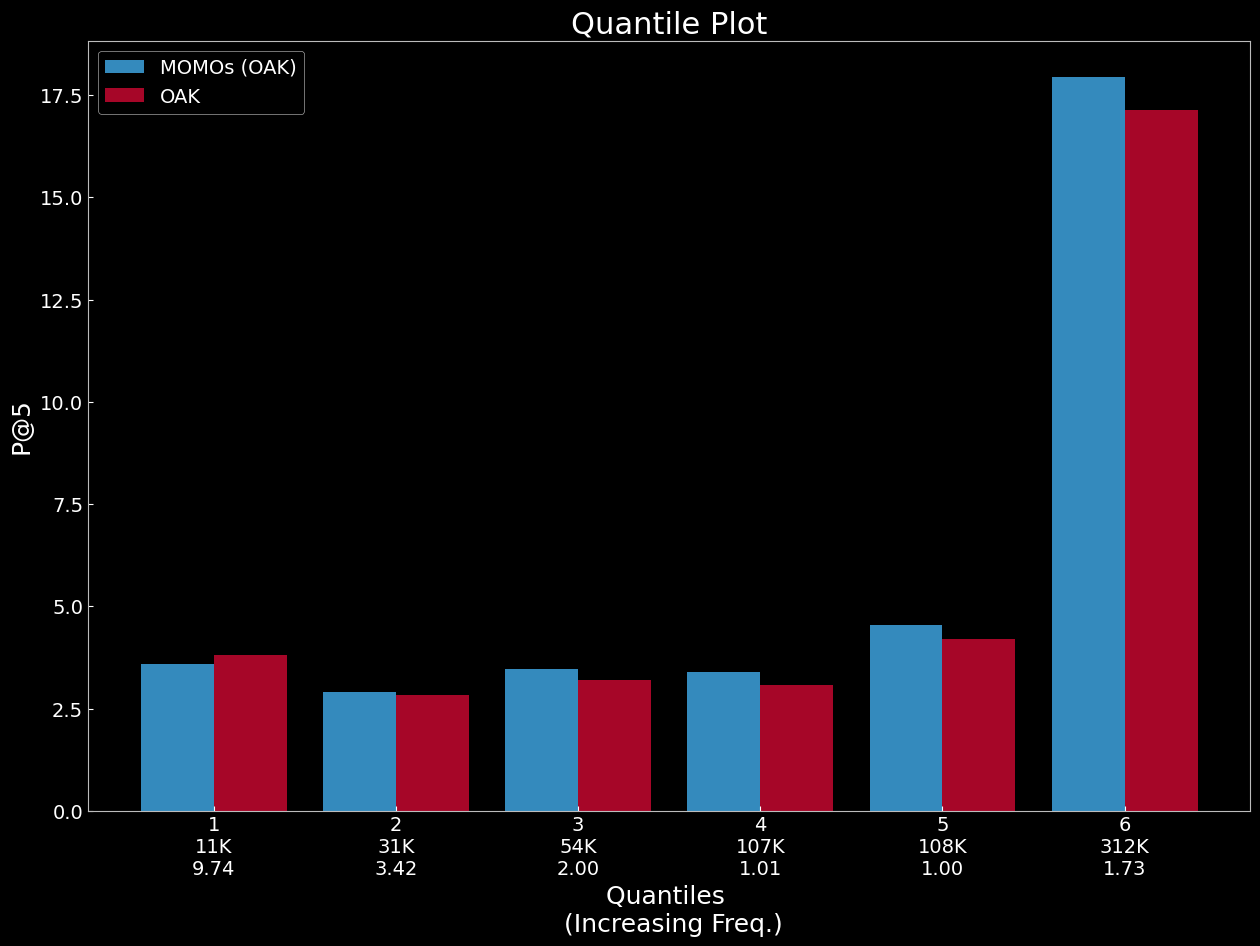

In [19]:
decile_plot(preds, block.test.dset.data.data_lbl, block.test.dset.data.data_lbl_filterer, title='Quantile Plot', topk=5)

## SLM Experiments

In [24]:
# random oracle with projection layer
m = {'eval_N@1': 0.3378925621509552, 'eval_N@10': 0.3640076220035553, 'eval_N@3': 0.33649206161499023, 'eval_N@5': 0.34618327021598816, 'eval_P@1': 0.33789257245866544, 'eval_P@10': 0.10847984677354211, 'eval_P@3': 0.22949422114564091, 'eval_P@5': 0.17319325127471927, 'eval_PSN@1': 0.2629843056201935, 'eval_PSN@10': 0.33076781034469604, 'eval_PSN@3': 0.29193246364593506, 'eval_PSN@5': 0.3092508614063263, 'eval_PSP@1': 0.26298431129453786, 'eval_PSP@10': 0.360490534443766, 'eval_PSP@3': 0.2928556672016164, 'eval_PSP@5': 0.3166034802956874, 'eval_R@10': 0.4102027116772539, 'eval_R@100': 0.5360305145065878, 'eval_R@200': 0.5634679607566132, 'eval_loss': 0.09869568794965744, 'eval_runtime': 220.3171, 'eval_samples_per_second': 805.725, 'eval_steps_per_second': 0.395}
display_metric(m)

# MOMOS without oracle
m = {'eval_N@1': 0.3368447721004486, 'eval_N@10': 0.36561569571495056, 'eval_N@3': 0.33588558435440063, 'eval_N@5': 0.34686756134033203, 'eval_P@1': 0.3368447736810974, 'eval_P@10': 0.1089485395600663, 'eval_P@3': 0.22810278943564133, 'eval_P@5': 0.1731684646369704, 'eval_PSN@1': 0.2655569314956665, 'eval_PSN@10': 0.3337525427341461, 'eval_PSN@3': 0.29314181208610535, 'eval_PSN@5': 0.3114219009876251, 'eval_PSP@1': 0.26555694841224337, 'eval_PSP@10': 0.3631611230532725, 'eval_PSP@3': 0.2926069352877104, 'eval_PSP@5': 0.31778836748860007, 'eval_R@10': 0.4144956436381694, 'eval_R@100': 0.5436720429115479, 'eval_R@200': 0.569874252823719, 'eval_loss': 0.06152237951755524, 'eval_runtime': 203.6892, 'eval_samples_per_second': 871.499, 'eval_steps_per_second': 0.427}
display_metric(m)

,N@1,N@3,N@5,N@10,P@1,P@3,P@5,P@10,PSN@1,PSN@3,PSN@5,PSN@10,PSP@1,PSP@3,PSP@5,PSP@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,33.7893,33.6492,34.6183,36.4008,33.7893,22.9494,17.3193,10.848,26.2984,29.1932,30.9251,33.0768,26.2984,29.2856,31.6603,36.0491,41.0203,53.6031,56.3468,0.0987,220.3171,805.725,0.395


,N@1,N@3,N@5,N@10,P@1,P@3,P@5,P@10,PSN@1,PSN@3,PSN@5,PSN@10,PSP@1,PSP@3,PSP@5,PSP@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,33.6845,33.5886,34.6868,36.5616,33.6845,22.8103,17.3168,10.8949,26.5557,29.3142,31.1422,33.3753,26.5557,29.2607,31.7788,36.3161,41.4496,54.3672,56.9874,0.0615,203.6892,871.499,0.427


In [64]:
o = {
    'random oracle': {'eval_N@1': 0.3378925621509552, 'eval_N@10': 0.3640076220035553, 'eval_N@3': 0.33649206161499023, 'eval_N@5': 0.34618327021598816, 'eval_P@1': 0.33789257245866544, 'eval_P@10': 0.10847984677354211, 'eval_P@3': 0.22949422114564091, 'eval_P@5': 0.17319325127471927, 'eval_PSN@1': 0.2629843056201935, 'eval_PSN@10': 0.33076781034469604, 'eval_PSN@3': 0.29193246364593506, 'eval_PSN@5': 0.3092508614063263, 'eval_PSP@1': 0.26298431129453786, 'eval_PSP@10': 0.360490534443766, 'eval_PSP@3': 0.2928556672016164, 'eval_PSP@5': 0.3166034802956874, 'eval_R@10': 0.4102027116772539, 'eval_R@100': 0.5360305145065878, 'eval_R@200': 0.5634679607566132, 'eval_loss': 0.09869568794965744, 'eval_runtime': 220.3171, 'eval_samples_per_second': 805.725, 'eval_steps_per_second': 0.395},
    'OAK': {'eval_N@1': 0.3368447721004486, 'eval_N@10': 0.36561569571495056, 'eval_N@3': 0.33588558435440063, 'eval_N@5': 0.34686756134033203, 'eval_P@1': 0.3368447736810974, 'eval_P@10': 0.1089485395600663, 'eval_P@3': 0.22810278943564133, 'eval_P@5': 0.1731684646369704, 'eval_PSN@1': 0.2655569314956665, 'eval_PSN@10': 0.3337525427341461, 'eval_PSN@3': 0.29314181208610535, 'eval_PSN@5': 0.3114219009876251, 'eval_PSP@1': 0.26555694841224337, 'eval_PSP@10': 0.3631611230532725, 'eval_PSP@3': 0.2926069352877104, 'eval_PSP@5': 0.31778836748860007, 'eval_R@10': 0.4144956436381694, 'eval_R@100': 0.5436720429115479, 'eval_R@200': 0.569874252823719, 'eval_loss': 0.06152237951755524, 'eval_runtime': 203.6892, 'eval_samples_per_second': 871.499, 'eval_steps_per_second': 0.427},
}
_display_metric(convert_df_and_remove_prefix(o)*100)

,P@1,P@5,N@5,PSP@1,PSP@5,R@200
random oracle,33.79,17.32,34.62,26.30,31.66,56.35
OAK,33.68,17.32,34.69,26.56,31.78,56.99


### `llama`

In [40]:
# with projection layer at the oracle to downsize embeddings to 768 dimension.

# lora finetuned - last token
m = {'eval_N@1': 0.3463819921016693, 'eval_N@10': 0.3767872452735901, 'eval_N@3': 0.3461236357688904, 'eval_N@5': 0.3571256697177887, 'eval_P@1': 0.3463819958876715, 'eval_P@10': 0.11306988141848814, 'eval_P@3': 0.23629927987307936, 'eval_P@5': 0.1793099174719514, 'eval_PSN@1': 0.27284327149391174, 'eval_PSN@10': 0.3447672724723816, 'eval_PSN@3': 0.3025173246860504, 'eval_PSN@5': 0.32130828499794006, 'eval_PSP@1': 0.2728432997026541, 'eval_PSP@10': 0.37830975206420653, 'eval_PSP@3': 0.30377268303437677, 'eval_PSP@5': 0.3301502289237694, 'eval_R@10': 0.42759870840342407, 'eval_R@100': 0.5737143839463934, 'eval_R@200': 0.6067828040517531, 'eval_loss': 0.11312568187713623, 'eval_runtime': 237.814, 'eval_samples_per_second': 746.445, 'eval_steps_per_second': 0.366}
display_metric(m)

# zero-shot - last token
m = {'eval_N@1': 0.3458355665206909, 'eval_N@10': 0.3774246871471405, 'eval_N@3': 0.34627747535705566, 'eval_N@5': 0.3576923906803131, 'eval_P@1': 0.34583556319184294, 'eval_P@10': 0.11329070782752312, 'eval_P@3': 0.23628801321955942, 'eval_P@5': 0.17953637720774757, 'eval_PSN@1': 0.2731320559978485, 'eval_PSN@10': 0.3460851311683655, 'eval_PSN@3': 0.303543359041214, 'eval_PSN@5': 0.3225751519203186, 'eval_PSP@1': 0.2731320686062448, 'eval_PSP@10': 0.3802150831103355, 'eval_PSP@3': 0.30494316691493484, 'eval_PSP@5': 0.331690128350957, 'eval_R@10': 0.4289086437935197, 'eval_R@100': 0.5769546882580522, 'eval_R@200': 0.6101428384360676, 'eval_loss': 0.1147356778383255, 'eval_runtime': 223.538, 'eval_samples_per_second': 794.116, 'eval_steps_per_second': 0.389}
display_metric(m)

# lora finetuned - average token
m = {'eval_N@1': 0.34367236495018005, 'eval_N@10': 0.37541136145591736, 'eval_N@3': 0.34370920062065125, 'eval_N@5': 0.3553003668785095, 'eval_P@1': 0.34367236571557336, 'eval_P@10': 0.11237078556743593, 'eval_P@3': 0.23405721582215394, 'eval_P@5': 0.1777663859394035, 'eval_PSN@1': 0.27207911014556885, 'eval_PSN@10': 0.3445676863193512, 'eval_PSN@3': 0.30146652460098267, 'eval_PSN@5': 0.3207088112831116, 'eval_PSP@1': 0.2720791089025497, 'eval_PSP@10': 0.37749070646088295, 'eval_PSP@3': 0.302142014095621, 'eval_PSP@5': 0.32870256138716364, 'eval_R@10': 0.42748400626440136, 'eval_R@100': 0.5745806657654098, 'eval_R@200': 0.6068630172339533, 'eval_loss': 0.11251377314329147, 'eval_runtime': 239.5568, 'eval_samples_per_second': 741.014, 'eval_steps_per_second': 0.363}
display_metric(m)

# zero-shot - average token
m = {'eval_N@1': 0.34386390447616577, 'eval_N@10': 0.37593793869018555, 'eval_N@3': 0.34411877393722534, 'eval_N@5': 0.35578304529190063, 'eval_P@1': 0.3438638988254514, 'eval_P@10': 0.11277300509817748, 'eval_P@3': 0.23444403759308366, 'eval_P@5': 0.17837591189495697, 'eval_PSN@1': 0.27212947607040405, 'eval_PSN@10': 0.3448587954044342, 'eval_PSN@3': 0.3017829954624176, 'eval_PSN@5': 0.32095810770988464, 'eval_PSP@1': 0.27212947969286955, 'eval_PSP@10': 0.37856947064593494, 'eval_PSP@3': 0.3025777849448133, 'eval_PSP@5': 0.32955527583575006, 'eval_R@10': 0.4279700969379879, 'eval_R@100': 0.5762743692045127, 'eval_R@200': 0.6091683194404062, 'eval_loss': 0.11338233947753906, 'eval_runtime': 227.0871, 'eval_samples_per_second': 781.705, 'eval_steps_per_second': 0.383}
display_metric(m)


,N@1,N@3,N@5,N@10,P@1,P@3,P@5,P@10,PSN@1,PSN@3,PSN@5,PSN@10,PSP@1,PSP@3,PSP@5,PSP@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.6382,34.6124,35.7126,37.6787,34.6382,23.6299,17.931,11.307,27.2843,30.2517,32.1308,34.4767,27.2843,30.3773,33.015,37.831,42.7599,57.3714,60.6783,0.1131,237.814,746.445,0.366


,N@1,N@3,N@5,N@10,P@1,P@3,P@5,P@10,PSN@1,PSN@3,PSN@5,PSN@10,PSP@1,PSP@3,PSP@5,PSP@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.5836,34.6277,35.7692,37.7425,34.5836,23.6288,17.9536,11.3291,27.3132,30.3543,32.2575,34.6085,27.3132,30.4943,33.169,38.0215,42.8909,57.6955,61.0143,0.1147,223.538,794.116,0.389


,N@1,N@3,N@5,N@10,P@1,P@3,P@5,P@10,PSN@1,PSN@3,PSN@5,PSN@10,PSP@1,PSP@3,PSP@5,PSP@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.3672,34.3709,35.53,37.5411,34.3672,23.4057,17.7766,11.2371,27.2079,30.1467,32.0709,34.4568,27.2079,30.2142,32.8703,37.7491,42.7484,57.4581,60.6863,0.1125,239.5568,741.014,0.363


,N@1,N@3,N@5,N@10,P@1,P@3,P@5,P@10,PSN@1,PSN@3,PSN@5,PSN@10,PSP@1,PSP@3,PSP@5,PSP@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.3864,34.4119,35.5783,37.5938,34.3864,23.4444,17.8376,11.2773,27.2129,30.1783,32.0958,34.4859,27.2129,30.2578,32.9555,37.8569,42.797,57.6274,60.9168,0.1134,227.0871,781.705,0.383


In [72]:
o = {
    'lora fine-tuned (last token)': {'eval_N@1': 0.3463819921016693, 'eval_N@10': 0.3767872452735901, 'eval_N@3': 0.3461236357688904, 'eval_N@5': 0.3571256697177887, 'eval_P@1': 0.3463819958876715, 'eval_P@10': 0.11306988141848814, 'eval_P@3': 0.23629927987307936, 'eval_P@5': 0.1793099174719514, 'eval_PSN@1': 0.27284327149391174, 'eval_PSN@10': 0.3447672724723816, 'eval_PSN@3': 0.3025173246860504, 'eval_PSN@5': 0.32130828499794006, 'eval_PSP@1': 0.2728432997026541, 'eval_PSP@10': 0.37830975206420653, 'eval_PSP@3': 0.30377268303437677, 'eval_PSP@5': 0.3301502289237694, 'eval_R@10': 0.42759870840342407, 'eval_R@100': 0.5737143839463934, 'eval_R@200': 0.6067828040517531, 'eval_loss': 0.11312568187713623, 'eval_runtime': 237.814, 'eval_samples_per_second': 746.445, 'eval_steps_per_second': 0.366},
    'zero-shot (last token)': {'eval_N@1': 0.3458355665206909, 'eval_N@10': 0.3774246871471405, 'eval_N@3': 0.34627747535705566, 'eval_N@5': 0.3576923906803131, 'eval_P@1': 0.34583556319184294, 'eval_P@10': 0.11329070782752312, 'eval_P@3': 0.23628801321955942, 'eval_P@5': 0.17953637720774757, 'eval_PSN@1': 0.2731320559978485, 'eval_PSN@10': 0.3460851311683655, 'eval_PSN@3': 0.303543359041214, 'eval_PSN@5': 0.3225751519203186, 'eval_PSP@1': 0.2731320686062448, 'eval_PSP@10': 0.3802150831103355, 'eval_PSP@3': 0.30494316691493484, 'eval_PSP@5': 0.331690128350957, 'eval_R@10': 0.4289086437935197, 'eval_R@100': 0.5769546882580522, 'eval_R@200': 0.6101428384360676, 'eval_loss': 0.1147356778383255, 'eval_runtime': 223.538, 'eval_samples_per_second': 794.116, 'eval_steps_per_second': 0.389},
    'lora fine-tuned (average token)':{'eval_N@1': 0.34367236495018005, 'eval_N@10': 0.37541136145591736, 'eval_N@3': 0.34370920062065125, 'eval_N@5': 0.3553003668785095, 'eval_P@1': 0.34367236571557336, 'eval_P@10': 0.11237078556743593, 'eval_P@3': 0.23405721582215394, 'eval_P@5': 0.1777663859394035, 'eval_PSN@1': 0.27207911014556885, 'eval_PSN@10': 0.3445676863193512, 'eval_PSN@3': 0.30146652460098267, 'eval_PSN@5': 0.3207088112831116, 'eval_PSP@1': 0.2720791089025497, 'eval_PSP@10': 0.37749070646088295, 'eval_PSP@3': 0.302142014095621, 'eval_PSP@5': 0.32870256138716364, 'eval_R@10': 0.42748400626440136, 'eval_R@100': 0.5745806657654098, 'eval_R@200': 0.6068630172339533, 'eval_loss': 0.11251377314329147, 'eval_runtime': 239.5568, 'eval_samples_per_second': 741.014, 'eval_steps_per_second': 0.363},
    'zero-shot (average token)': {'eval_N@1': 0.34386390447616577, 'eval_N@10': 0.37593793869018555, 'eval_N@3': 0.34411877393722534, 'eval_N@5': 0.35578304529190063, 'eval_P@1': 0.3438638988254514, 'eval_P@10': 0.11277300509817748, 'eval_P@3': 0.23444403759308366, 'eval_P@5': 0.17837591189495697, 'eval_PSN@1': 0.27212947607040405, 'eval_PSN@10': 0.3448587954044342, 'eval_PSN@3': 0.3017829954624176, 'eval_PSN@5': 0.32095810770988464, 'eval_PSP@1': 0.27212947969286955, 'eval_PSP@10': 0.37856947064593494, 'eval_PSP@3': 0.3025777849448133, 'eval_PSP@5': 0.32955527583575006, 'eval_R@10': 0.4279700969379879, 'eval_R@100': 0.5762743692045127, 'eval_R@200': 0.6091683194404062, 'eval_loss': 0.11338233947753906, 'eval_runtime': 227.0871, 'eval_samples_per_second': 781.705, 'eval_steps_per_second': 0.383},
}
_display_metric(convert_df_and_remove_prefix(o)*100)

,P@1,P@5,N@5,PSP@1,PSP@5,R@200
lora fine-tuned (last token),34.64,17.93,35.71,27.28,33.02,60.68
zero-shot (last token),34.58,17.95,35.77,27.31,33.17,61.01
lora fine-tuned (average token),34.37,17.78,35.53,27.21,32.87,60.69
zero-shot (average token),34.39,17.84,35.58,27.21,32.96,60.92


In [69]:
# PCA on oracle embeddings

# lora finetuned - last token
m = {'eval_N@1': 0.33798834681510925, 'eval_N@10': 0.3666952848434448, 'eval_N@3': 0.33763962984085083, 'eval_N@5': 0.3482179045677185, 'eval_P@1': 0.3379883390136045, 'eval_P@10': 0.10924372588234728, 'eval_P@3': 0.22959186547616744, 'eval_P@5': 0.17375433062012885, 'eval_PSN@1': 0.26642024517059326, 'eval_PSN@10': 0.3347986340522766, 'eval_PSN@3': 0.294746994972229, 'eval_PSN@5': 0.3127234876155853, 'eval_PSP@1': 0.2664202452761215, 'eval_PSP@10': 0.36410935739494305, 'eval_PSP@3': 0.2944336037714408, 'eval_PSP@5': 0.3188416845726721, 'eval_R@10': 0.4147968650933079, 'eval_R@100': 0.545042293542287, 'eval_R@200': 0.5716807474487193, 'eval_loss': 0.09175486117601395, 'eval_runtime': 221.0816, 'eval_samples_per_second': 802.939, 'eval_steps_per_second': 0.394}
display_metric(m)

# zero-shot - average token
m = {'eval_N@1': 0.3359321653842926, 'eval_N@10': 0.36585158109664917, 'eval_N@3': 0.3361153304576874, 'eval_N@5': 0.3469197154045105, 'eval_P@1': 0.3359321747457961, 'eval_P@10': 0.10897445286316683, 'eval_P@3': 0.22845017791924574, 'eval_P@5': 0.17310199138119, 'eval_PSN@1': 0.26400110125541687, 'eval_PSN@10': 0.3335941731929779, 'eval_PSN@3': 0.29291340708732605, 'eval_PSN@5': 0.31113624572753906, 'eval_PSP@1': 0.264001111903235, 'eval_PSP@10': 0.36292985095542074, 'eval_PSP@3': 0.29263859485109234, 'eval_PSP@5': 0.3174922624078182, 'eval_R@10': 0.41493322125865156, 'eval_R@100': 0.5450410171498901, 'eval_R@200': 0.5727395107998391, 'eval_loss': 0.09175048768520355, 'eval_runtime': 220.0534, 'eval_samples_per_second': 806.69, 'eval_steps_per_second': 0.395}
display_metric(m)

,N@1,N@3,N@5,N@10,P@1,P@3,P@5,P@10,PSN@1,PSN@3,PSN@5,PSN@10,PSP@1,PSP@3,PSP@5,PSP@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,33.7988,33.764,34.8218,36.6695,33.7988,22.9592,17.3754,10.9244,26.642,29.4747,31.2723,33.4799,26.642,29.4434,31.8842,36.4109,41.4797,54.5042,57.1681,0.0918,221.0816,802.939,0.394


,N@1,N@3,N@5,N@10,P@1,P@3,P@5,P@10,PSN@1,PSN@3,PSN@5,PSN@10,PSP@1,PSP@3,PSP@5,PSP@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,33.5932,33.6115,34.692,36.5852,33.5932,22.845,17.3102,10.8974,26.4001,29.2913,31.1136,33.3594,26.4001,29.2639,31.7492,36.293,41.4933,54.5041,57.274,0.0918,220.0534,806.69,0.395


In [74]:
o = {
    'lora fine-tuned (last token)': {'eval_N@1': 0.33798834681510925, 'eval_N@10': 0.3666952848434448, 'eval_N@3': 0.33763962984085083, 'eval_N@5': 0.3482179045677185, 'eval_P@1': 0.3379883390136045, 'eval_P@10': 0.10924372588234728, 'eval_P@3': 0.22959186547616744, 'eval_P@5': 0.17375433062012885, 'eval_PSN@1': 0.26642024517059326, 'eval_PSN@10': 0.3347986340522766, 'eval_PSN@3': 0.294746994972229, 'eval_PSN@5': 0.3127234876155853, 'eval_PSP@1': 0.2664202452761215, 'eval_PSP@10': 0.36410935739494305, 'eval_PSP@3': 0.2944336037714408, 'eval_PSP@5': 0.3188416845726721, 'eval_R@10': 0.4147968650933079, 'eval_R@100': 0.545042293542287, 'eval_R@200': 0.5716807474487193, 'eval_loss': 0.09175486117601395, 'eval_runtime': 221.0816, 'eval_samples_per_second': 802.939, 'eval_steps_per_second': 0.394},
    'zero-shot (last token)': {'eval_N@1': 0.3359321653842926, 'eval_N@10': 0.36585158109664917, 'eval_N@3': 0.3361153304576874, 'eval_N@5': 0.3469197154045105, 'eval_P@1': 0.3359321747457961, 'eval_P@10': 0.10897445286316683, 'eval_P@3': 0.22845017791924574, 'eval_P@5': 0.17310199138119, 'eval_PSN@1': 0.26400110125541687, 'eval_PSN@10': 0.3335941731929779, 'eval_PSN@3': 0.29291340708732605, 'eval_PSN@5': 0.31113624572753906, 'eval_PSP@1': 0.264001111903235, 'eval_PSP@10': 0.36292985095542074, 'eval_PSP@3': 0.29263859485109234, 'eval_PSP@5': 0.3174922624078182, 'eval_R@10': 0.41493322125865156, 'eval_R@100': 0.5450410171498901, 'eval_R@200': 0.5727395107998391, 'eval_loss': 0.09175048768520355, 'eval_runtime': 220.0534, 'eval_samples_per_second': 806.69, 'eval_steps_per_second': 0.395},
}
_display_metric(convert_df_and_remove_prefix(o)*100)

,P@1,P@5,N@5,PSP@1,PSP@5,R@200
lora fine-tuned (last token),33.80,17.38,34.82,26.64,31.88,57.17
zero-shot (last token),33.59,17.31,34.69,26.40,31.75,57.27


### `Phi-2`

In [58]:
# last token experiments

# Projecting disciple to 2560
m = {'eval_N@1': 0.2981043756008148, 'eval_N@10': 0.31700292229652405, 'eval_N@3': 0.29192113876342773, 'eval_N@5': 0.30073195695877075, 'eval_P@1': 0.29810438554488355, 'eval_P@10': 0.09330535447717297, 'eval_P@3': 0.19693171469072304, 'eval_P@5': 0.14860603329310132, 'eval_PSN@1': 0.21437399089336395, 'eval_PSN@10': 0.27349042892456055, 'eval_PSN@3': 0.23791517317295074, 'eval_PSN@5': 0.2537980079650879, 'eval_PSP@1': 0.21437399692695636, 'eval_PSP@10': 0.29816402140752907, 'eval_PSP@3': 0.23695915695735217, 'eval_PSP@5': 0.2586700893570871, 'eval_R@10': 0.35959278360457003, 'eval_R@100': 0.4847154699368989, 'eval_R@200': 0.5140185707838163, 'eval_loss': 0.6832295060157776, 'eval_runtime': 346.9128, 'eval_samples_per_second': 511.699, 'eval_steps_per_second': 0.251}
display_metric(m)

# PCA on oracle to 768
m = {'eval_N@1': 0.34245556592941284, 'eval_N@10': 0.3740304708480835, 'eval_N@3': 0.34222349524497986, 'eval_N@5': 0.3537213206291199, 'eval_P@1': 0.34245556713517167, 'eval_P@10': 0.11215221248910485, 'eval_P@3': 0.23309955027275792, 'eval_P@5': 0.1770667267556706, 'eval_PSN@1': 0.26971569657325745, 'eval_PSN@10': 0.34223562479019165, 'eval_PSN@3': 0.2991461455821991, 'eval_PSN@5': 0.31821754574775696, 'eval_PSP@1': 0.26971571450805354, 'eval_PSP@10': 0.3754247051679718, 'eval_PSP@3': 0.2998923788874187, 'eval_PSP@5': 0.3262116254415452, 'eval_R@10': 0.4259959521361524, 'eval_R@100': 0.5756757517917236, 'eval_R@200': 0.6089792176936999, 'eval_loss': 0.10689707100391388, 'eval_runtime': 223.716, 'eval_samples_per_second': 793.484, 'eval_steps_per_second': 0.389}
display_metric(m)

# Project oracle to 768
m = {'eval_N@1': 0.34336817264556885, 'eval_N@10': 0.37436443567276, 'eval_N@3': 0.3433360457420349, 'eval_N@5': 0.354352205991745, 'eval_P@1': 0.34336816607047294, 'eval_P@10': 0.11207165591641953, 'eval_P@3': 0.23381686054700837, 'eval_P@5': 0.17733261977879614, 'eval_PSN@1': 0.2709282636642456, 'eval_PSN@10': 0.3429442048072815, 'eval_PSN@3': 0.3005591928958893, 'eval_PSN@5': 0.31916916370391846, 'eval_PSP@1': 0.2709282605858052, 'eval_PSP@10': 0.3755945972235507, 'eval_PSP@3': 0.30137557653357566, 'eval_PSP@5': 0.3271062984643673, 'eval_R@10': 0.42537054612635616, 'eval_R@100': 0.571120290401636, 'eval_R@200': 0.6039051486890347, 'eval_loss': 0.11475576460361481, 'eval_runtime': 234.3797, 'eval_samples_per_second': 757.382, 'eval_steps_per_second': 0.371}
display_metric(m)

# Project disciple before loss computation with the oracle embeddings
m = {'eval_N@1': 0.3395206034183502, 'eval_N@10': 0.3689531981945038, 'eval_N@3': 0.339173287153244, 'eval_N@5': 0.34996190667152405, 'eval_P@1': 0.3395206038926288, 'eval_P@10': 0.10998901501284128, 'eval_P@3': 0.2307185308283929, 'eval_P@5': 0.1747559361182574, 'eval_PSN@1': 0.2682296335697174, 'eval_PSN@10': 0.3375459313392639, 'eval_PSN@3': 0.2968074679374695, 'eval_PSN@5': 0.3149620294570923, 'eval_PSP@1': 0.2682296394437683, 'eval_PSP@10': 0.3674806849751163, 'eval_PSP@3': 0.29685131837531753, 'eval_PSP@5': 0.3215312102823968, 'eval_R@10': 0.4183958982436771, 'eval_R@100': 0.5512431867934422, 'eval_R@200': 0.5789784815910399, 'eval_loss': 0.10267067700624466, 'eval_runtime': 217.6909, 'eval_samples_per_second': 815.445, 'eval_steps_per_second': 0.4}
display_metric(m)

,N@1,N@3,N@5,N@10,P@1,P@3,P@5,P@10,PSN@1,PSN@3,PSN@5,PSN@10,PSP@1,PSP@3,PSP@5,PSP@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,29.8104,29.1921,30.0732,31.7003,29.8104,19.6932,14.8606,9.3305,21.4374,23.7915,25.3798,27.349,21.4374,23.6959,25.867,29.8164,35.9593,48.4715,51.4019,0.6832,346.9128,511.699,0.251


,N@1,N@3,N@5,N@10,P@1,P@3,P@5,P@10,PSN@1,PSN@3,PSN@5,PSN@10,PSP@1,PSP@3,PSP@5,PSP@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.2456,34.2223,35.3721,37.403,34.2456,23.31,17.7067,11.2152,26.9716,29.9146,31.8218,34.2236,26.9716,29.9892,32.6212,37.5425,42.5996,57.5676,60.8979,0.1069,223.716,793.484,0.389


,N@1,N@3,N@5,N@10,P@1,P@3,P@5,P@10,PSN@1,PSN@3,PSN@5,PSN@10,PSP@1,PSP@3,PSP@5,PSP@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,34.3368,34.3336,35.4352,37.4364,34.3368,23.3817,17.7333,11.2072,27.0928,30.0559,31.9169,34.2944,27.0928,30.1376,32.7106,37.5595,42.5371,57.112,60.3905,0.1148,234.3797,757.382,0.371


,N@1,N@3,N@5,N@10,P@1,P@3,P@5,P@10,PSN@1,PSN@3,PSN@5,PSN@10,PSP@1,PSP@3,PSP@5,PSP@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,33.9521,33.9173,34.9962,36.8953,33.9521,23.0719,17.4756,10.9989,26.823,29.6807,31.4962,33.7546,26.823,29.6851,32.1531,36.7481,41.8396,55.1243,57.8978,0.1027,217.6909,815.445,0.4


In [77]:
o = {
    'Project disciple to 2560': {'eval_N@1': 0.2981043756008148, 'eval_N@10': 0.31700292229652405, 'eval_N@3': 0.29192113876342773, 'eval_N@5': 0.30073195695877075, 'eval_P@1': 0.29810438554488355, 'eval_P@10': 0.09330535447717297, 'eval_P@3': 0.19693171469072304, 'eval_P@5': 0.14860603329310132, 'eval_PSN@1': 0.21437399089336395, 'eval_PSN@10': 0.27349042892456055, 'eval_PSN@3': 0.23791517317295074, 'eval_PSN@5': 0.2537980079650879, 'eval_PSP@1': 0.21437399692695636, 'eval_PSP@10': 0.29816402140752907, 'eval_PSP@3': 0.23695915695735217, 'eval_PSP@5': 0.2586700893570871, 'eval_R@10': 0.35959278360457003, 'eval_R@100': 0.4847154699368989, 'eval_R@200': 0.5140185707838163, 'eval_loss': 0.6832295060157776, 'eval_runtime': 346.9128, 'eval_samples_per_second': 511.699, 'eval_steps_per_second': 0.251},
    'PCA on oracle to 768': {'eval_N@1': 0.34245556592941284, 'eval_N@10': 0.3740304708480835, 'eval_N@3': 0.34222349524497986, 'eval_N@5': 0.3537213206291199, 'eval_P@1': 0.34245556713517167, 'eval_P@10': 0.11215221248910485, 'eval_P@3': 0.23309955027275792, 'eval_P@5': 0.1770667267556706, 'eval_PSN@1': 0.26971569657325745, 'eval_PSN@10': 0.34223562479019165, 'eval_PSN@3': 0.2991461455821991, 'eval_PSN@5': 0.31821754574775696, 'eval_PSP@1': 0.26971571450805354, 'eval_PSP@10': 0.3754247051679718, 'eval_PSP@3': 0.2998923788874187, 'eval_PSP@5': 0.3262116254415452, 'eval_R@10': 0.4259959521361524, 'eval_R@100': 0.5756757517917236, 'eval_R@200': 0.6089792176936999, 'eval_loss': 0.10689707100391388, 'eval_runtime': 223.716, 'eval_samples_per_second': 793.484, 'eval_steps_per_second': 0.389},
    'Project oracle to 768': {'eval_N@1': 0.34336817264556885, 'eval_N@10': 0.37436443567276, 'eval_N@3': 0.3433360457420349, 'eval_N@5': 0.354352205991745, 'eval_P@1': 0.34336816607047294, 'eval_P@10': 0.11207165591641953, 'eval_P@3': 0.23381686054700837, 'eval_P@5': 0.17733261977879614, 'eval_PSN@1': 0.2709282636642456, 'eval_PSN@10': 0.3429442048072815, 'eval_PSN@3': 0.3005591928958893, 'eval_PSN@5': 0.31916916370391846, 'eval_PSP@1': 0.2709282605858052, 'eval_PSP@10': 0.3755945972235507, 'eval_PSP@3': 0.30137557653357566, 'eval_PSP@5': 0.3271062984643673, 'eval_R@10': 0.42537054612635616, 'eval_R@100': 0.571120290401636, 'eval_R@200': 0.6039051486890347, 'eval_loss': 0.11475576460361481, 'eval_runtime': 234.3797, 'eval_samples_per_second': 757.382, 'eval_steps_per_second': 0.371},
    'Project disciple before loss': {'eval_N@1': 0.3395206034183502, 'eval_N@10': 0.3689531981945038, 'eval_N@3': 0.339173287153244, 'eval_N@5': 0.34996190667152405, 'eval_P@1': 0.3395206038926288, 'eval_P@10': 0.10998901501284128, 'eval_P@3': 0.2307185308283929, 'eval_P@5': 0.1747559361182574, 'eval_PSN@1': 0.2682296335697174, 'eval_PSN@10': 0.3375459313392639, 'eval_PSN@3': 0.2968074679374695, 'eval_PSN@5': 0.3149620294570923, 'eval_PSP@1': 0.2682296394437683, 'eval_PSP@10': 0.3674806849751163, 'eval_PSP@3': 0.29685131837531753, 'eval_PSP@5': 0.3215312102823968, 'eval_R@10': 0.4183958982436771, 'eval_R@100': 0.5512431867934422, 'eval_R@200': 0.5789784815910399, 'eval_loss': 0.10267067700624466, 'eval_runtime': 217.6909, 'eval_samples_per_second': 815.445, 'eval_steps_per_second': 0.4},
}
_display_metric(convert_df_and_remove_prefix(o)*100)

,P@1,P@5,N@5,PSP@1,PSP@5,R@200
Project disciple to 2560,29.81,14.86,30.07,21.44,25.87,51.40
PCA on oracle to 768,34.25,17.71,35.37,26.97,32.62,60.90
Project oracle to 768,34.34,17.73,35.44,27.09,32.71,60.39
Project disciple before loss,33.95,17.48,35.00,26.82,32.15,57.90


### `Mistral`

In [62]:
# Project oracle to 768 dimension - last token
m = {'eval_N@1': 0.3394192159175873, 'eval_N@10': 0.36778321862220764, 'eval_N@3': 0.33871209621429443, 'eval_N@5': 0.3492492735385895, 'eval_P@1': 0.3394192040109287, 'eval_P@10': 0.10951130890350058, 'eval_P@3': 0.2303692645692016, 'eval_P@5': 0.17433681660722908, 'eval_PSN@1': 0.26870691776275635, 'eval_PSN@10': 0.3365638256072998, 'eval_PSN@3': 0.29662349820137024, 'eval_PSN@5': 0.3145444691181183, 'eval_PSP@1': 0.26870693368418486, 'eval_PSP@10': 0.36576702227508356, 'eval_PSP@3': 0.2965281546523247, 'eval_PSP@5': 0.3209715692568799, 'eval_R@10': 0.415870542243216, 'eval_R@100': 0.5440988542247149, 'eval_R@200': 0.5707090663754714, 'eval_loss': 0.09205760806798935, 'eval_runtime': 223.7311, 'eval_samples_per_second': 793.43, 'eval_steps_per_second': 0.389}
display_metric(m)

,N@1,N@3,N@5,N@10,P@1,P@3,P@5,P@10,PSN@1,PSN@3,PSN@5,PSN@10,PSP@1,PSP@3,PSP@5,PSP@10,R@10,R@100,R@200,loss,runtime,samples_per_second,steps_per_second
0,33.9419,33.8712,34.9249,36.7783,33.9419,23.0369,17.4337,10.9511,26.8707,29.6623,31.4544,33.6564,26.8707,29.6528,32.0972,36.5767,41.5871,54.4099,57.0709,0.0921,223.7311,793.43,0.389
